# <CENTER>SONAR DATA SET

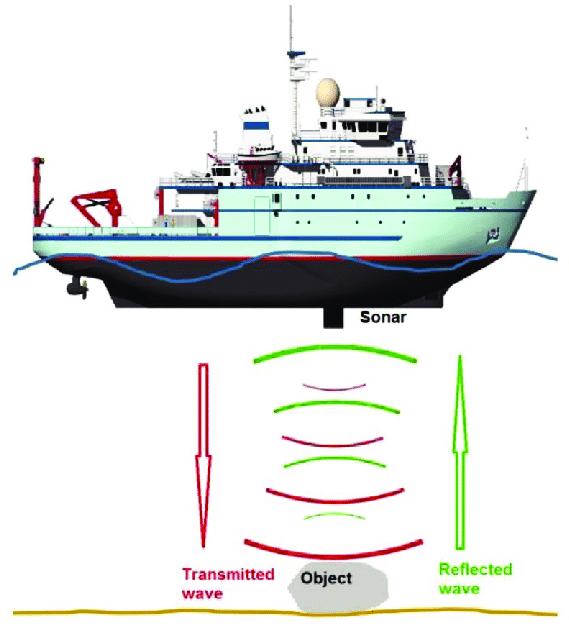

###  In this Project, we are building a system in Python that can predict whether an object is either Rock or Mine with SONAR Data. For this  case, we are using Logistic Regression Model for  prediction. 


In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,RobustScaler,StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
#loading the dataset
df = pd.read_csv("Copy of sonar data.csv")
df

FREQ 1  FREQ 2  FREQ 3  FREQ 4  FREQ 5  FREQ 6  FREQ 7  FREQ 8  FREQ 9  \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

     FREQ 10  ...  FREQ 52  FREQ 53  FREQ 54  FREQ 55  FREQ 56  FREQ 57  \
0     0.2111  ...   0.0027   0.0065   0.0159   0.0072   0.0167   0.0180   
1     0.2872  ...   0.0084   0.0089   0.0048   0.0094   0.0191   0.0140   
2     0.6194  ...   0.0232   0.0166   0.0095   0.0180   0.0244   0.0316   
3     0.1264  ...   0.0121   0.0036   0.0150   0.0085   0.0073   0.0050   
4     0.4459  ...   0.0031   0.0054   0.0105   0.0110   0.0015   0.0072   
..       ...  ...      ...      ...      ...      ...      ...      ...   
203   0.2684  ...   0.0116   0.0098   0.0199   0.0033   0.0101   0.0065   
204   0.2154  ...   0.0061   0.0093   0.0135   0.0063   0.0063   0.0034   
205   0.2529  ...   0.0160   0.0029   0.0051   0.0062   0.0089   0.0140   
206   0.2354  ...   0.0086   0.0046   0.0126   0.0036   0.0035   0.0034   
207   0.2354  ...   0.0146   0.0129   0.0047   0.0039   0.0061   0.0040   

     FREQ 58  FREQ 59  FREQ 60  FREQ 61  
0     0.0084   0.0090   0.0032        R  
1     0.0049   0.0052   0.0044        R  
2     0.0164   0.0095   0.0078        R  
3     0.0044   0.0040   0.0117        R  
4     0.0048   0.0107   0.0094        R  
..       ...      ...      ...      ...  
203   0.0115   0.0193   0.0157        M  
204   0.0032   0.0062   0.0067        M  
205   0.0138   0.0077   0.0031        M  
206   0.0079   0.0036   0.0048        M  
207   0.0036   0.0061   0.0115        M  

[208 rows x 61 columns]

In [3]:
df.head(10)

FREQ 1  FREQ 2  FREQ 3  FREQ 4  FREQ 5  FREQ 6  FREQ 7  FREQ 8  FREQ 9  \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
5  0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
6  0.0317  0.0956  0.1321  0.1408  0.1674  0.1710  0.0731  0.1401  0.2083   
7  0.0519  0.0548  0.0842  0.0319  0.1158  0.0922  0.1027  0.0613  0.1465   
8  0.0223  0.0375  0.0484  0.0475  0.0647  0.0591  0.0753  0.0098  0.0684   
9  0.0164  0.0173  0.0347  0.0070  0.0187  0.0671  0.1056  0.0697  0.0962   

   FREQ 10  ...  FREQ 52  FREQ 53  FREQ 54  FREQ 55  FREQ 56  FREQ 57  \
0   0.2111  ...   0.0027   0.0065   0.0159   0.0072   0.0167   0.0180   
1   0.2872  ...   0.0084   0.0089   0.0048   0.0094   0.0191   0.0140   
2   0.6194  ...   0.0232   0.0166   0.0095   0.0180   0.0244   0.0316   
3   0.1264  ...   0.0121   0.0036   0.0150   0.0085   0.0073   0.0050   
4   0.4459  ...   0.0031   0.0054   0.0105   0.0110   0.0015   0.0072   
5   0.3039  ...   0.0045   0.0014   0.0038   0.0013   0.0089   0.0057   
6   0.3513  ...   0.0201   0.0248   0.0131   0.0070   0.0138   0.0092   
7   0.2838  ...   0.0081   0.0120   0.0045   0.0121   0.0097   0.0085   
8   0.1487  ...   0.0145   0.0128   0.0145   0.0058   0.0049   0.0065   
9   0.0251  ...   0.0090   0.0223   0.0179   0.0084   0.0068   0.0032   

   FREQ 58  FREQ 59  FREQ 60  FREQ 61  
0   0.0084   0.0090   0.0032        R  
1   0.0049   0.0052   0.0044        R  
2   0.0164   0.0095   0.0078        R  
3   0.0044   0.0040   0.0117        R  
4   0.0048   0.0107   0.0094        R  
5   0.0027   0.0051   0.0062        R  
6   0.0143   0.0036   0.0103        R  
7   0.0047   0.0048   0.0053        R  
8   0.0093   0.0059   0.0022        R  
9   0.0035   0.0056   0.0040        R  

[10 rows x 61 columns]

In [4]:
df.tail(10)

FREQ 1  FREQ 2  FREQ 3  FREQ 4  FREQ 5  FREQ 6  FREQ 7  FREQ 8  FREQ 9  \
198  0.0238  0.0318  0.0422  0.0399  0.0788  0.0766  0.0881  0.1143  0.1594   
199  0.0116  0.0744  0.0367  0.0225  0.0076  0.0545  0.1110  0.1069  0.1708   
200  0.0131  0.0387  0.0329  0.0078  0.0721  0.1341  0.1626  0.1902  0.2610   
201  0.0335  0.0258  0.0398  0.0570  0.0529  0.1091  0.1709  0.1684  0.1865   
202  0.0272  0.0378  0.0488  0.0848  0.1127  0.1103  0.1349  0.2337  0.3113   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

     FREQ 10  ...  FREQ 52  FREQ 53  FREQ 54  FREQ 55  FREQ 56  FREQ 57  \
198   0.2048  ...   0.0096   0.0071   0.0084   0.0038   0.0026   0.0028   
199   0.2271  ...   0.0141   0.0103   0.0100   0.0034   0.0026   0.0037   
200   0.3193  ...   0.0150   0.0076   0.0032   0.0037   0.0071   0.0040   
201   0.2660  ...   0.0120   0.0039   0.0053   0.0062   0.0046   0.0045   
202   0.3997  ...   0.0091   0.0045   0.0043   0.0043   0.0098   0.0054   
203   0.2684  ...   0.0116   0.0098   0.0199   0.0033   0.0101   0.0065   
204   0.2154  ...   0.0061   0.0093   0.0135   0.0063   0.0063   0.0034   
205   0.2529  ...   0.0160   0.0029   0.0051   0.0062   0.0089   0.0140   
206   0.2354  ...   0.0086   0.0046   0.0126   0.0036   0.0035   0.0034   
207   0.2354  ...   0.0146   0.0129   0.0047   0.0039   0.0061   0.0040   

     FREQ 58  FREQ 59  FREQ 60  FREQ 61  
198   0.0013   0.0035   0.0060        M  
199   0.0044   0.0057   0.0035        M  
200   0.0009   0.0015   0.0085        M  
201   0.0022   0.0005   0.0031        M  
202   0.0051   0.0065   0.0103        M  
203   0.0115   0.0193   0.0157        M  
204   0.0032   0.0062   0.0067        M  
205   0.0138   0.0077   0.0031        M  
206   0.0079   0.0036   0.0048        M  
207   0.0036   0.0061   0.0115        M  

[10 rows x 61 columns]

In [5]:
df.columns

Index(['FREQ 1', 'FREQ 2', 'FREQ 3', 'FREQ 4', 'FREQ 5', 'FREQ 6', 'FREQ 7',
       'FREQ 8', 'FREQ 9', 'FREQ 10', 'FREQ 11', 'FREQ 12', 'FREQ 13',
       'FREQ 14', 'FREQ 15', 'FREQ 16', 'FREQ 17', 'FREQ 18', 'FREQ 19',
       'FREQ 20', 'FREQ 21', 'FREQ 22', 'FREQ 23', 'FREQ 24', 'FREQ 25',
       'FREQ 26', 'FREQ 27', 'FREQ 28', 'FREQ 29', 'FREQ 30', 'FREQ 31',
       'FREQ 32', 'FREQ 33', 'FREQ 34', 'FREQ 35', 'FREQ 36', 'FREQ 37',
       'FREQ 38', 'FREQ 39', 'FREQ 40', 'FREQ 41', 'FREQ 42', 'FREQ 43',
       'FREQ 44', 'FREQ 45', 'FREQ 46', 'FREQ 47', 'FREQ 48', 'FREQ 49',
       'FREQ 50', 'FREQ 51', 'FREQ 52', 'FREQ 53', 'FREQ 54', 'FREQ 55',
       'FREQ 56', 'FREQ 57', 'FREQ 58', 'FREQ 59', 'FREQ 60', 'FREQ 61'],
      dtype='object')

In [6]:
df.size

12688

In [7]:
#number of rows and columns
df.shape

(208, 61)

In [8]:
#Statistical measures of data
df.describe().T

count      mean       std     min       25%      50%       75%  \
FREQ 1   208.0  0.029164  0.022991  0.0015  0.013350  0.02280  0.035550   
FREQ 2   208.0  0.038437  0.032960  0.0006  0.016450  0.03080  0.047950   
FREQ 3   208.0  0.043832  0.038428  0.0015  0.018950  0.03430  0.057950   
FREQ 4   208.0  0.053892  0.046528  0.0058  0.024375  0.04405  0.064500   
FREQ 5   208.0  0.075202  0.055552  0.0067  0.038050  0.06250  0.100275   
FREQ 6   208.0  0.104570  0.059105  0.0102  0.067025  0.09215  0.134125   
FREQ 7   208.0  0.121747  0.061788  0.0033  0.080900  0.10695  0.154000   
FREQ 8   208.0  0.134799  0.085152  0.0055  0.080425  0.11210  0.169600   
FREQ 9   208.0  0.178003  0.118387  0.0075  0.097025  0.15225  0.233425   
FREQ 10  208.0  0.208259  0.134416  0.0113  0.111275  0.18240  0.268700   
FREQ 11  208.0  0.236013  0.132705  0.0289  0.129250  0.22480  0.301650   
FREQ 12  208.0  0.250221  0.140072  0.0236  0.133475  0.24905  0.331250   
FREQ 13  208.0  0.273305  0.140962  0.0184  0.166125  0.26395  0.351250   
FREQ 14  208.0  0.296568  0.164474  0.0273  0.175175  0.28110  0.386175   
FREQ 15  208.0  0.320201  0.205427  0.0031  0.164625  0.28170  0.452925   
FREQ 16  208.0  0.378487  0.232650  0.0162  0.196300  0.30470  0.535725   
FREQ 17  208.0  0.415983  0.263677  0.0349  0.205850  0.30840  0.659425   
FREQ 18  208.0  0.452318  0.261529  0.0375  0.242075  0.36830  0.679050   
FREQ 19  208.0  0.504812  0.257988  0.0494  0.299075  0.43495  0.731400   
FREQ 20  208.0  0.563047  0.262653  0.0656  0.350625  0.54250  0.809325   
FREQ 21  208.0  0.609060  0.257818  0.0512  0.399725  0.61770  0.816975   
FREQ 22  208.0  0.624275  0.255883  0.0219  0.406925  0.66490  0.831975   
FREQ 23  208.0  0.646975  0.250175  0.0563  0.450225  0.69970  0.848575   
FREQ 24  208.0  0.672654  0.239116  0.0239  0.540725  0.69850  0.872175   
FREQ 25  208.0  0.675424  0.244926  0.0240  0.525800  0.72110  0.873725   
FREQ 26  208.0  0.699866  0.237228  0.0921  0.544175  0.75450  0.893800   
FREQ 27  208.0  0.702155  0.245657  0.0481  0.531900  0.74560  0.917100   
FREQ 28  208.0  0.694024  0.237189  0.0284  0.534775  0.73190  0.900275   
FREQ 29  208.0  0.642074  0.240250  0.0144  0.463700  0.68080  0.852125   
FREQ 30  208.0  0.580928  0.220749  0.0613  0.411400  0.60715  0.735175   
FREQ 31  208.0  0.504475  0.213992  0.0482  0.345550  0.49035  0.641950   
FREQ 32  208.0  0.439040  0.213237  0.0404  0.281400  0.42960  0.580300   
FREQ 33  208.0  0.417220  0.206513  0.0477  0.257875  0.39120  0.556125   
FREQ 34  208.0  0.403233  0.231242  0.0212  0.217575  0.35105  0.596125   
FREQ 35  208.0  0.392571  0.259132  0.0223  0.179375  0.31275  0.593350   
FREQ 36  208.0  0.384848  0.264121  0.0080  0.154350  0.32115  0.556525   
FREQ 37  208.0  0.363807  0.239912  0.0351  0.160100  0.30630  0.518900   
FREQ 38  208.0  0.339657  0.212973  0.0383  0.174275  0.31270  0.440550   
FREQ 39  208.0  0.325800  0.199075  0.0371  0.173975  0.28350  0.434900   
FREQ 40  208.0  0.311207  0.178662  0.0117  0.186450  0.27805  0.424350   
FREQ 41  208.0  0.289252  0.171111  0.0360  0.163100  0.25950  0.387525   
FREQ 42  208.0  0.278293  0.168728  0.0056  0.158900  0.24510  0.384250   
FREQ 43  208.0  0.246542  0.138993  0.0000  0.155200  0.22255  0.324525   
FREQ 44  208.0  0.214075  0.133291  0.0000  0.126875  0.17770  0.271750   
FREQ 45  208.0  0.197232  0.151628  0.0000  0.094475  0.14800  0.231550   
FREQ 46  208.0  0.160631  0.133938  0.0000  0.068550  0.12135  0.200375   
FREQ 47  208.0  0.122453  0.086953  0.0000  0.064250  0.10165  0.154425   
FREQ 48  208.0  0.091424  0.062417  0.0000  0.045125  0.07810  0.120100   
FREQ 49  208.0  0.051929  0.035954  0.0000  0.026350  0.04470  0.068525   
FREQ 50  208.0  0.020424  0.013665  0.0000  0.011550  0.01790  0.025275   
FREQ 51  208.0  0.016069  0.012008  0.0000  0.008425  0.01390  0.020825   
FREQ 52  208.0  0.013420  0.009634  0.0008  0.007275  0.01140  0.016725   
FREQ 53  208.0  0.010709  0.007060

In [9]:
df.sample()

FREQ 1  FREQ 2  FREQ 3  FREQ 4  FREQ 5  FREQ 6  FREQ 7  FREQ 8  FREQ 9  \
84  0.0378  0.0318  0.0423   0.035  0.1787  0.1635  0.0887  0.0817  0.1779   

    FREQ 10  ...  FREQ 52  FREQ 53  FREQ 54  FREQ 55  FREQ 56  FREQ 57  \
84   0.2053  ...   0.0046   0.0044   0.0078   0.0102   0.0065   0.0061   

    FREQ 58  FREQ 59  FREQ 60  FREQ 61  
84   0.0062   0.0043   0.0053        R  

[1 rows x 61 columns]

In [10]:
df.duplicated().sum()

0

In [11]:
df['FREQ 61'].value_counts()


M    111
R     97
Name: FREQ 61, dtype: int64

In [12]:
df.groupby("FREQ 61").mean()

FREQ 1    FREQ 2    FREQ 3    FREQ 4    FREQ 5    FREQ 6    FREQ 7  \
FREQ 61                                                                         
M        0.034989  0.045544  0.050720  0.064768  0.086715  0.111864  0.128359   
R        0.022498  0.030303  0.035951  0.041447  0.062028  0.096224  0.114180   

           FREQ 8    FREQ 9   FREQ 10  ...   FREQ 51   FREQ 52   FREQ 53  \
FREQ 61                                ...                                 
M        0.149832  0.213492  0.251022  ...  0.019352  0.016014  0.011643   
R        0.117596  0.137392  0.159325  ...  0.012311  0.010453  0.009640   

          FREQ 54   FREQ 55   FREQ 56   FREQ 57   FREQ 58   FREQ 59   FREQ 60  
FREQ 61                                                                        
M        0.012185  0.009923  0.008914  0.007825  0.009060  0.008695  0.006930  
R        0.009518  0.008567  0.007430  0.007814  0.006677  0.007078  0.006024  

[2 rows x 60 columns]

In [13]:
#seperating data and labels
x = df.drop(columns="FREQ 61", axis=1)
y = df.drop

In [14]:
print(x)
print(y)

     FREQ 1  FREQ 2  FREQ 3  FREQ 4  FREQ 5  FREQ 6  FREQ 7  FREQ 8  FREQ 9  \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

     FREQ 10  ...  FREQ 51  FREQ 52  FREQ 53  FREQ 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   FREQ 1   208 non-null    float64
 1   FREQ 2   208 non-null    float64
 2   FREQ 3   208 non-null    float64
 3   FREQ 4   208 non-null    float64
 4   FREQ 5   208 non-null    float64
 5   FREQ 6   208 non-null    float64
 6   FREQ 7   208 non-null    float64
 7   FREQ 8   208 non-null    float64
 8   FREQ 9   208 non-null    float64
 9   FREQ 10  208 non-null    float64
 10  FREQ 11  208 non-null    float64
 11  FREQ 12  208 non-null    float64
 12  FREQ 13  208 non-null    float64
 13  FREQ 14  208 non-null    float64
 14  FREQ 15  208 non-null    float64
 15  FREQ 16  208 non-null    float64
 16  FREQ 17  208 non-null    float64
 17  FREQ 18  208 non-null    float64
 18  FREQ 19  208 non-null    float64
 19  FREQ 20  208 non-null    float64
 20  FREQ 21  208 non-null    float64
 21  FREQ 22  208 non

In [16]:
df.isnull().sum()

FREQ 1     0
FREQ 2     0
FREQ 3     0
FREQ 4     0
FREQ 5     0
          ..
FREQ 57    0
FREQ 58    0
FREQ 59    0
FREQ 60    0
FREQ 61    0
Length: 61, dtype: int64

# univarient analysis

### histplot

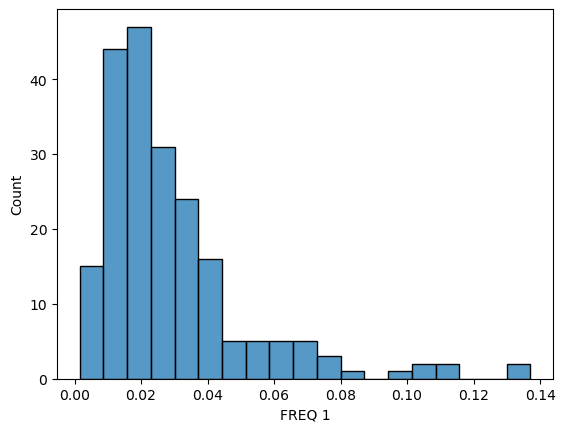

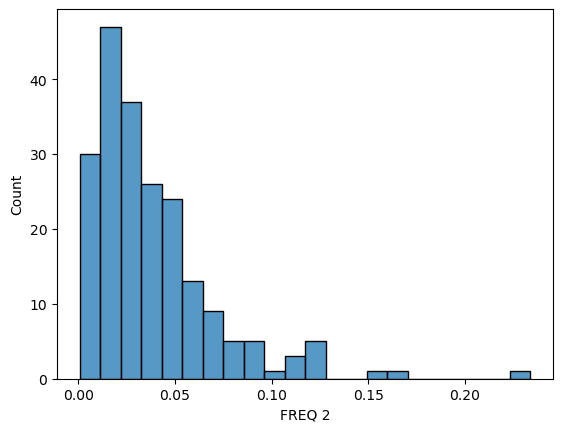

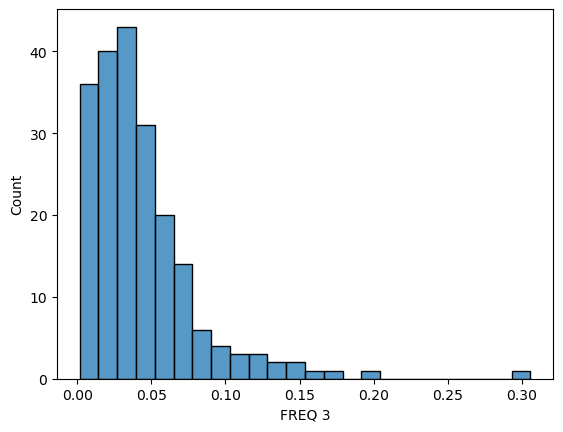

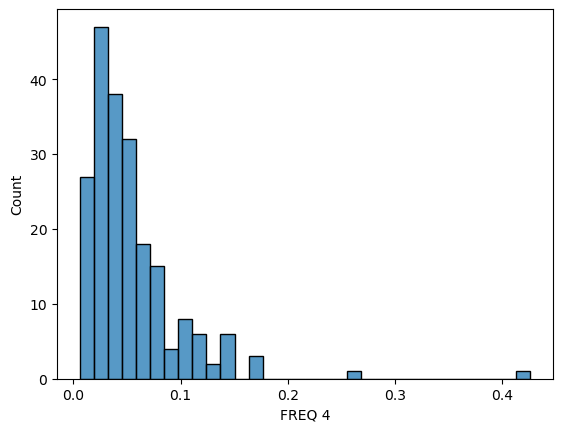

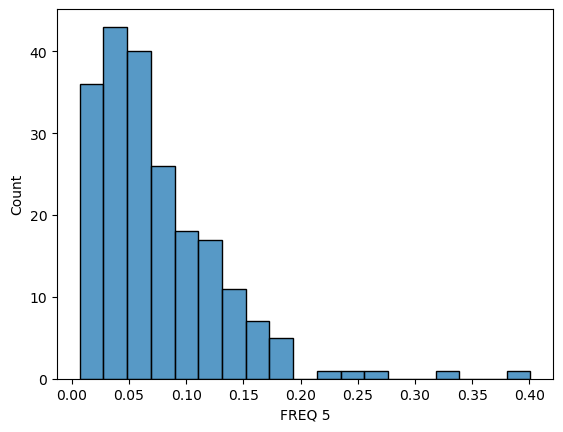

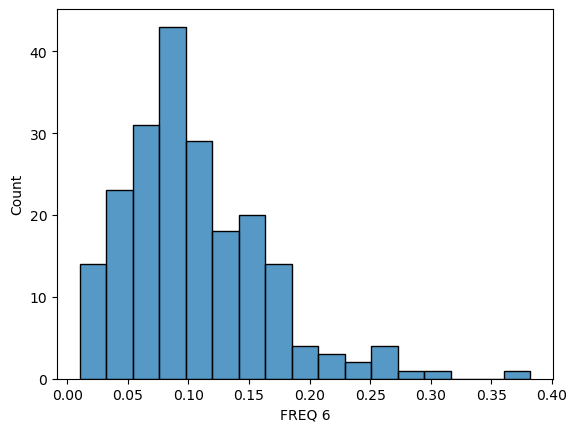

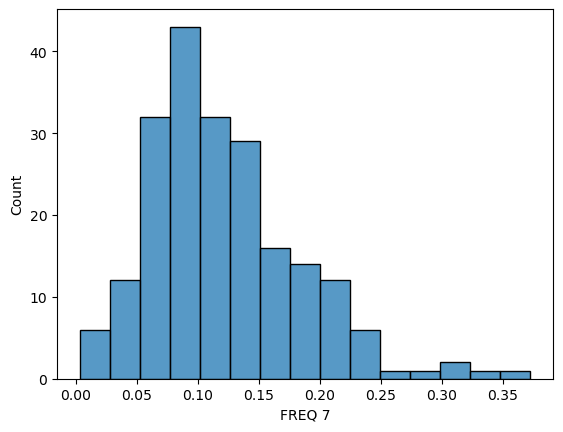

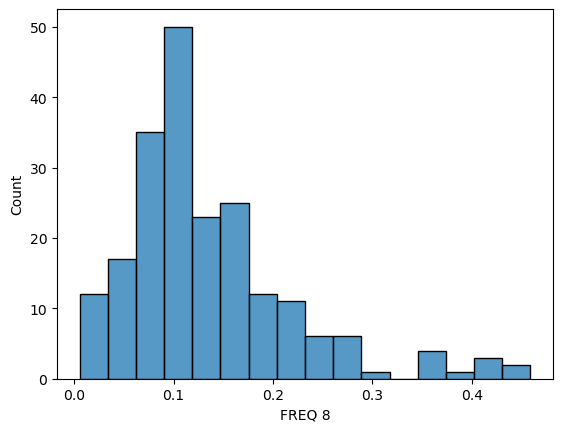

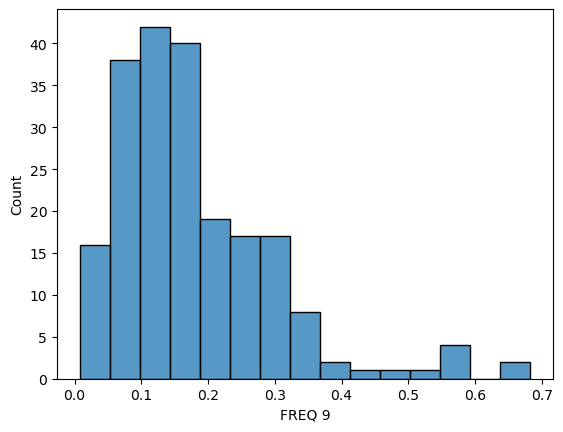

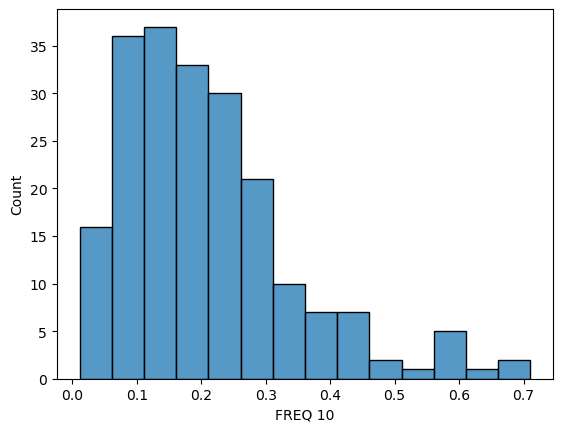

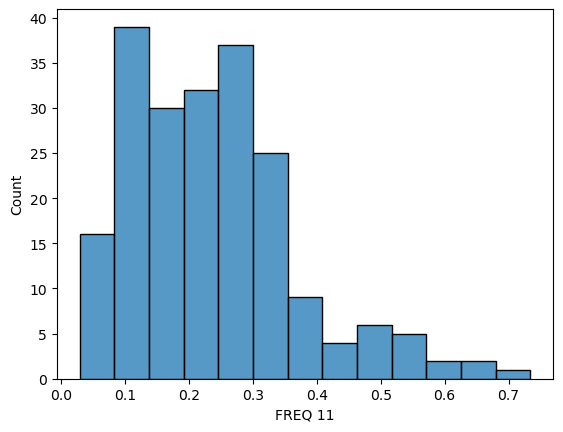

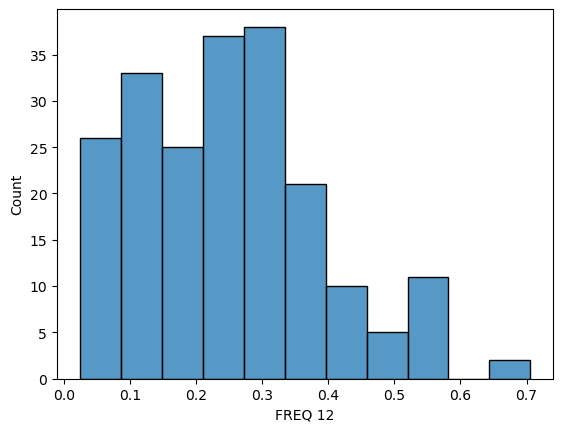

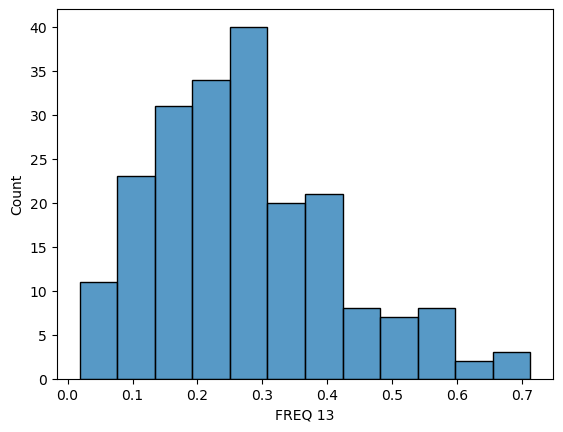

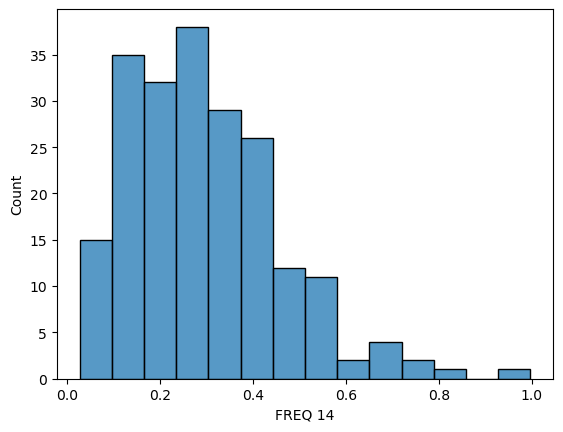

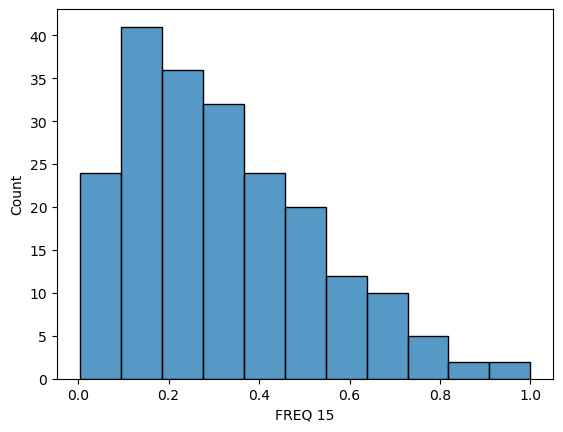

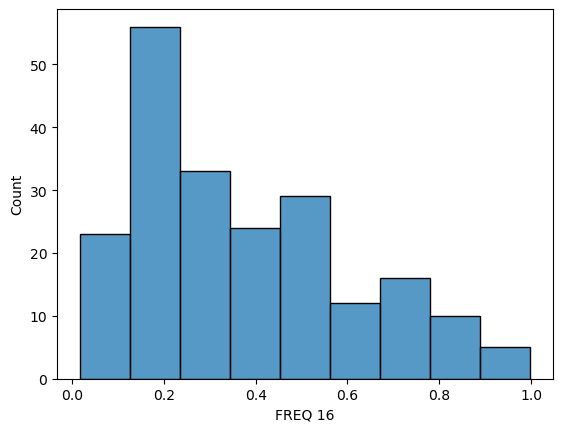

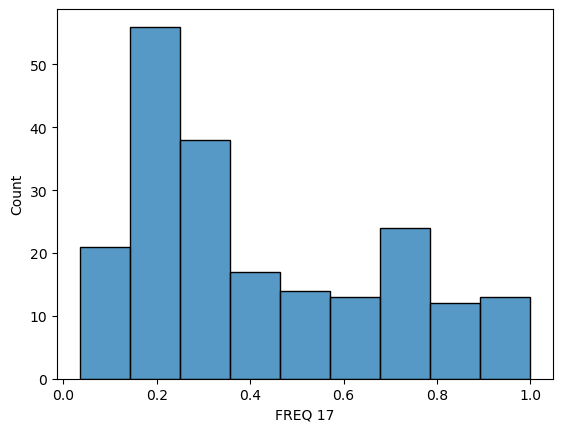

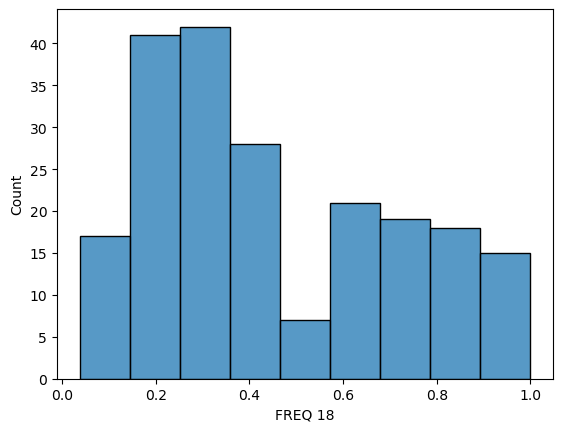

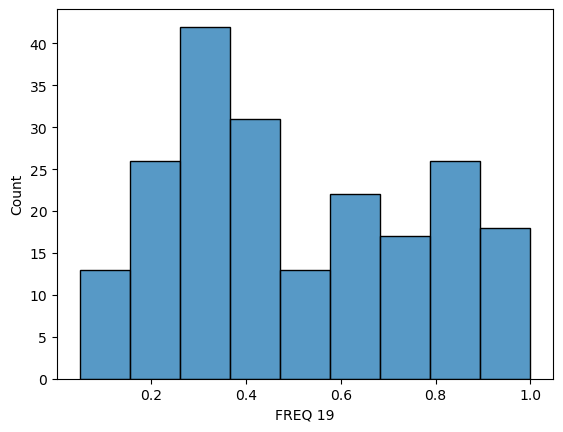

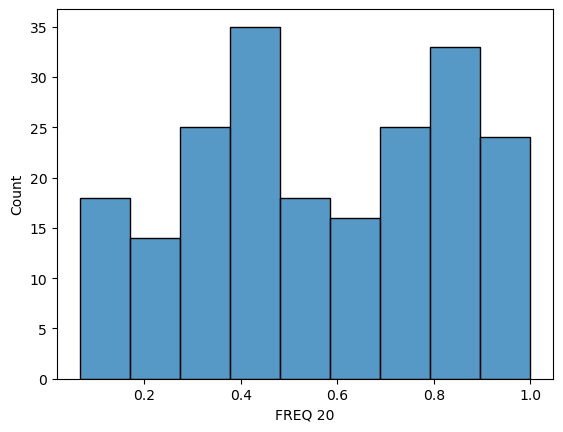

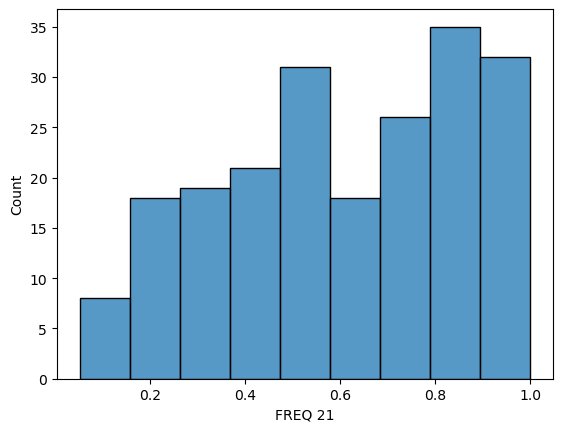

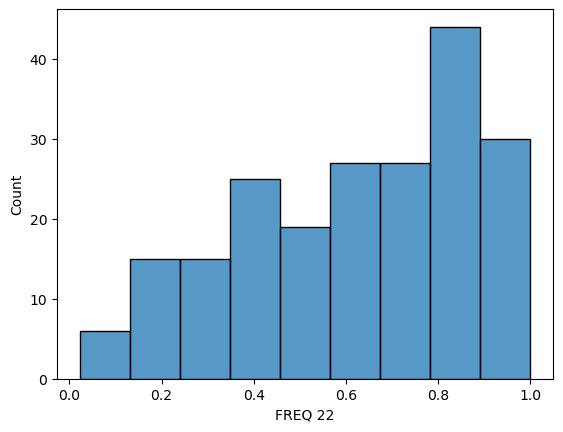

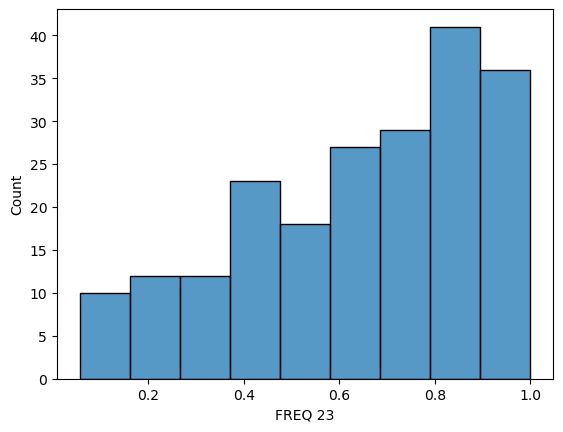

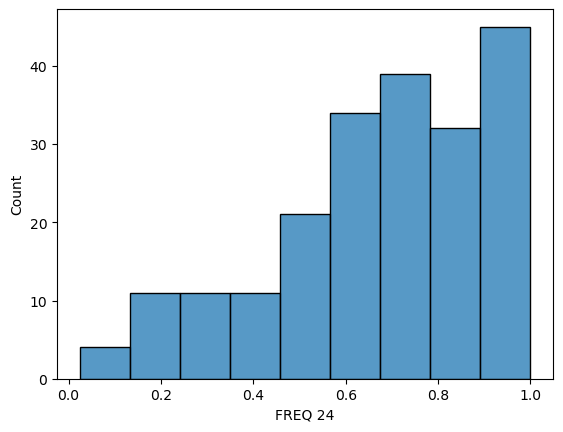

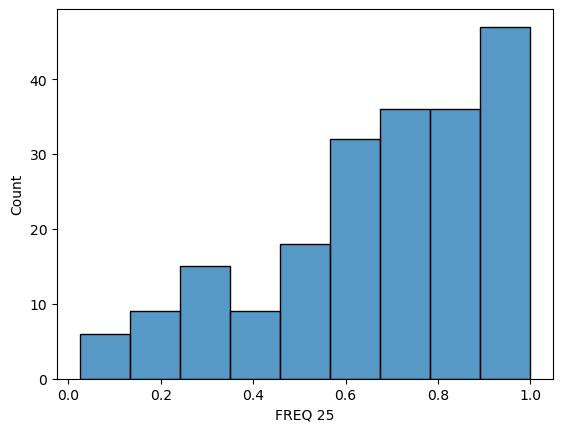

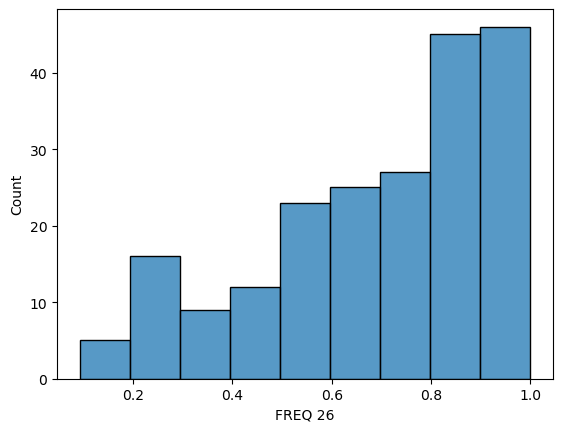

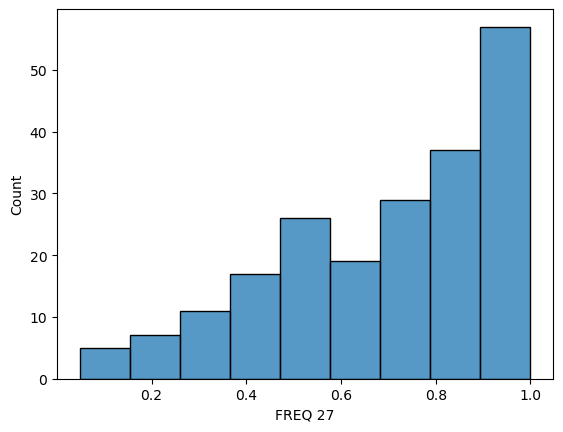

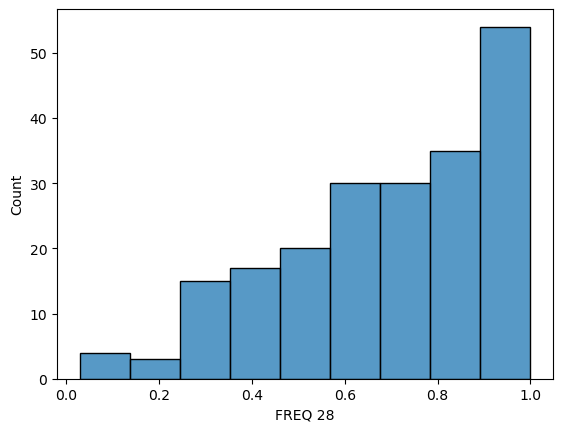

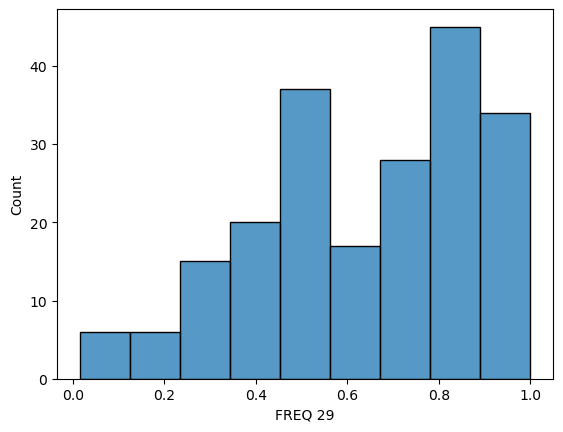

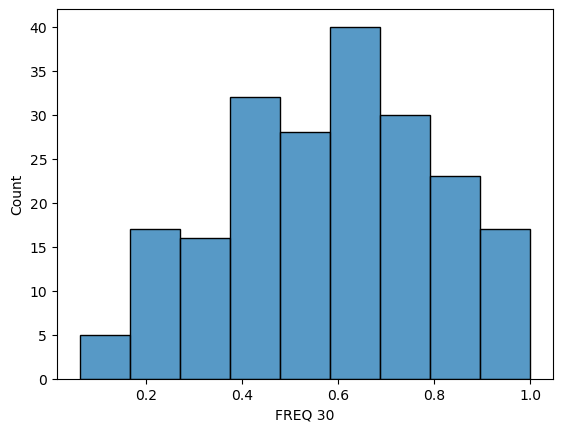

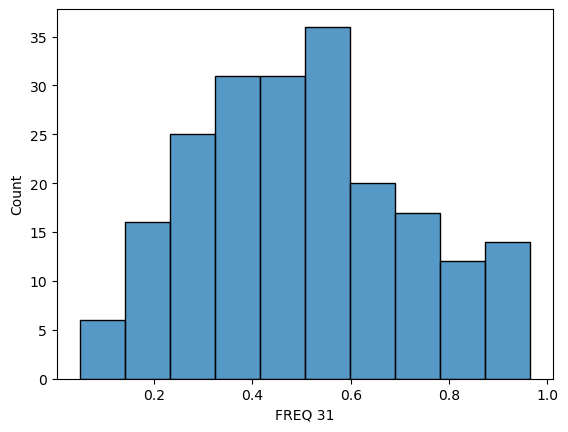

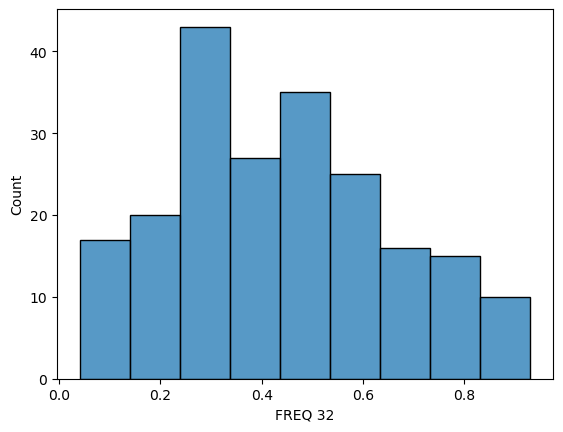

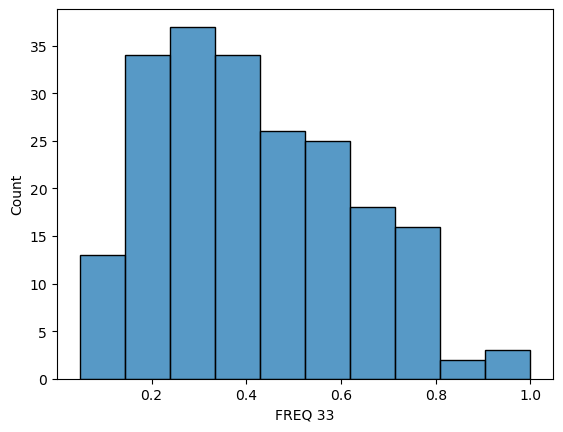

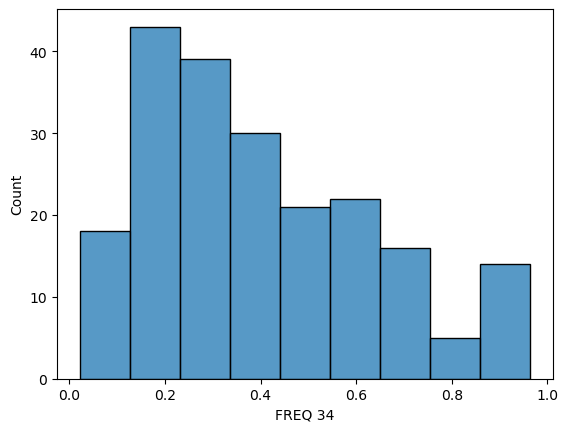

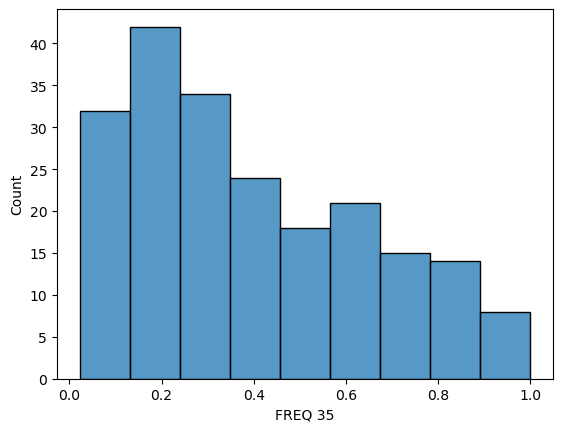

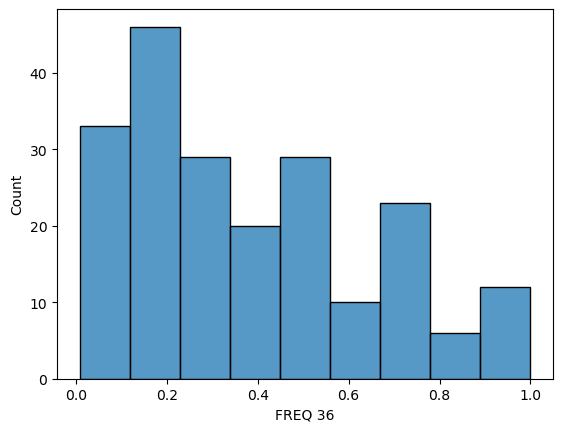

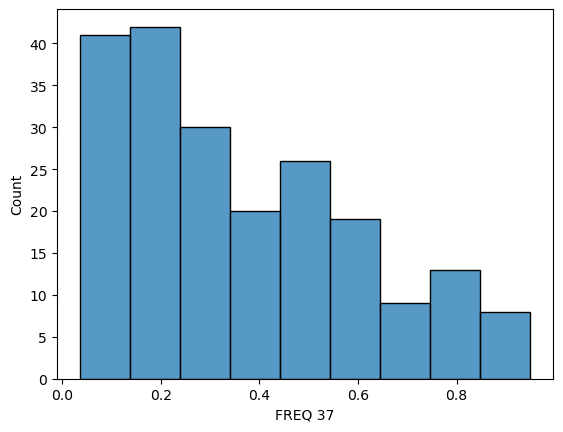

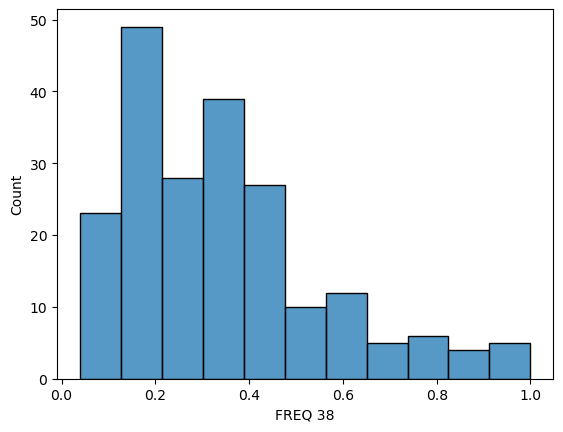

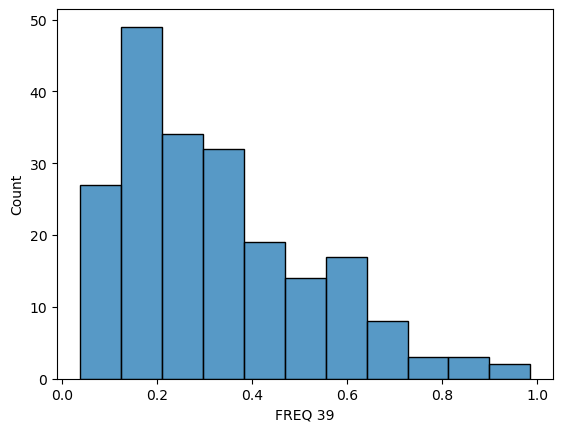

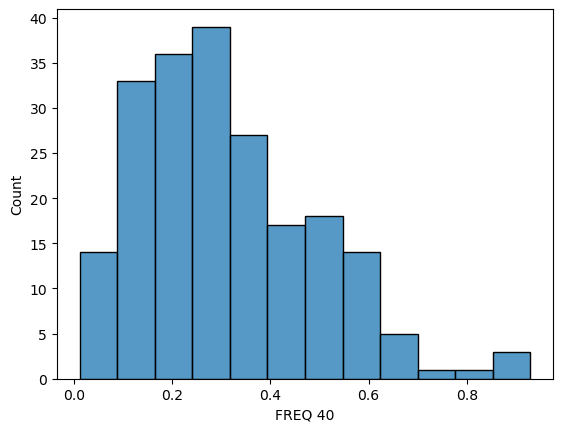

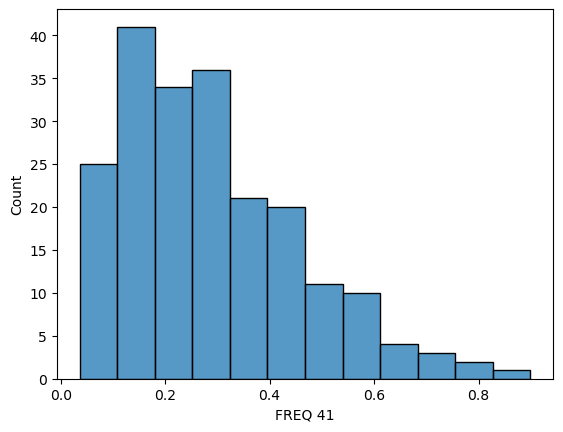

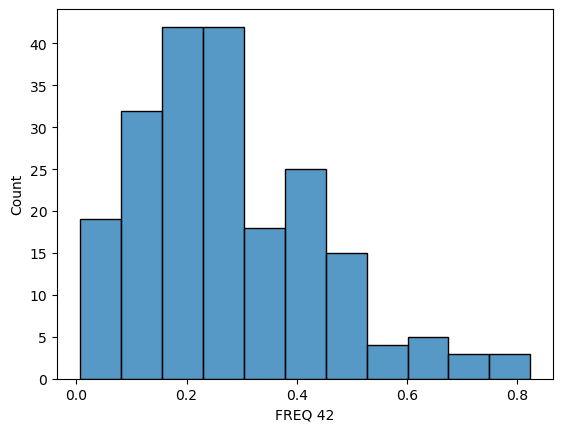

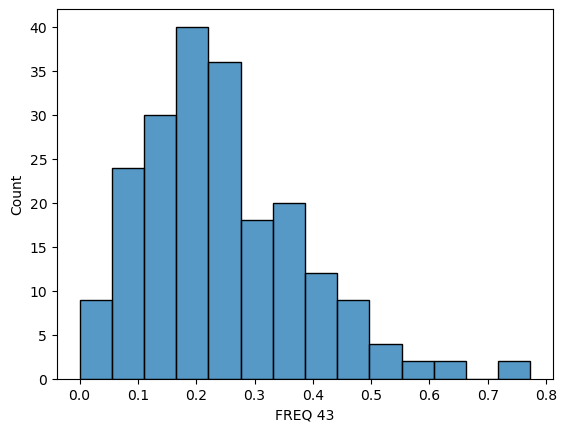

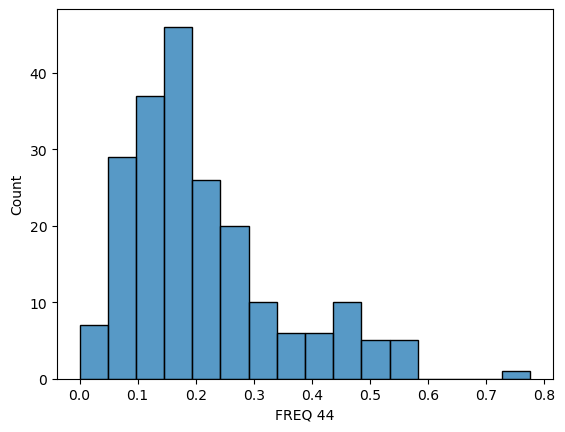

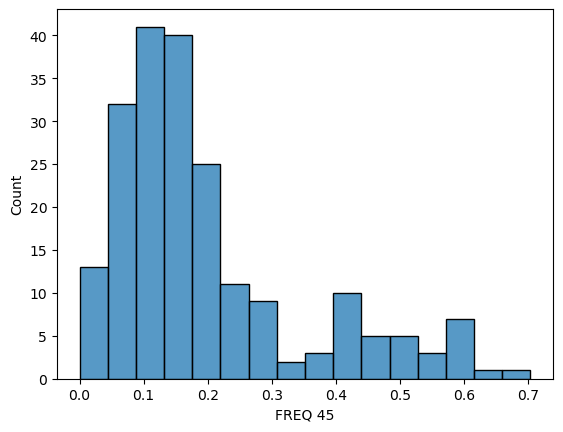

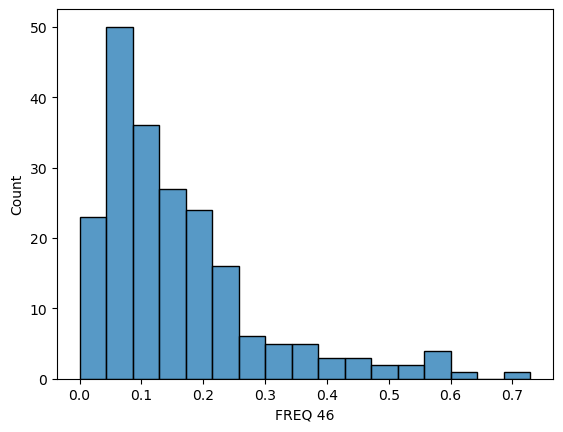

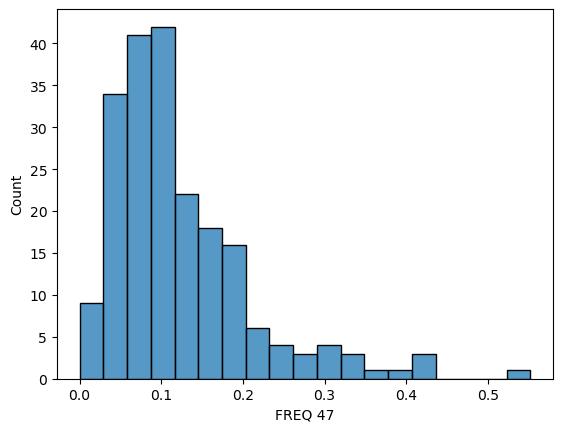

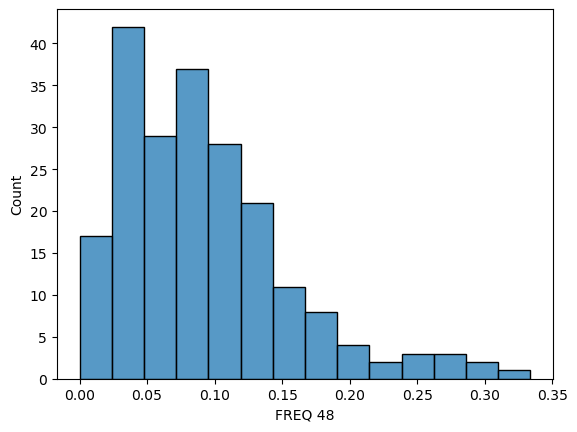

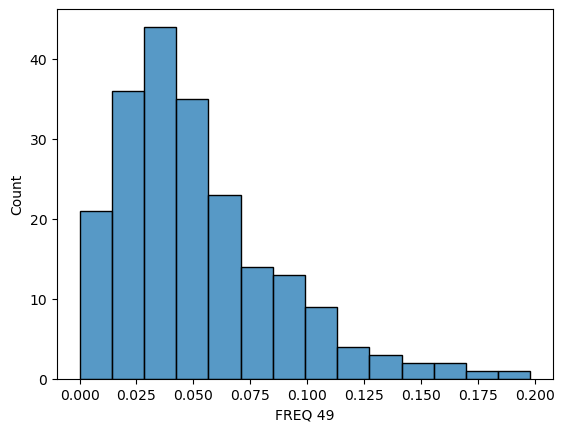

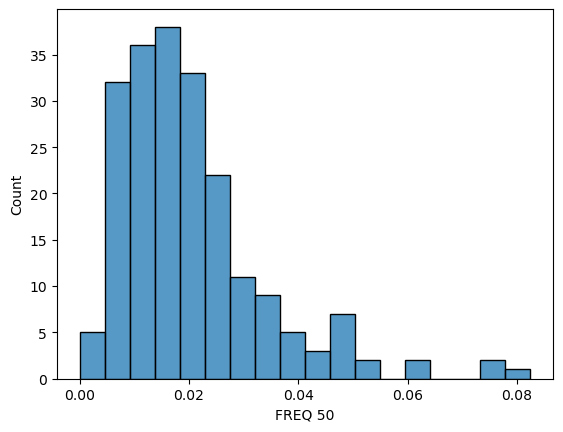

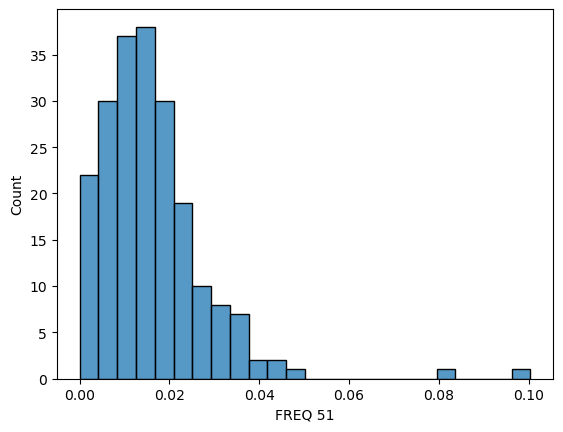

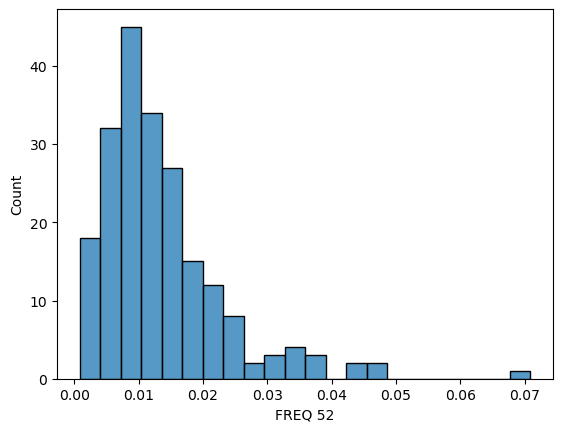

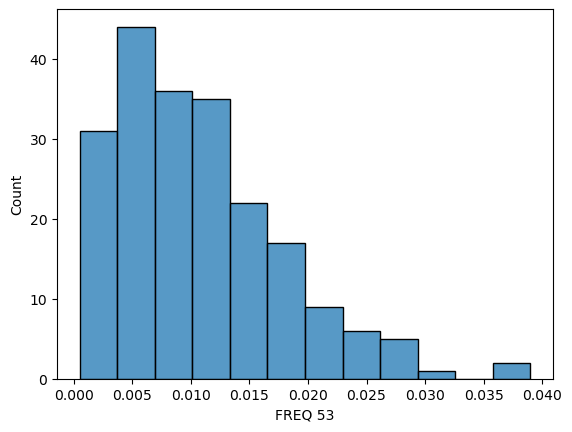

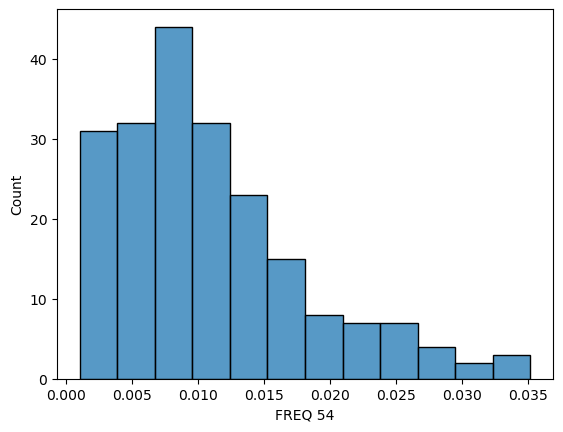

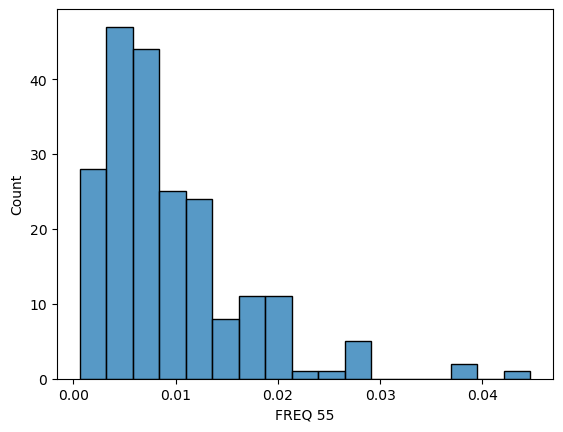

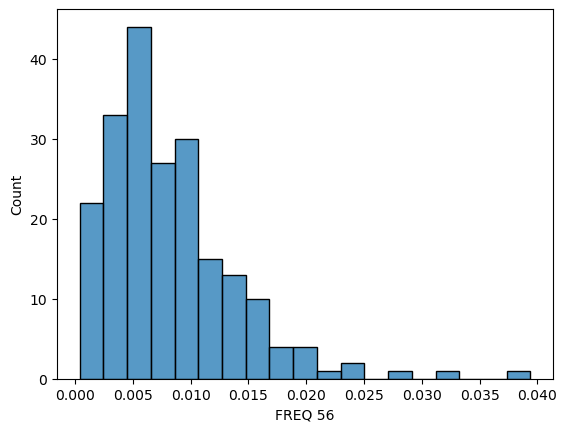

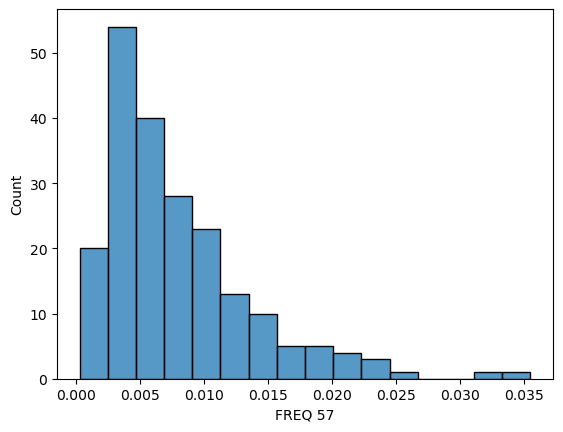

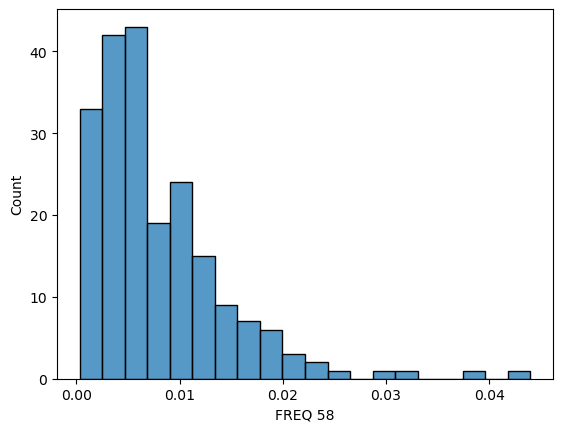

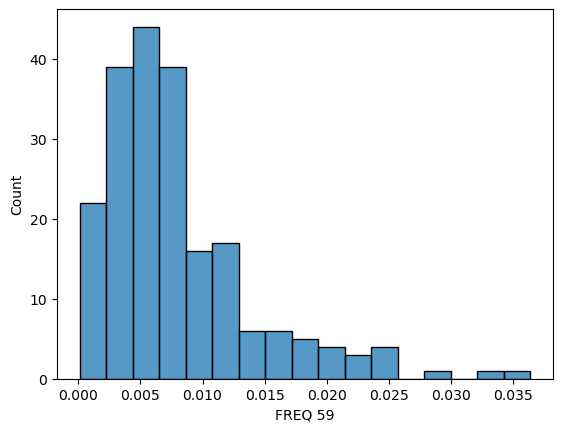

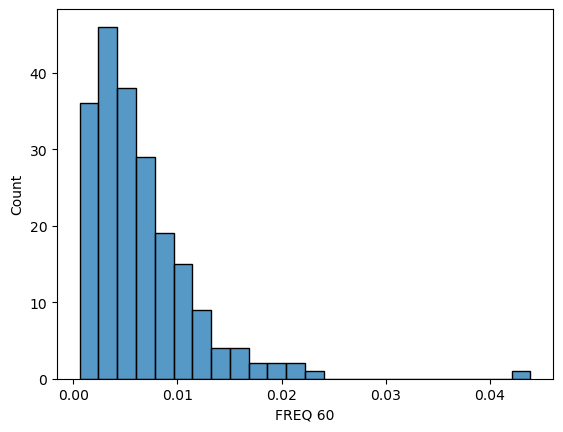

In [17]:
for i in df.columns:
    if df[i].dtypes !="object":
        sns.histplot(x = df[i])
        plt.show()

### kdeplot

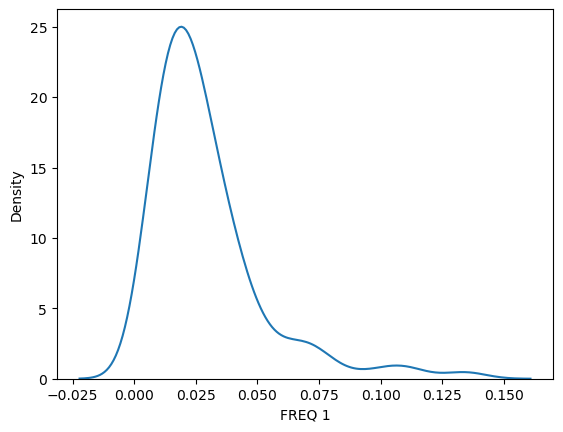

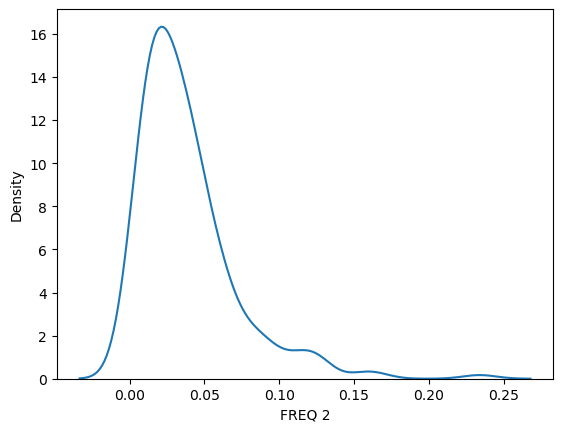

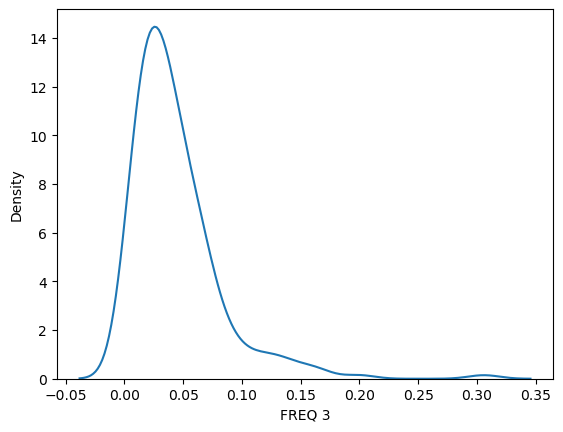

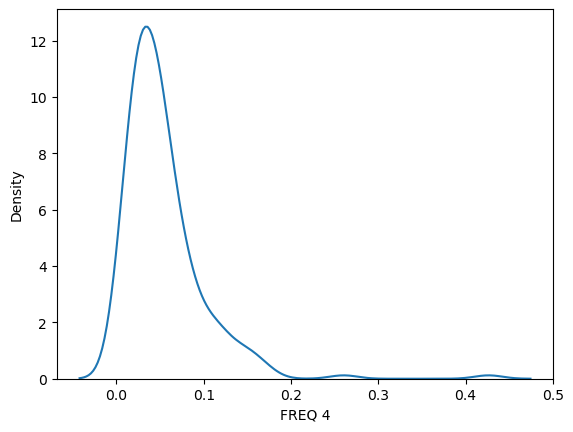

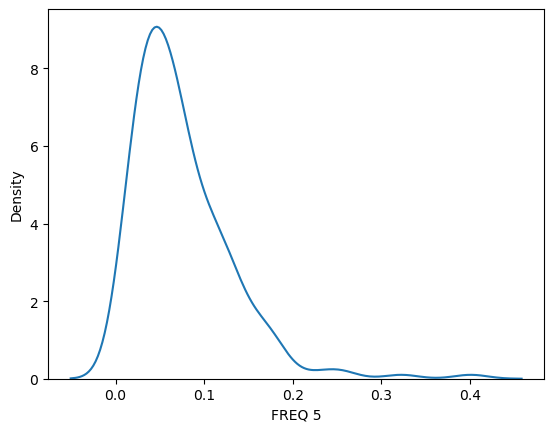

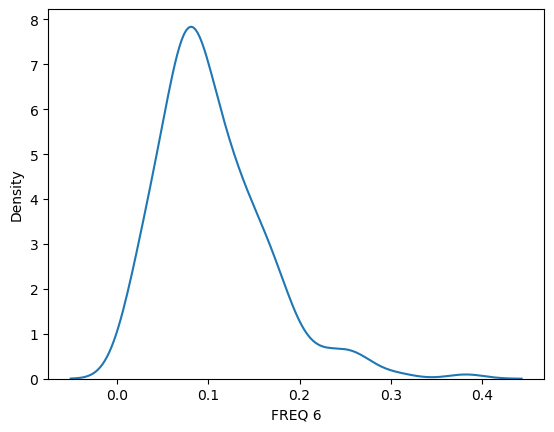

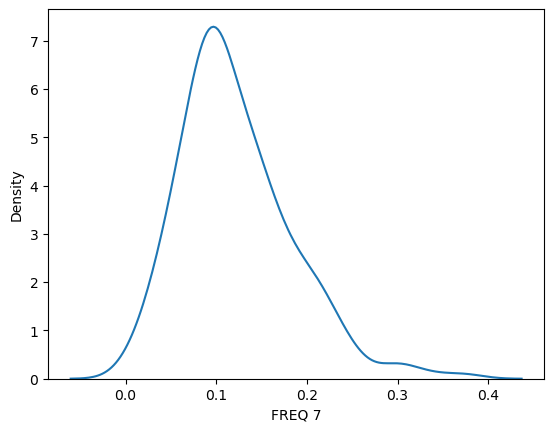

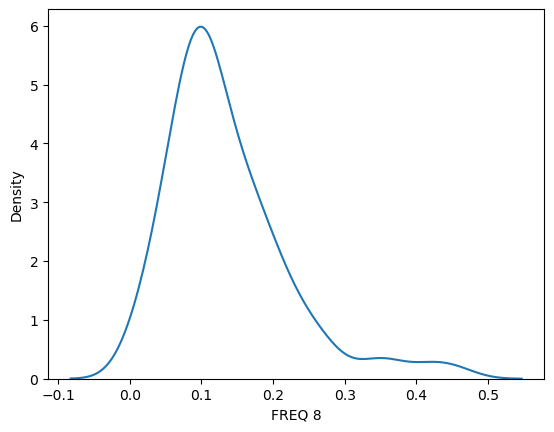

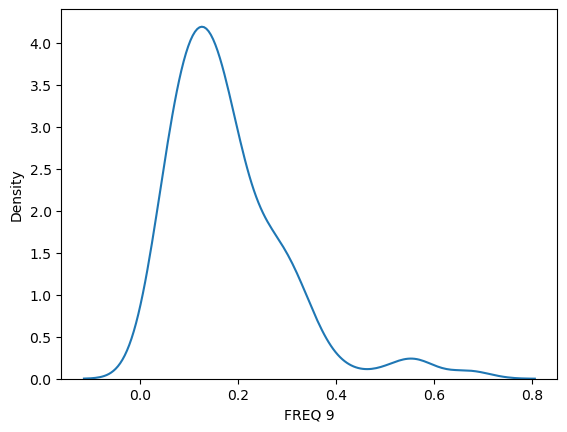

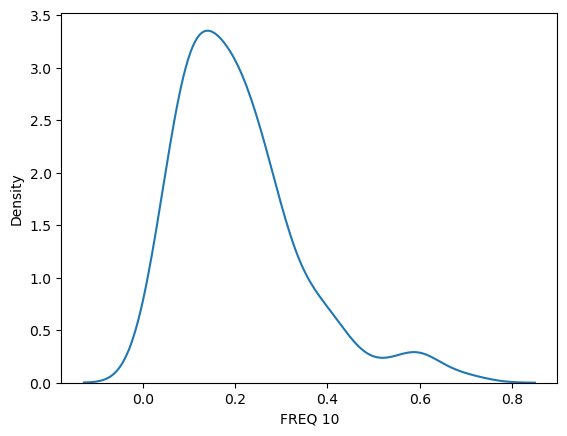

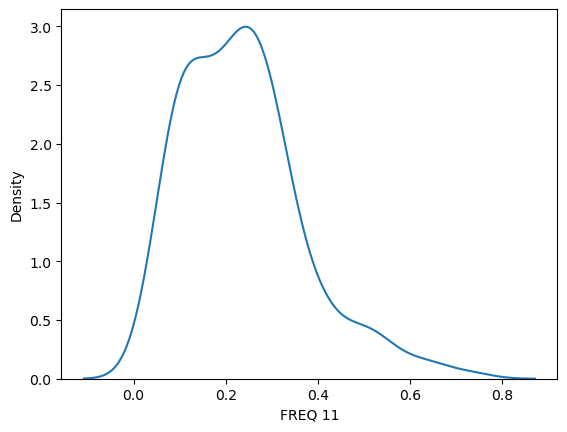

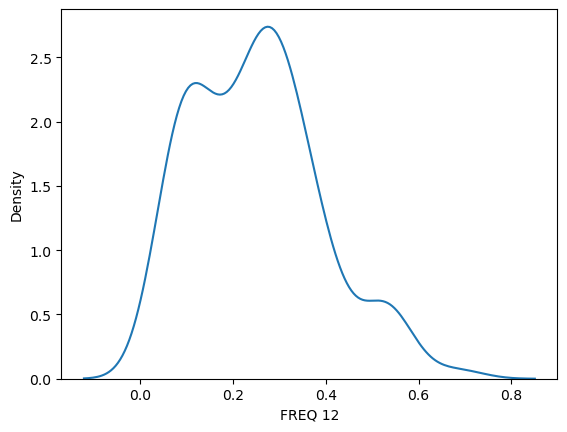

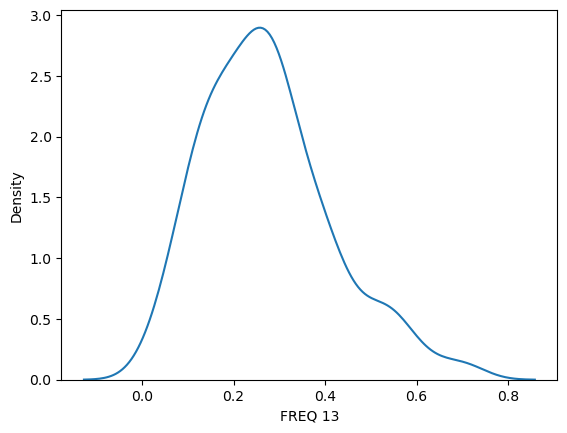

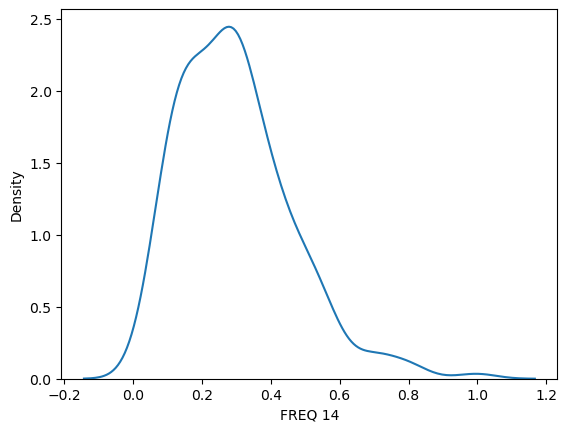

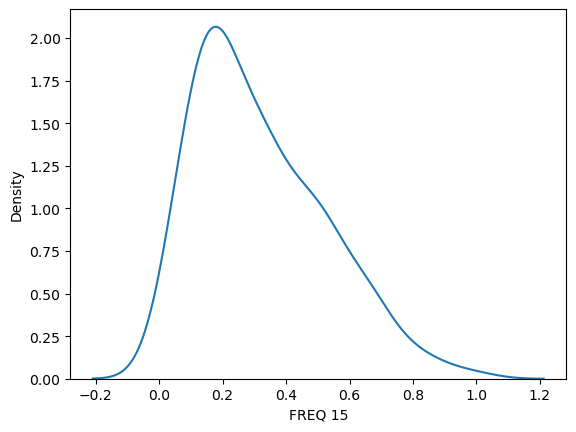

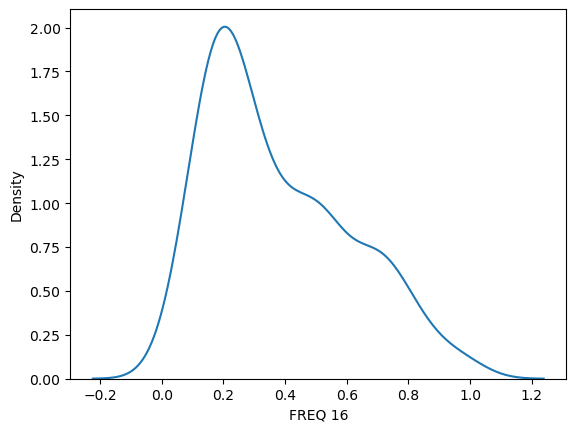

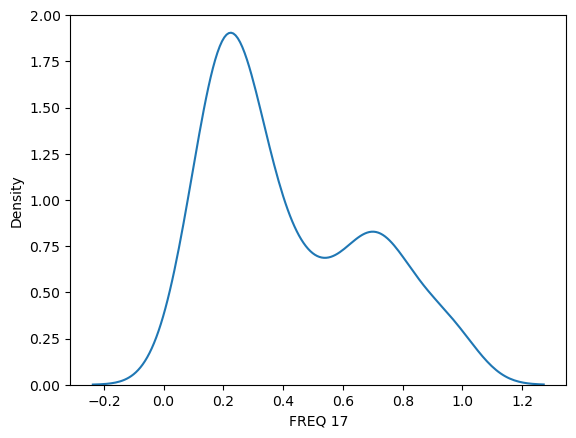

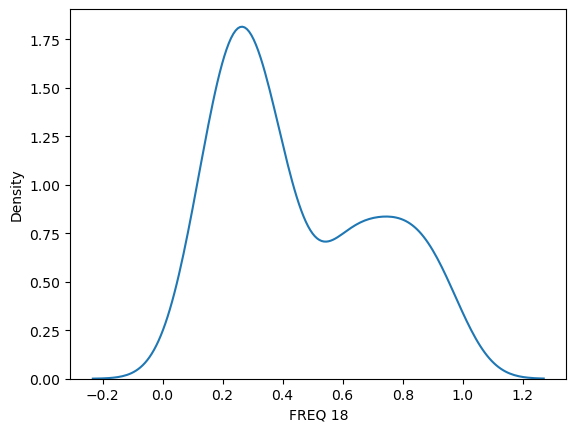

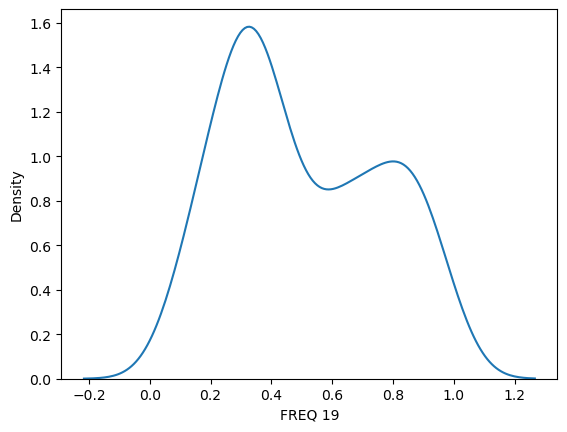

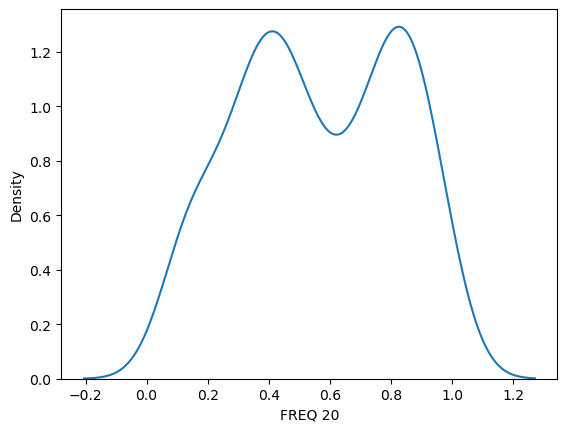

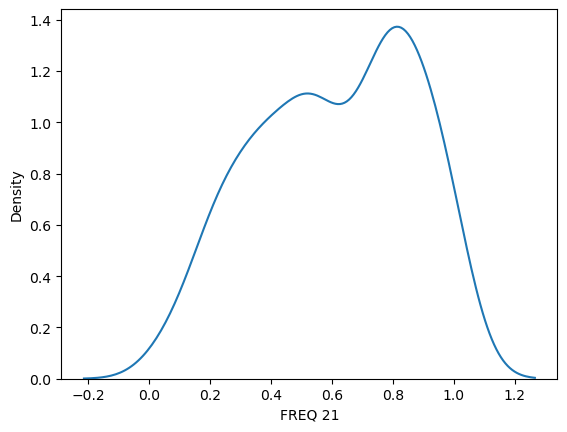

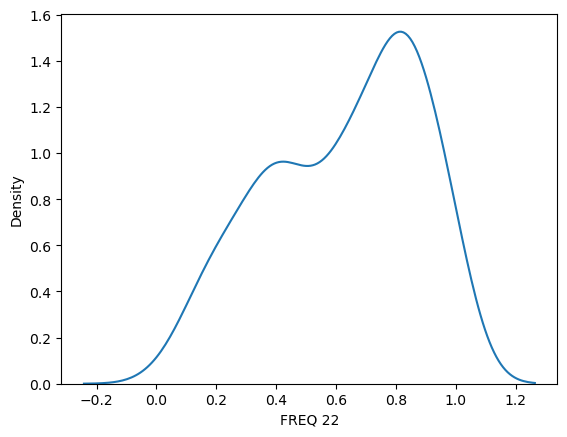

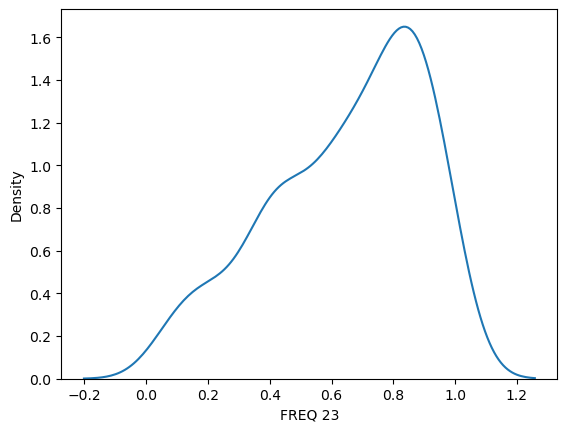

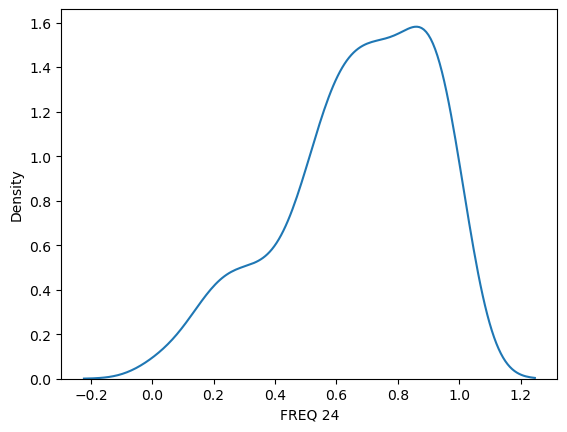

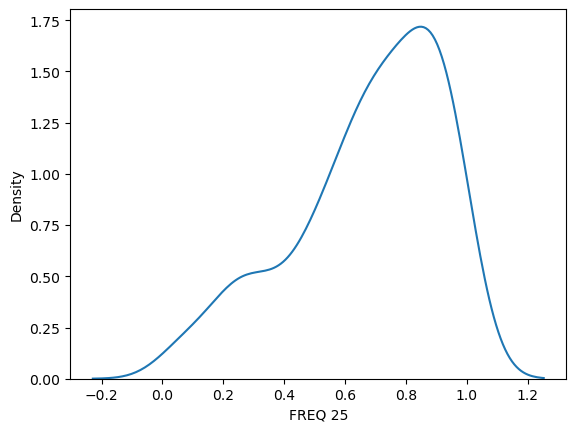

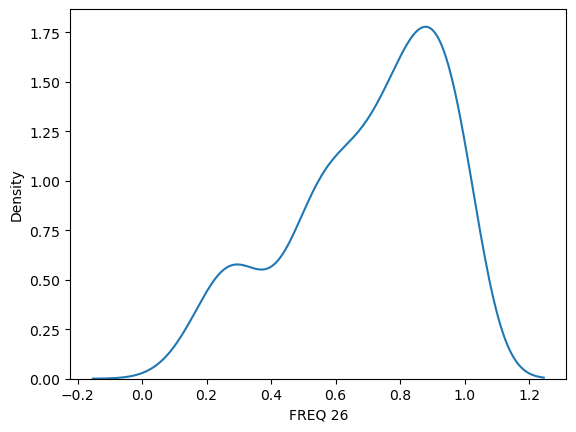

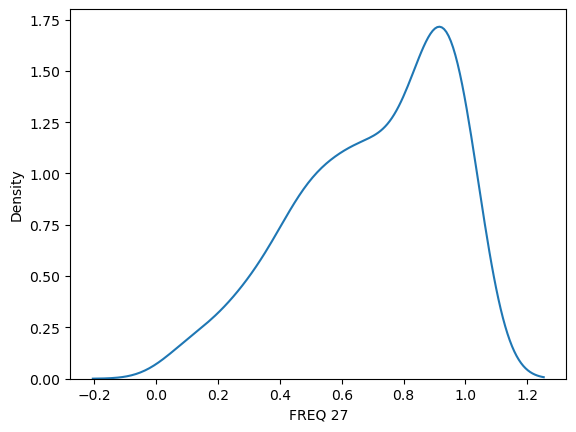

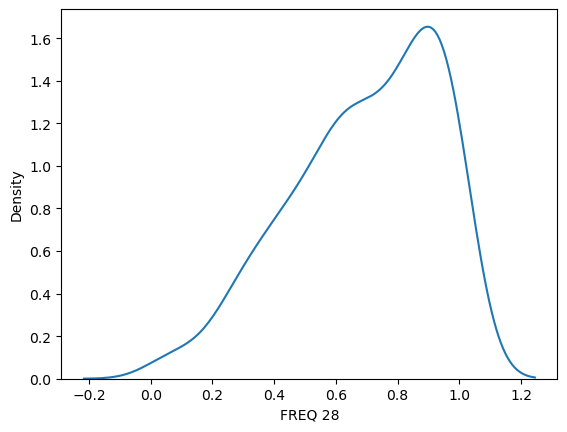

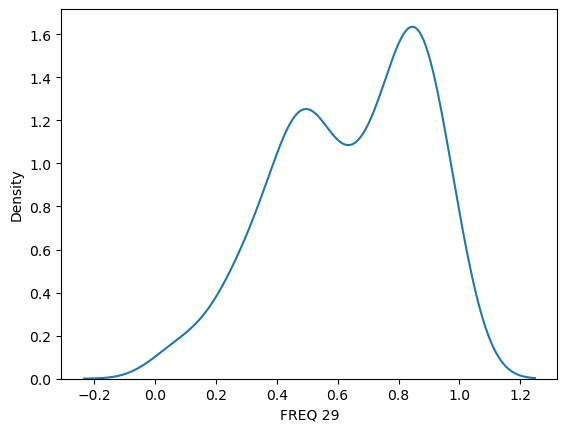

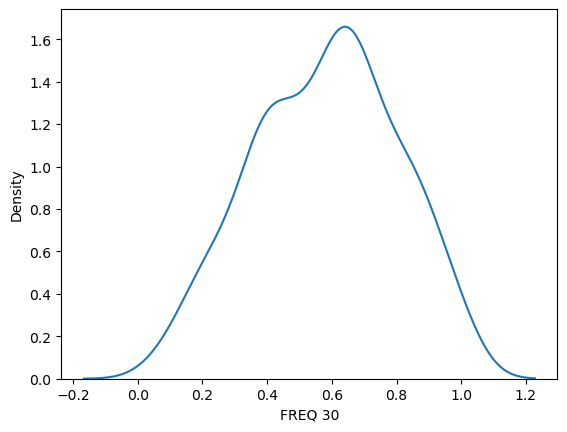

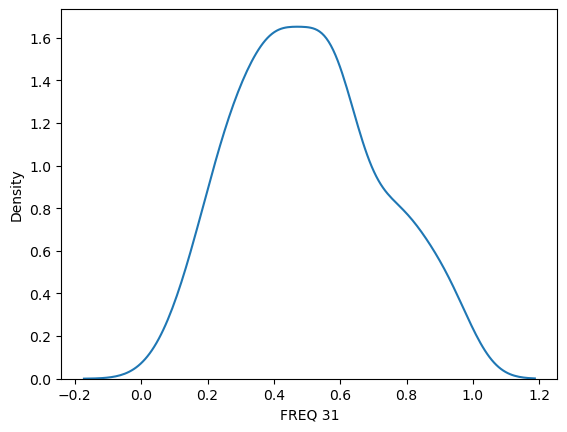

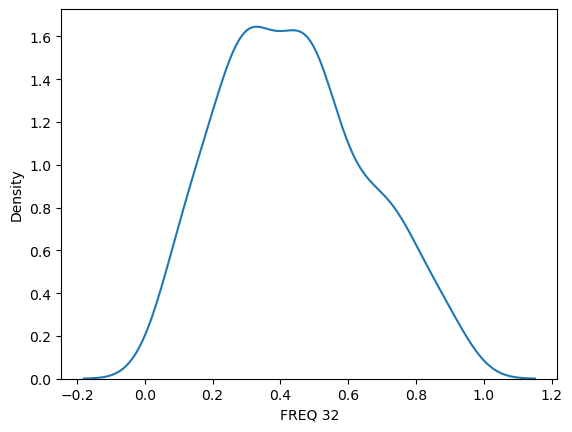

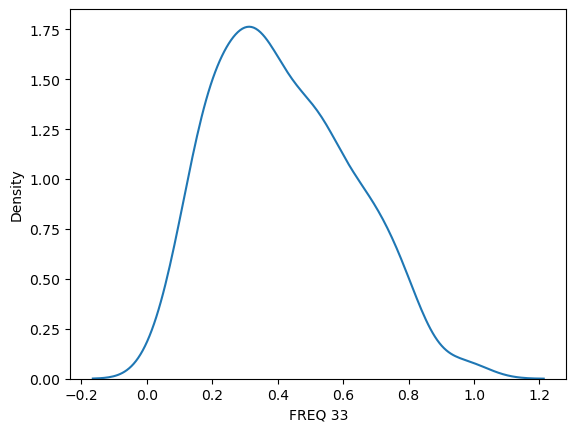

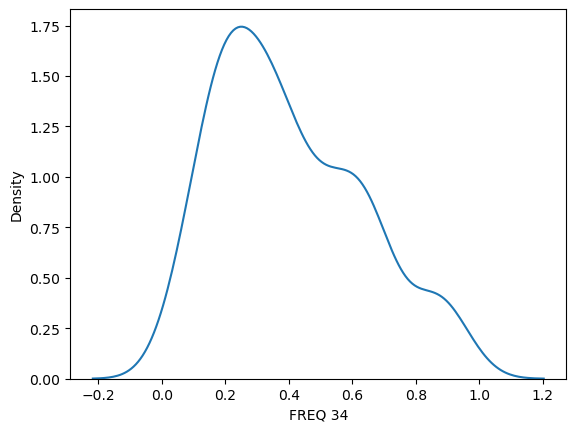

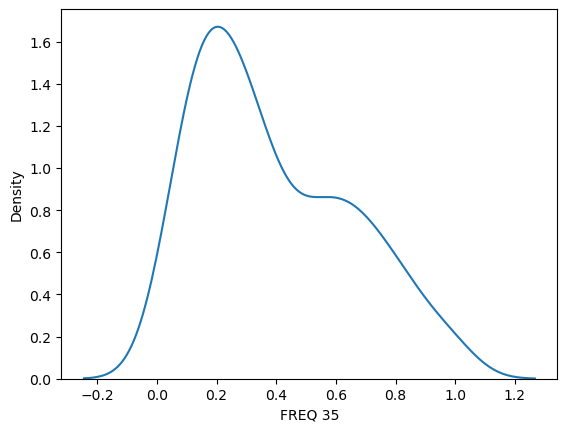

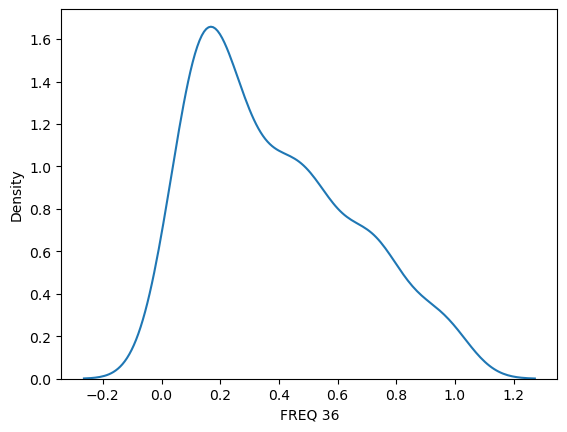

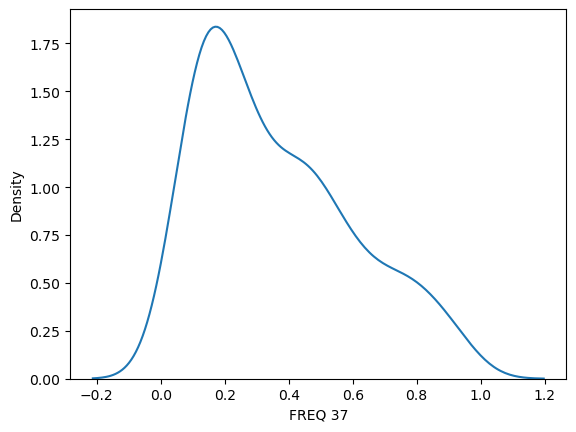

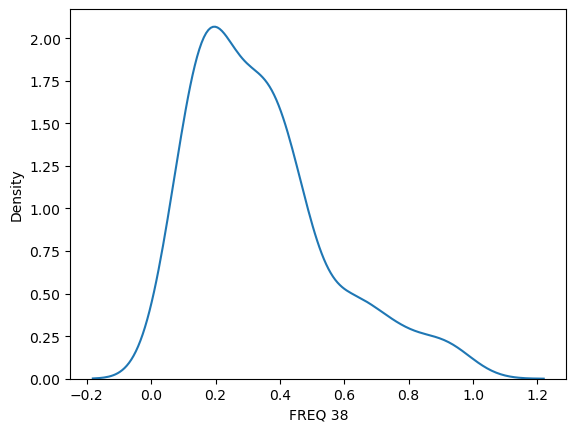

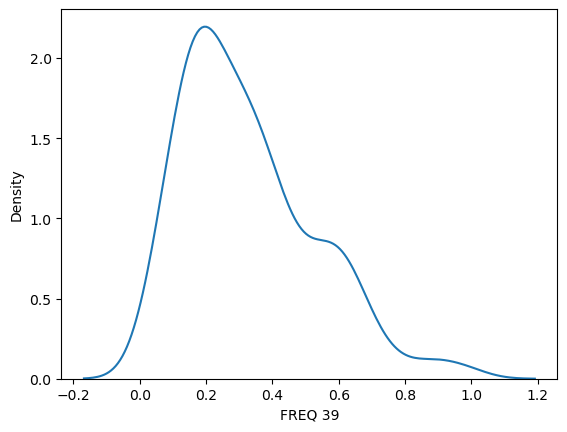

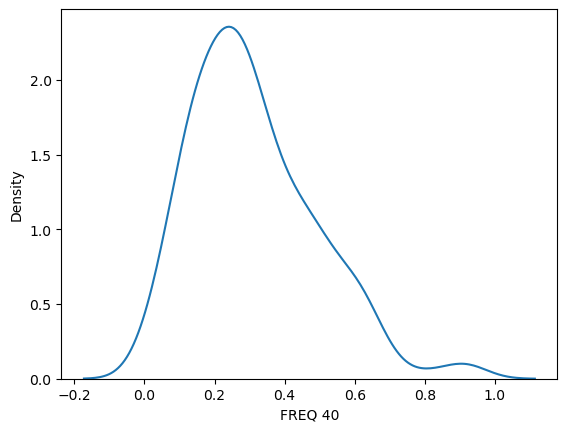

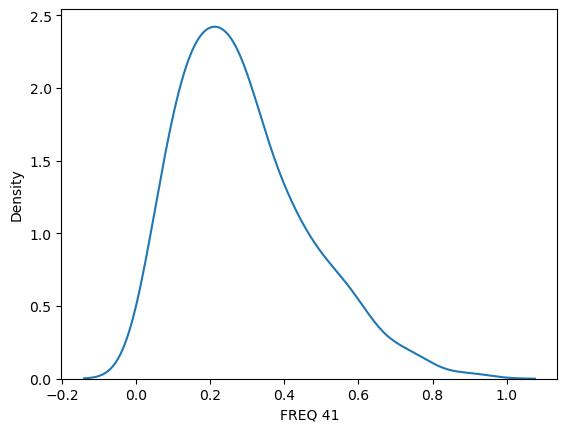

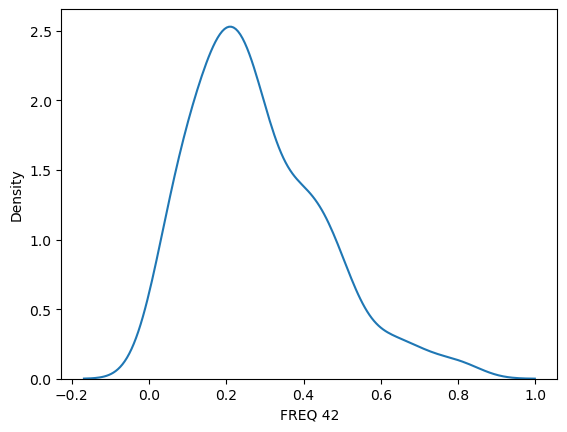

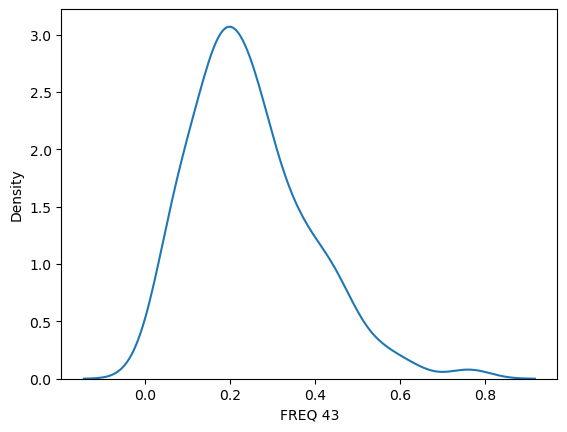

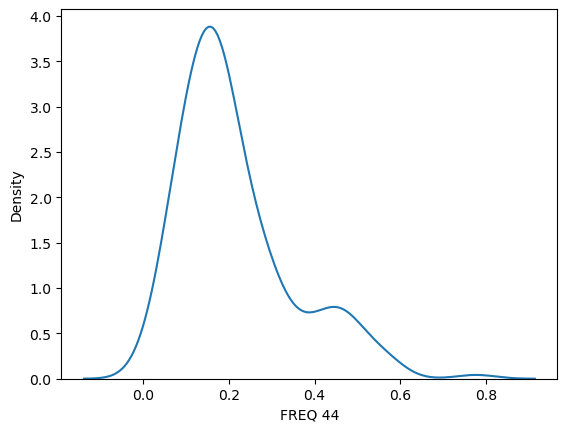

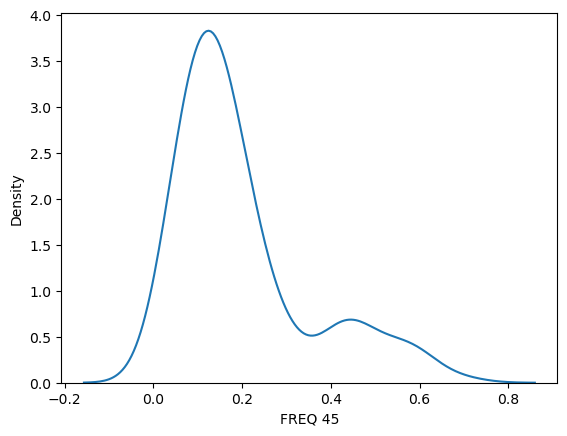

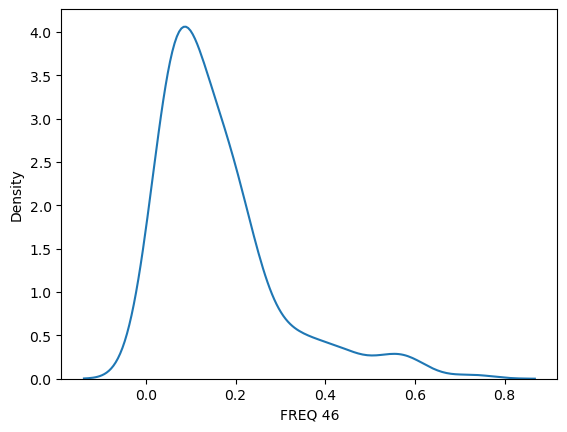

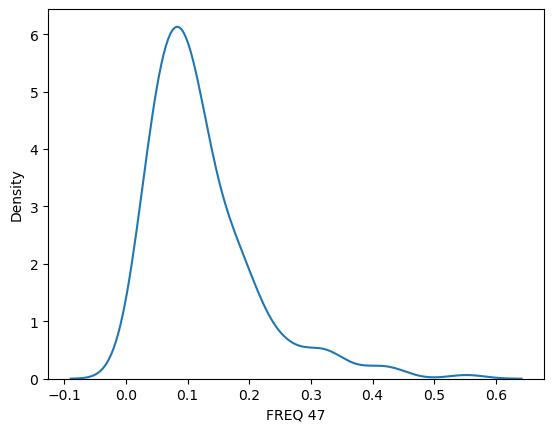

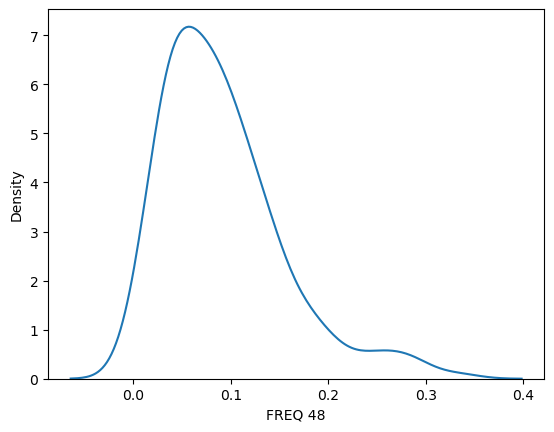

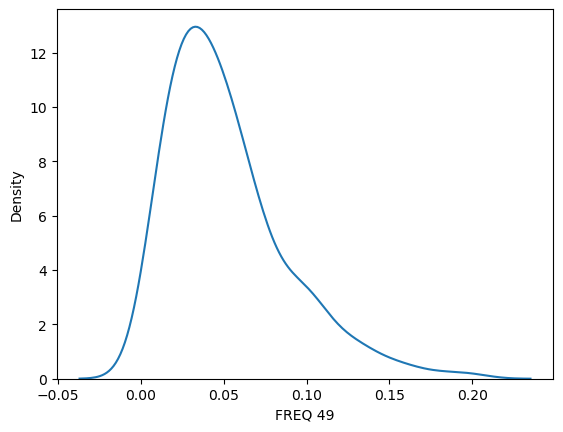

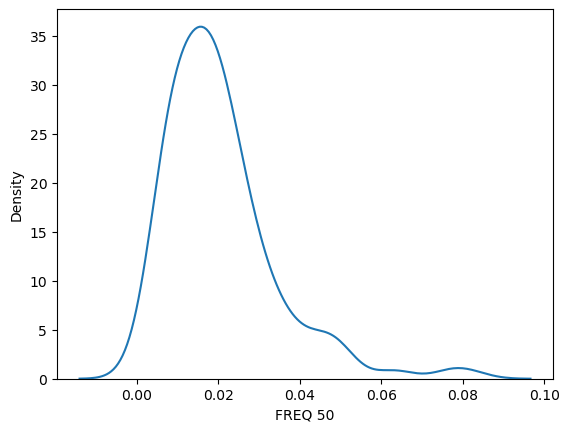

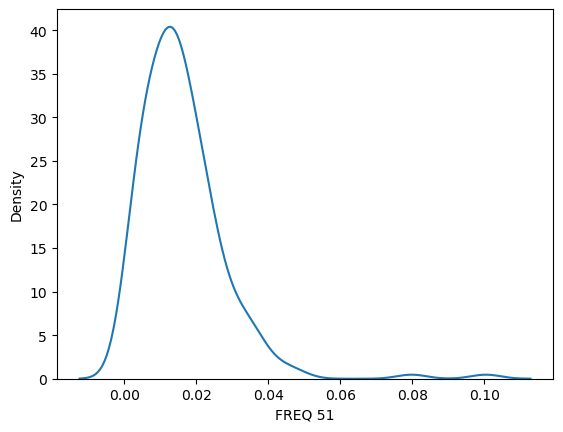

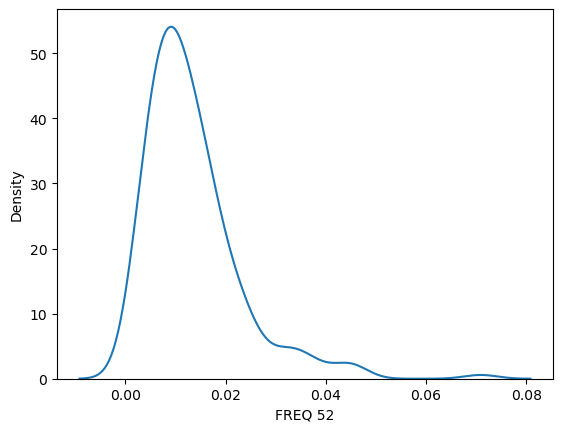

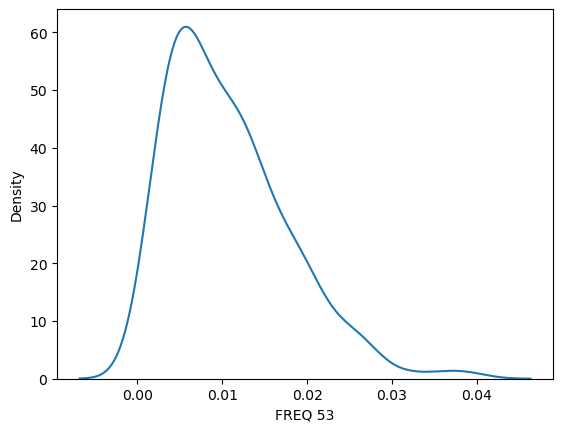

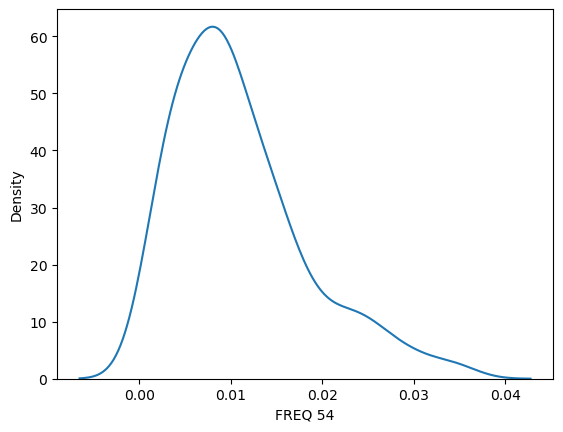

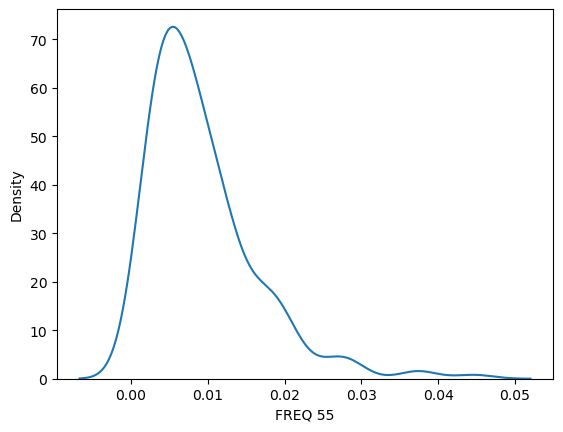

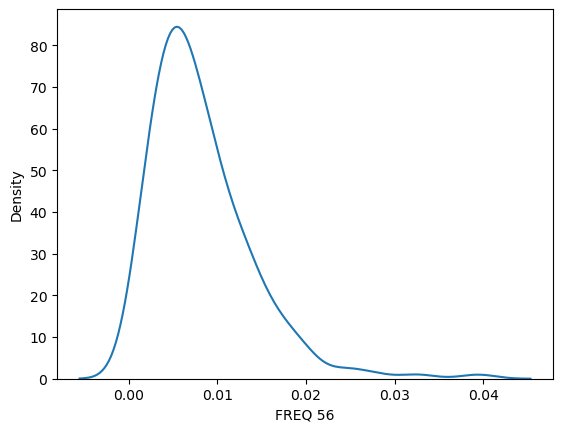

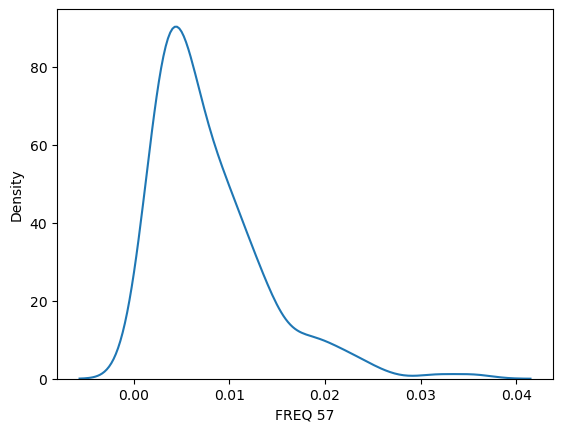

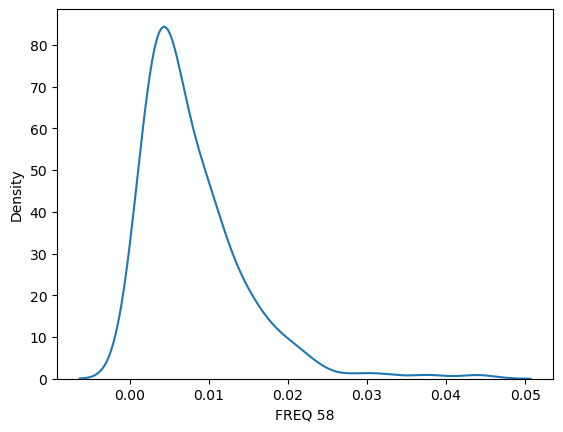

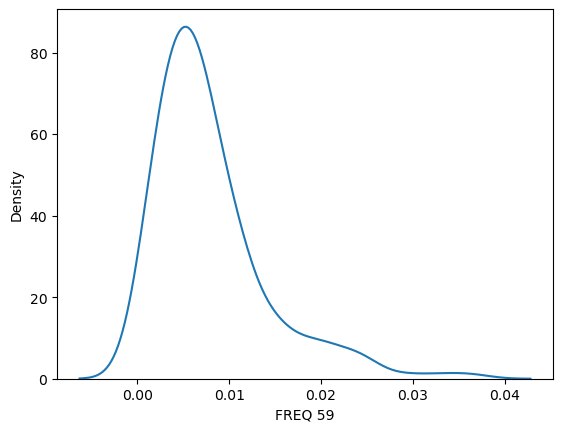

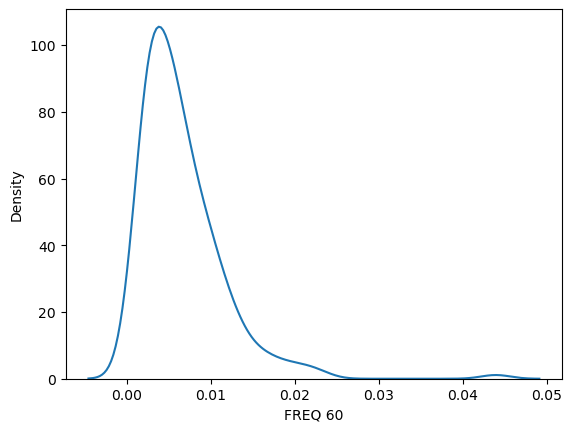

In [18]:
for i in df.columns:
    if df[i].dtypes !="object":
        sns.kdeplot(x = df[i])
        plt.show()

### boxplot

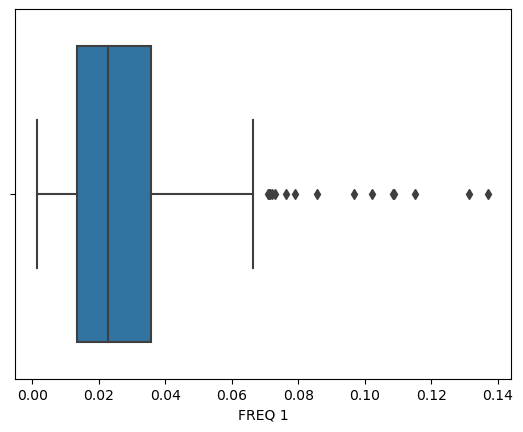

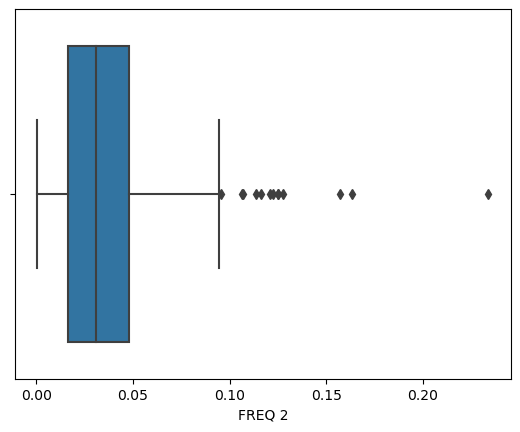

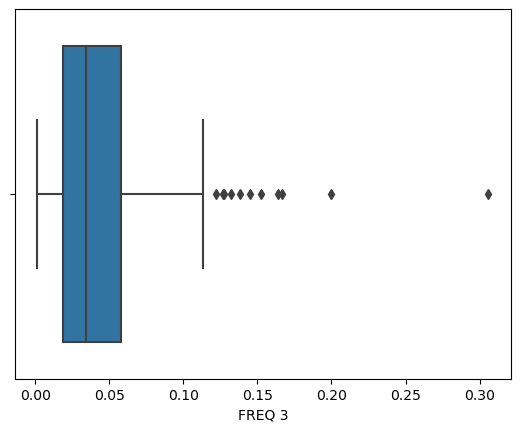

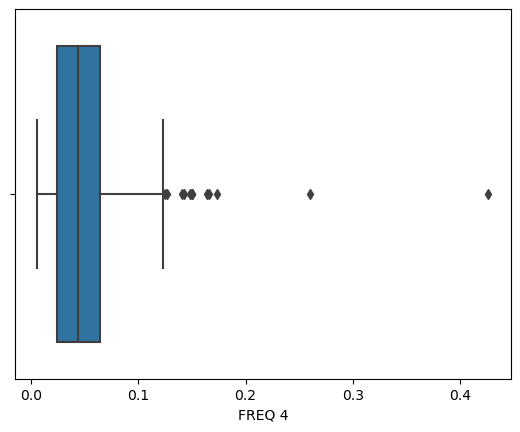

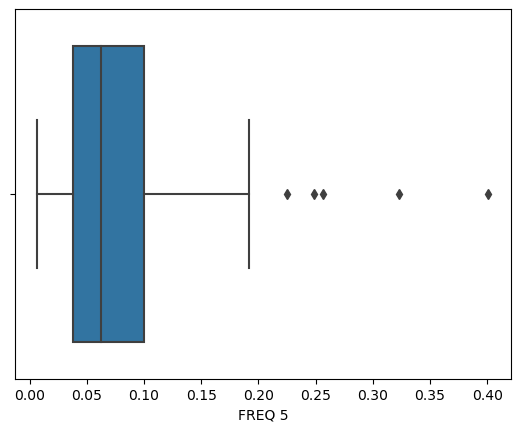

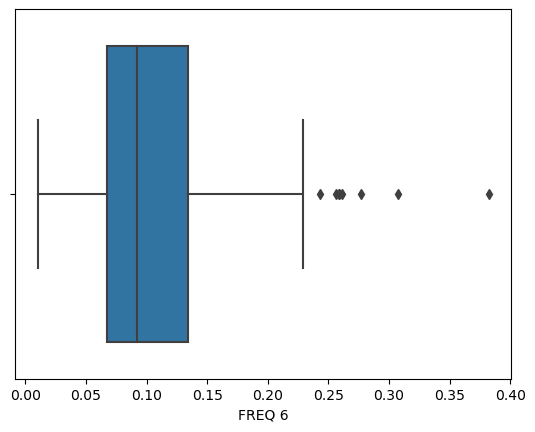

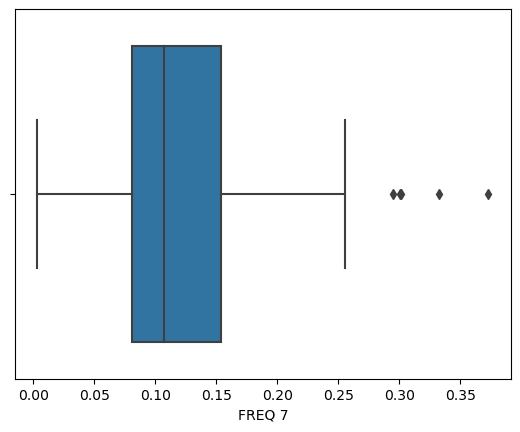

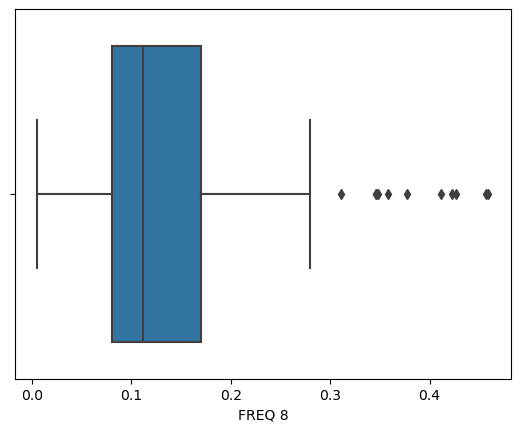

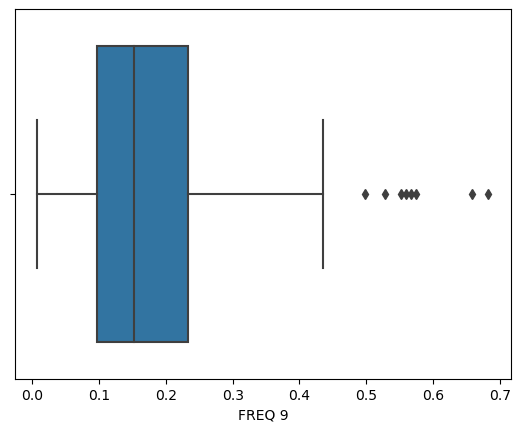

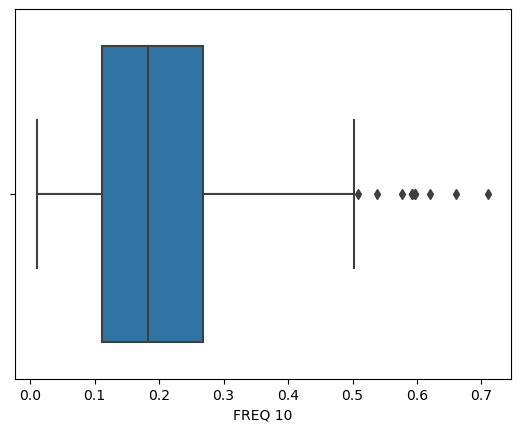

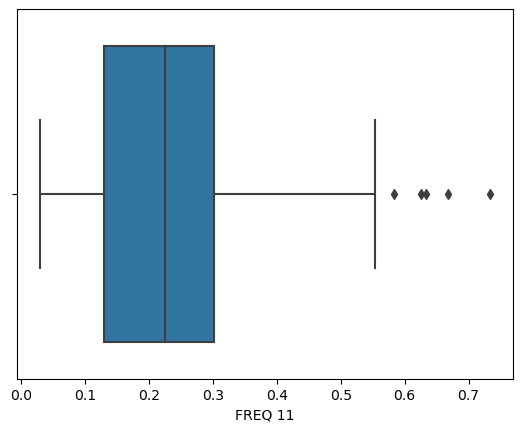

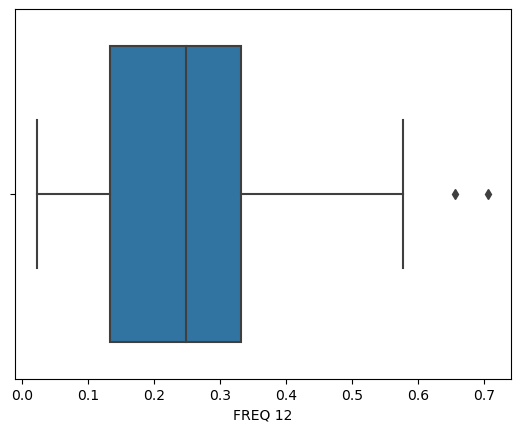

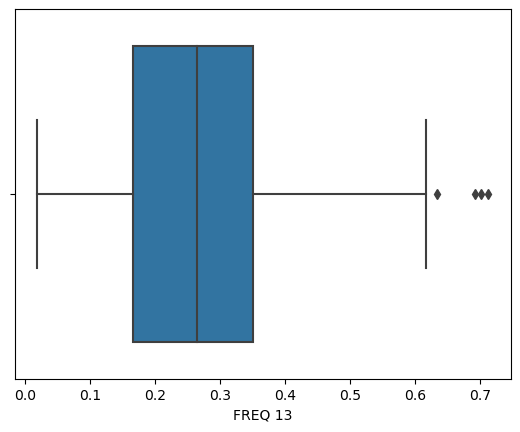

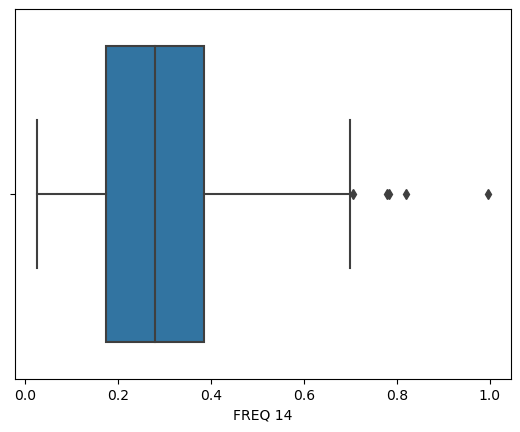

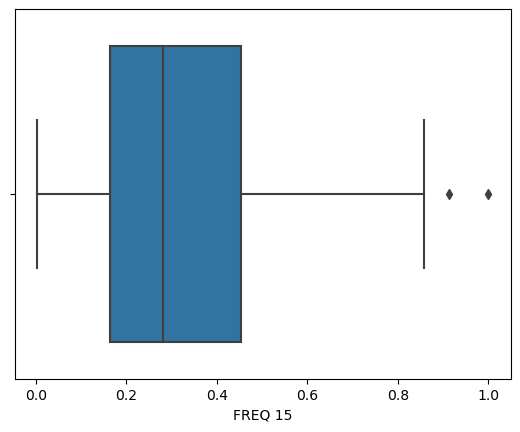

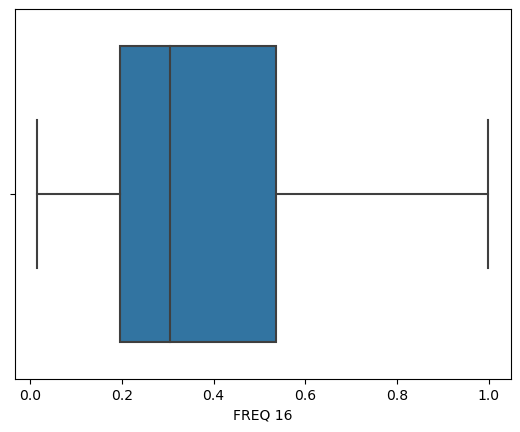

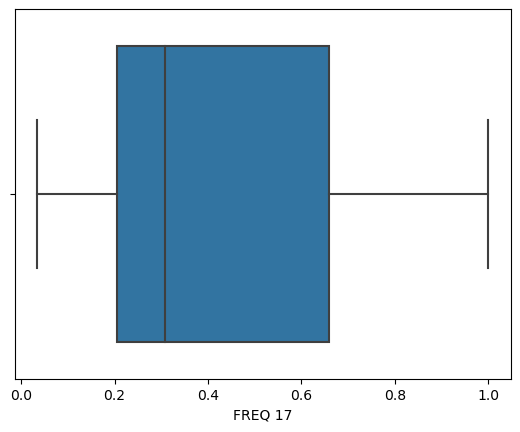

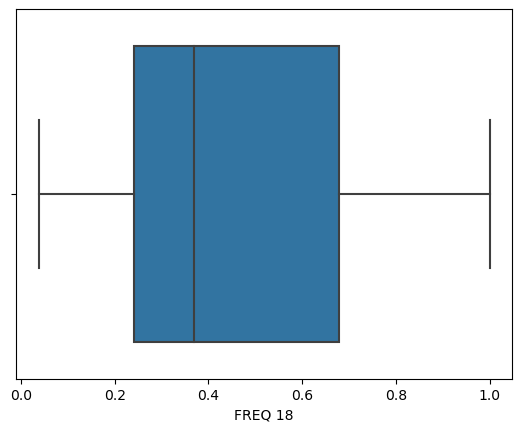

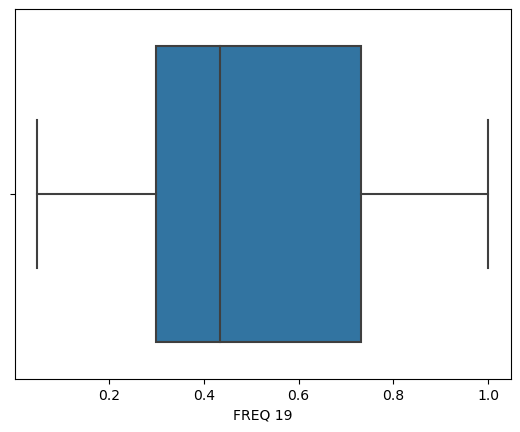

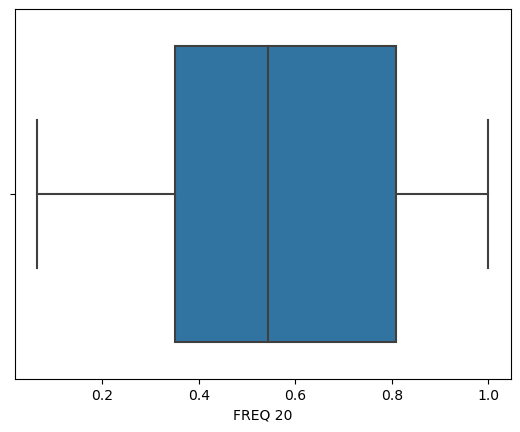

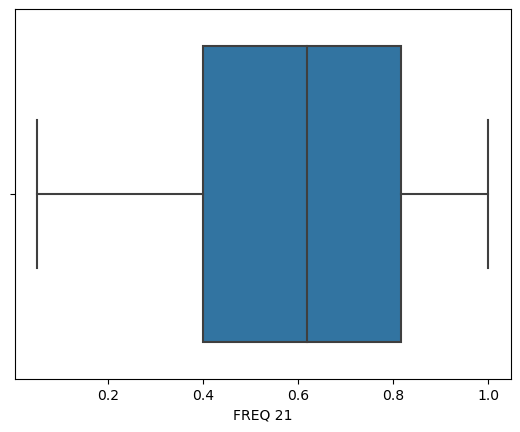

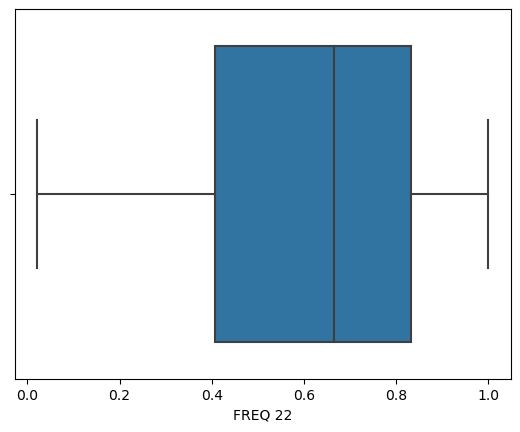

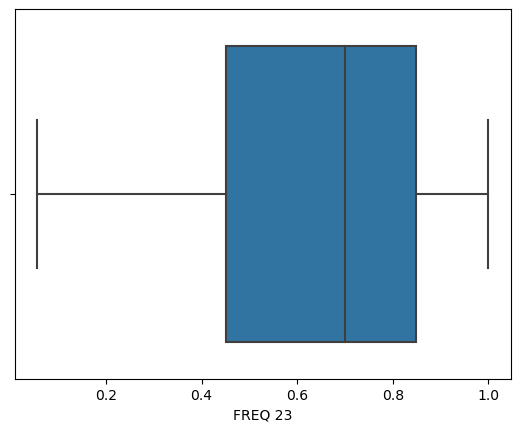

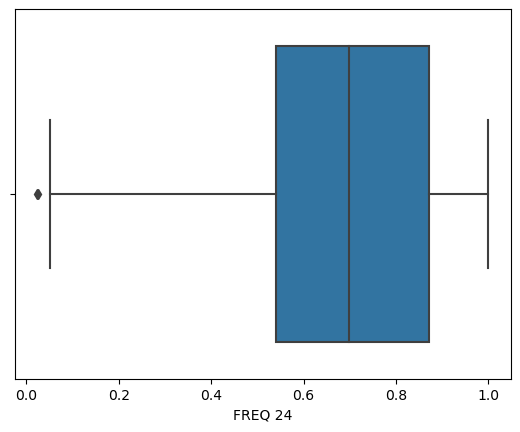

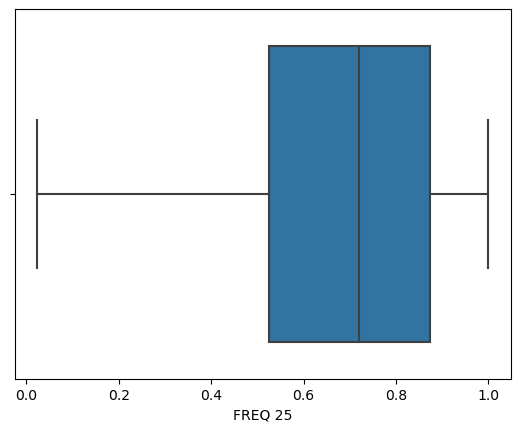

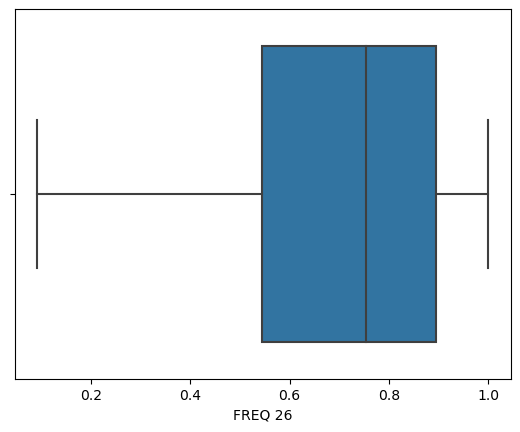

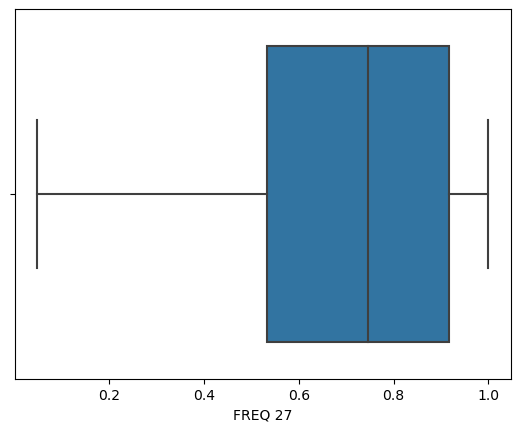

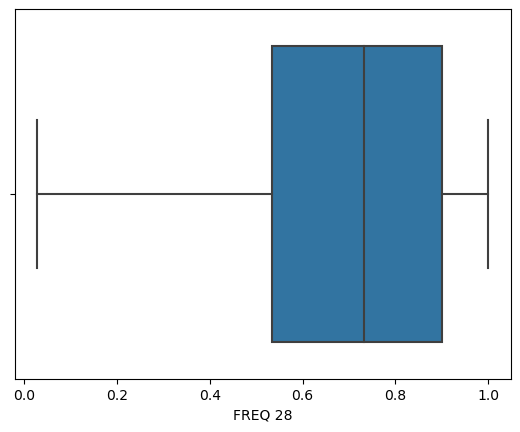

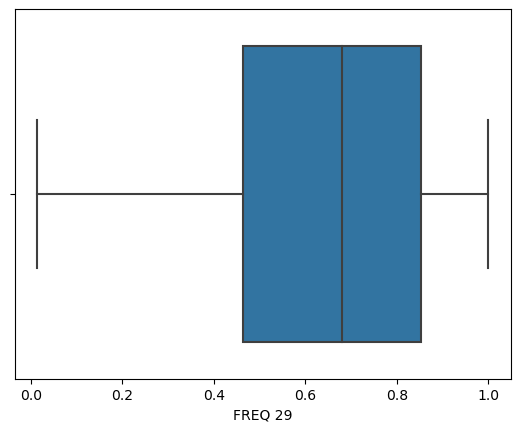

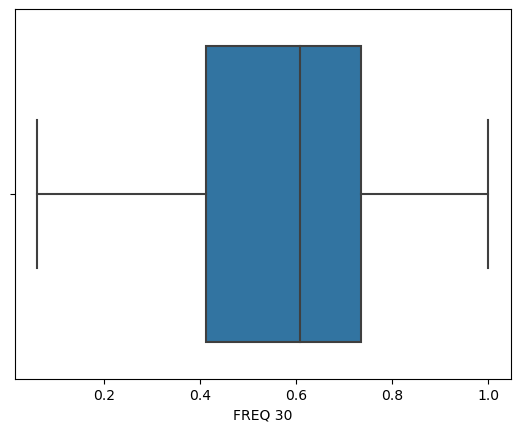

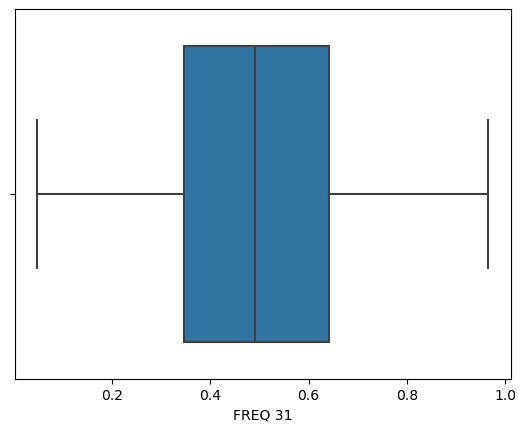

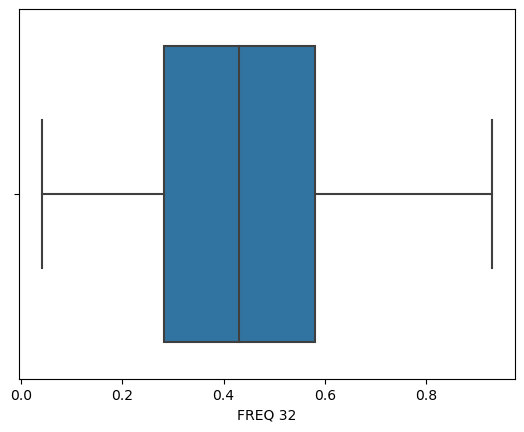

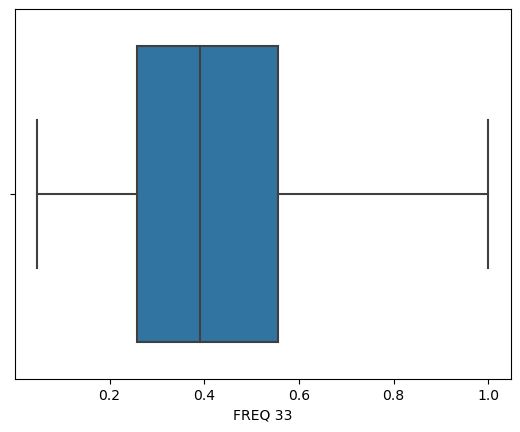

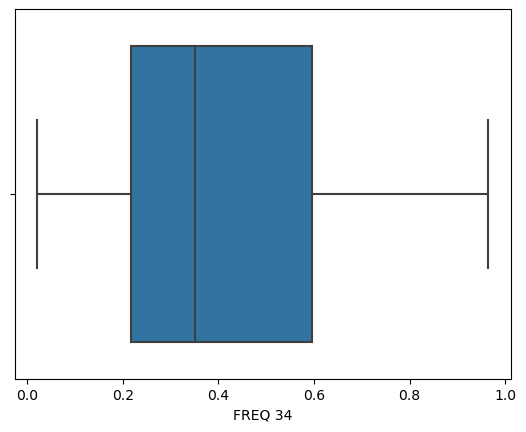

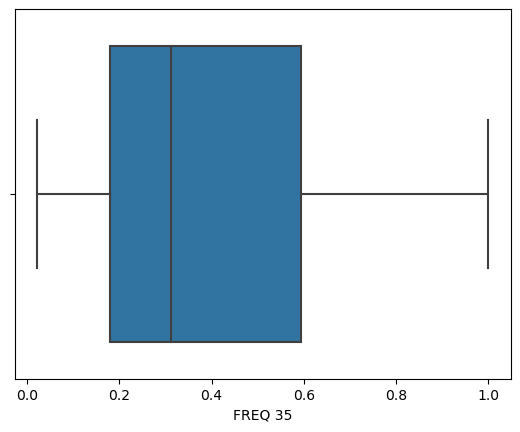

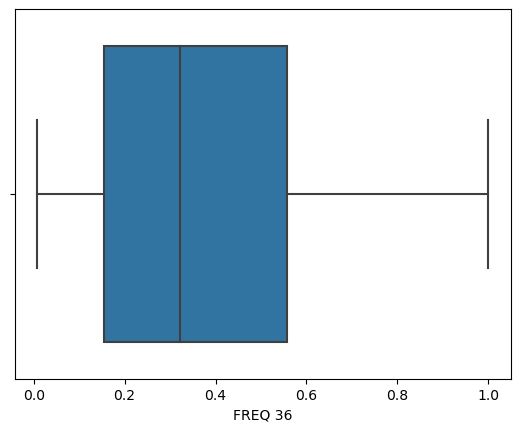

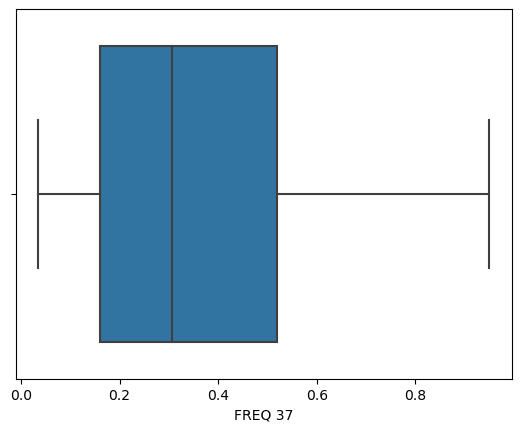

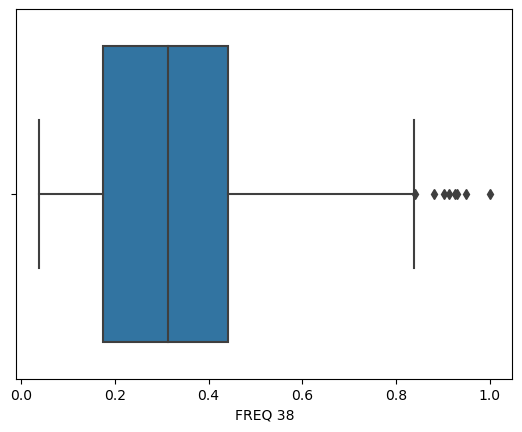

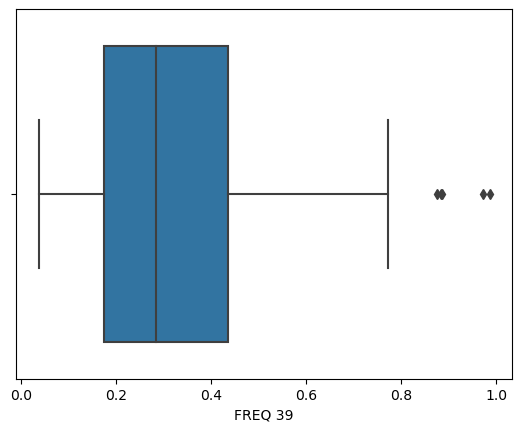

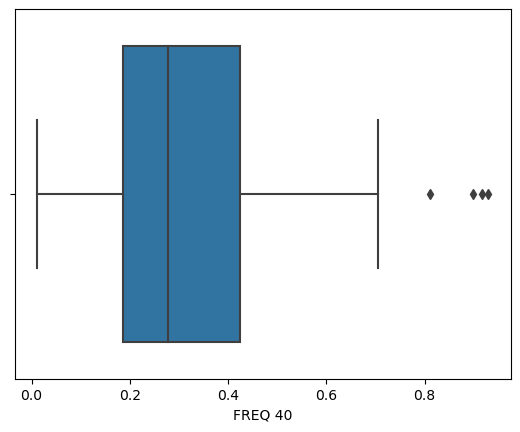

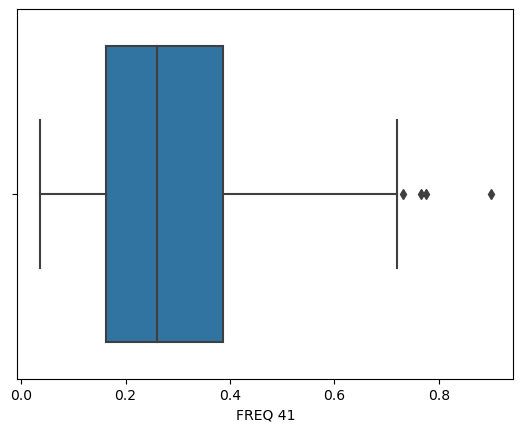

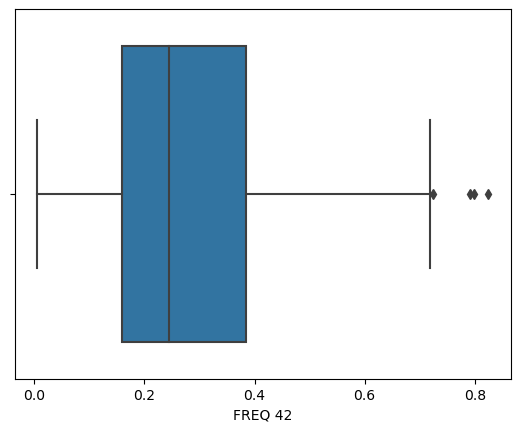

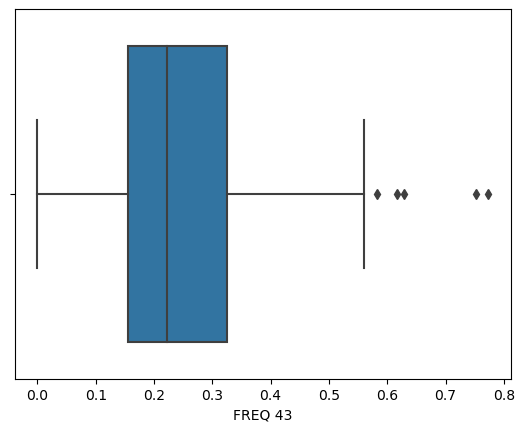

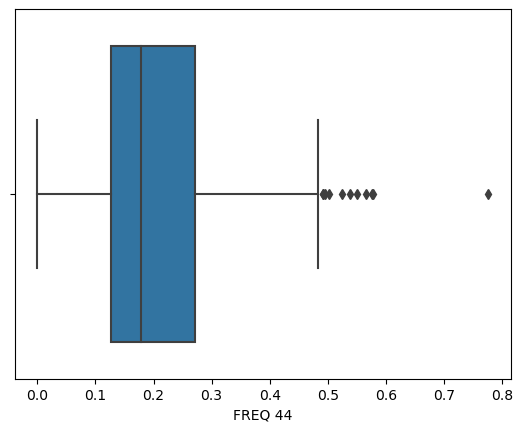

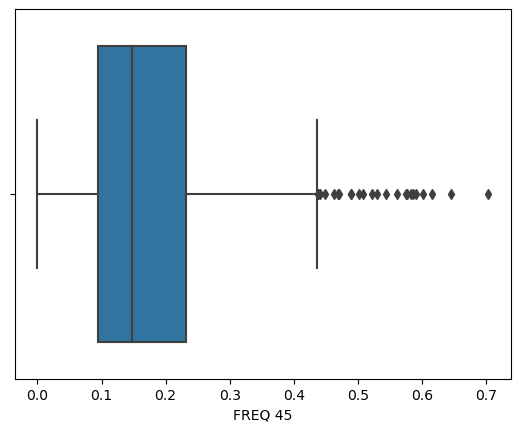

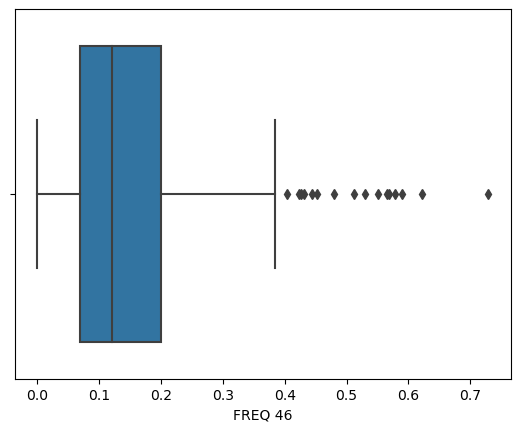

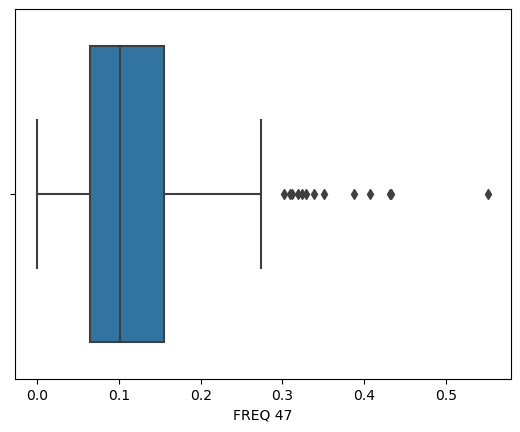

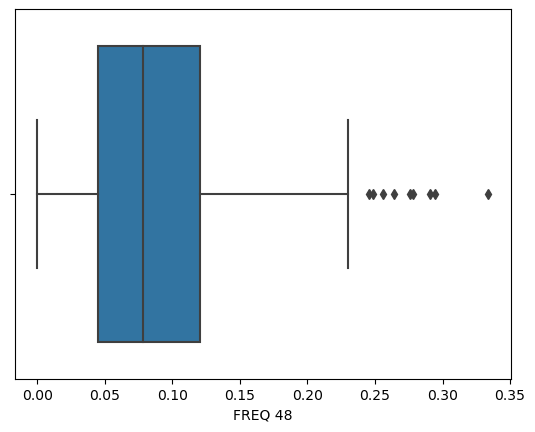

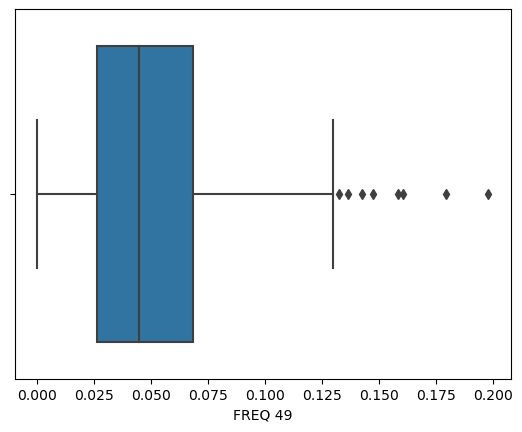

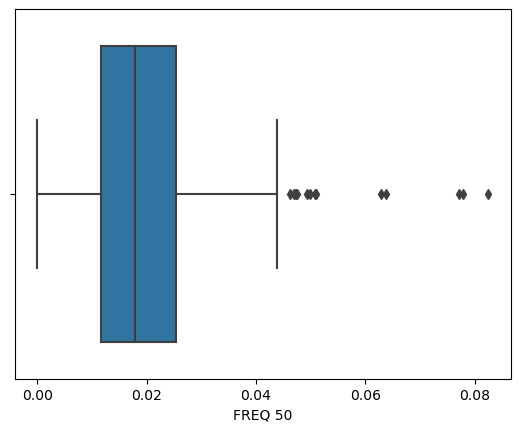

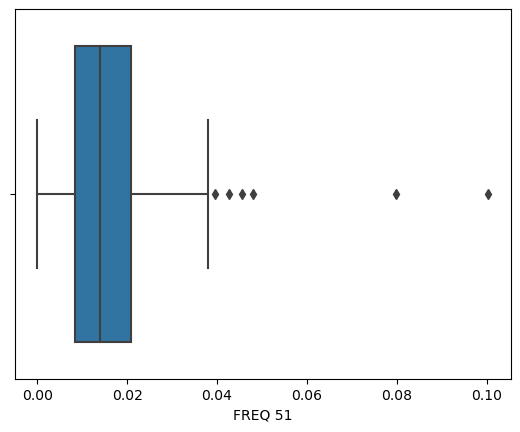

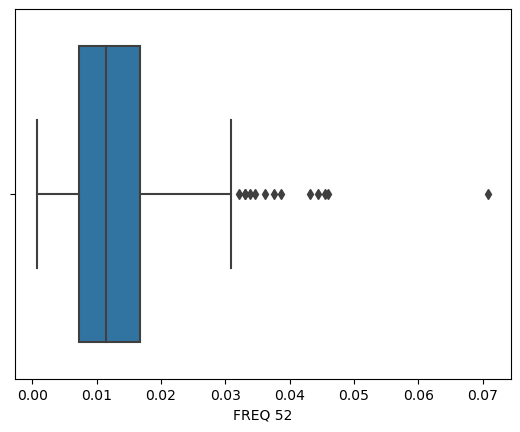

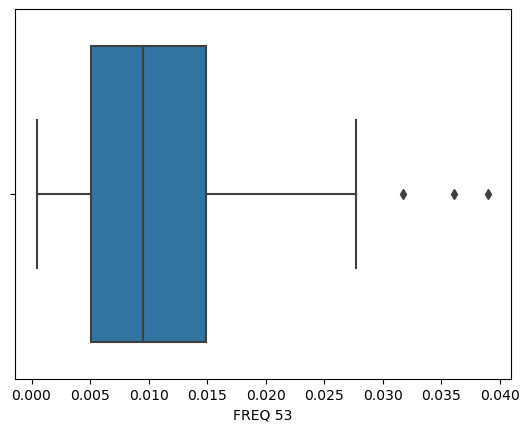

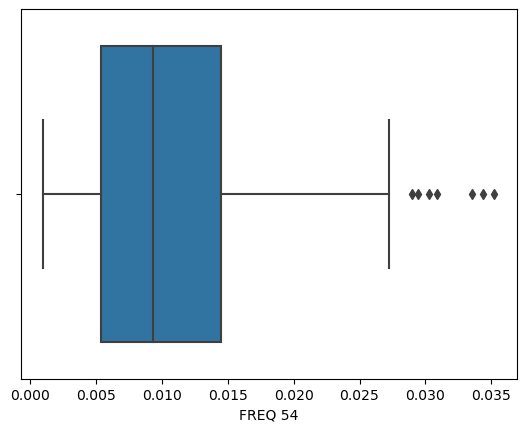

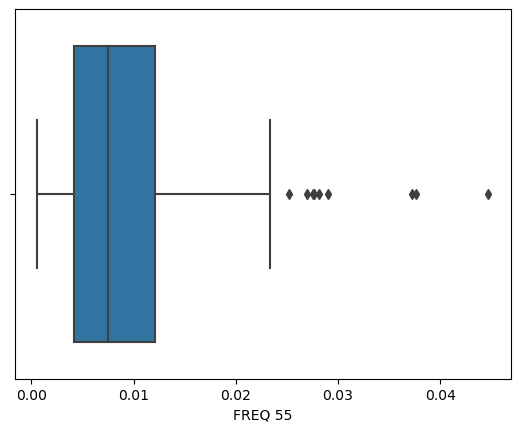

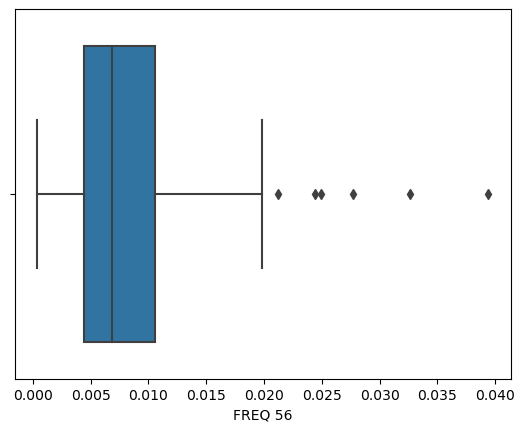

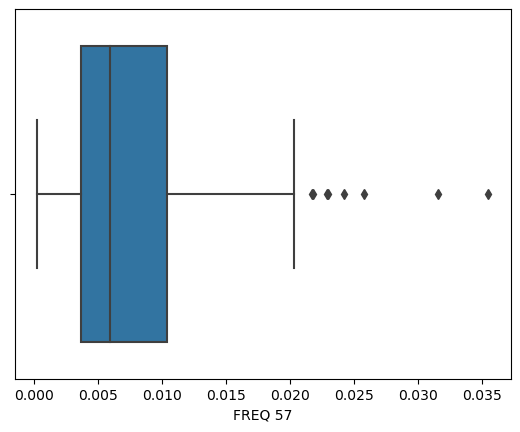

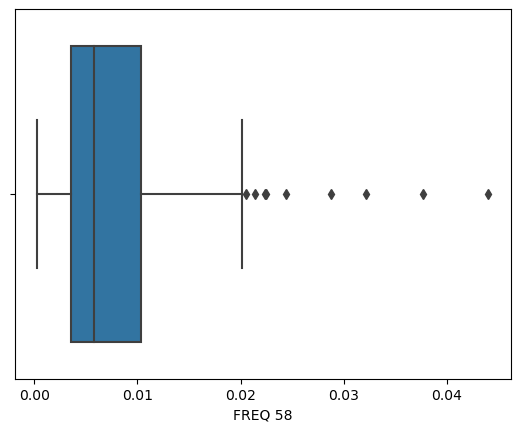

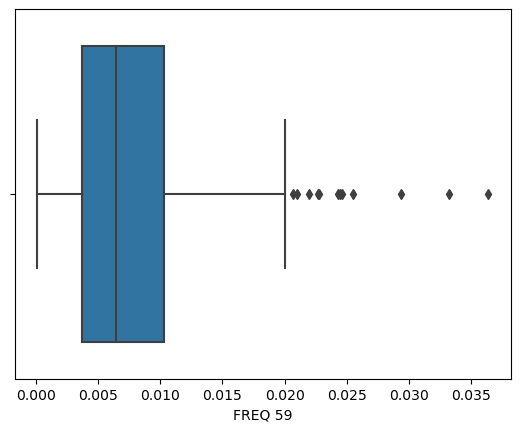

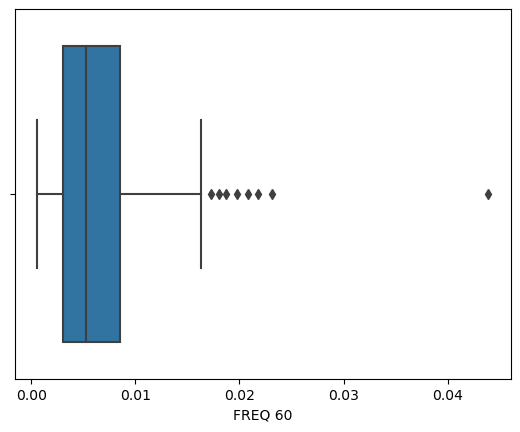

In [19]:
for i in df.columns:
    if df[i].dtypes !="object":
        sns.boxplot(x = df[i])
        plt.show()

In [20]:
def outlier_limit(col):
    Q3,Q1 = np.nanpercentile(col, [75,25])
    IQR = Q3-Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return UL,LL

In [21]:
for i in df.columns:
    if df[i].dtypes != "object":
        UL,LL = outlier_limit(df[i])
        df[i] = np.where((df[i]>UL)|(df[i]<LL), np.nan, df[i])

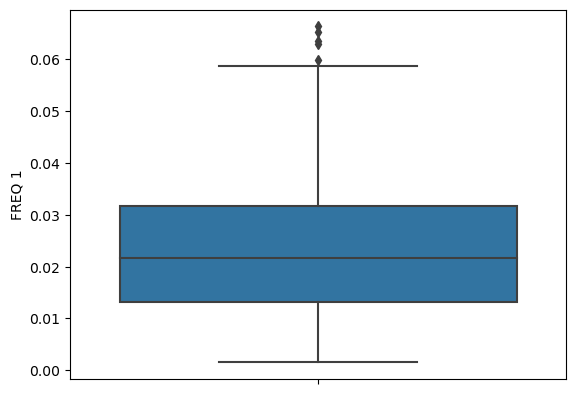

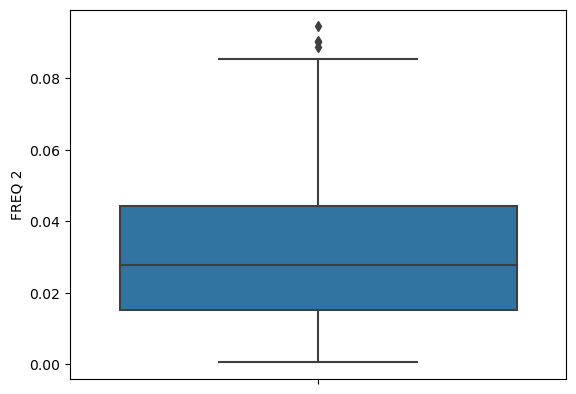

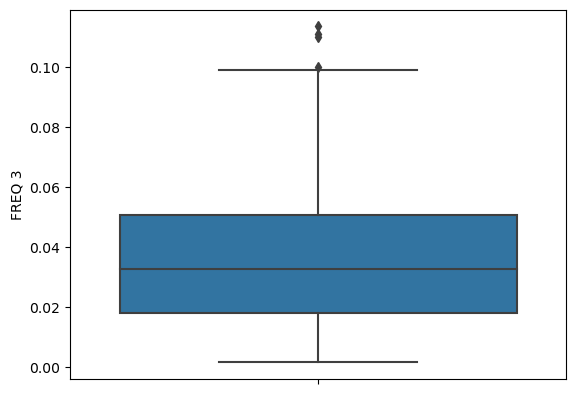

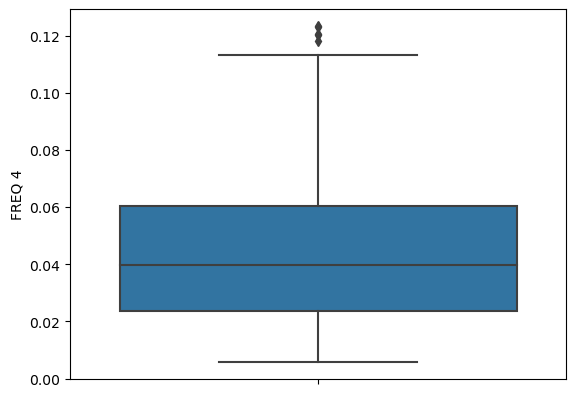

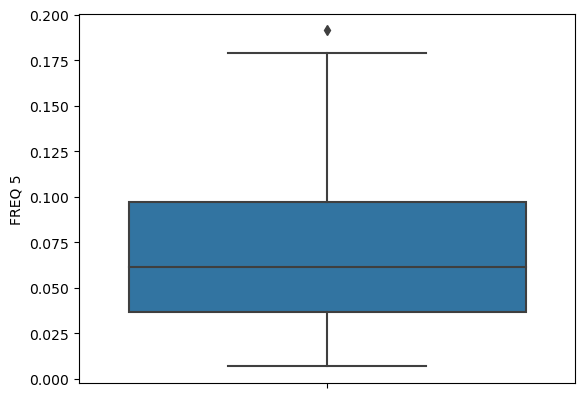

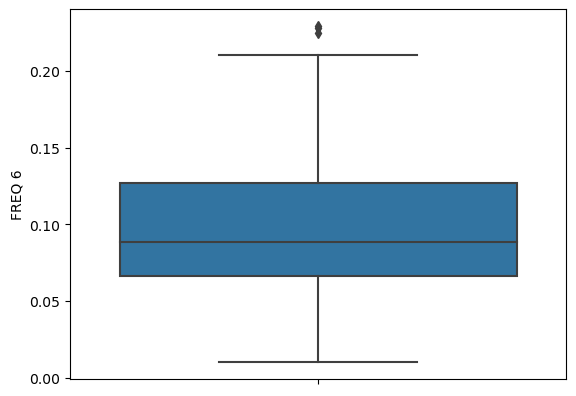

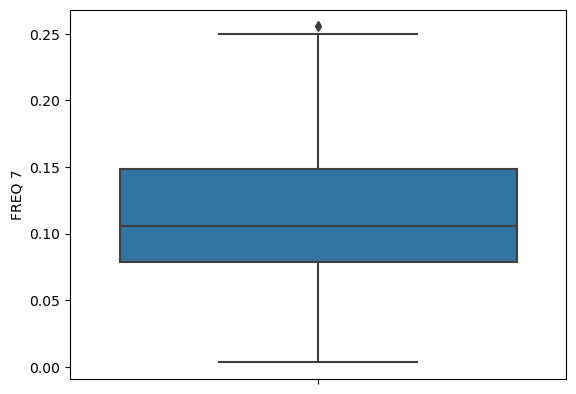

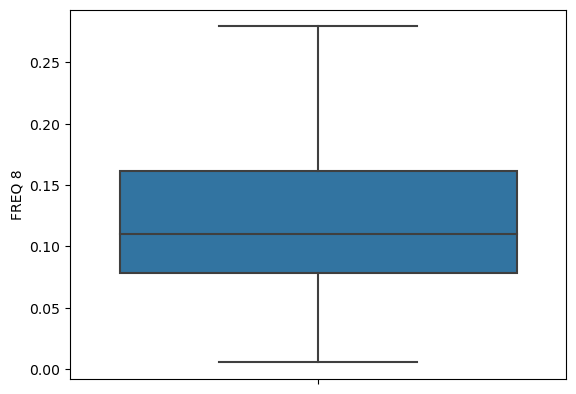

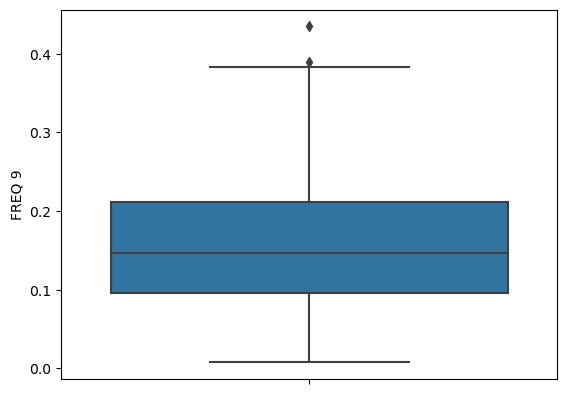

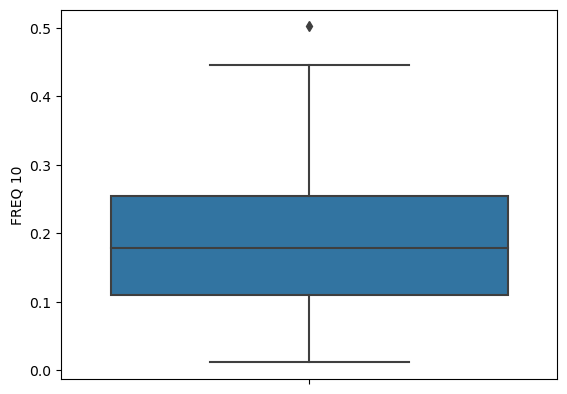

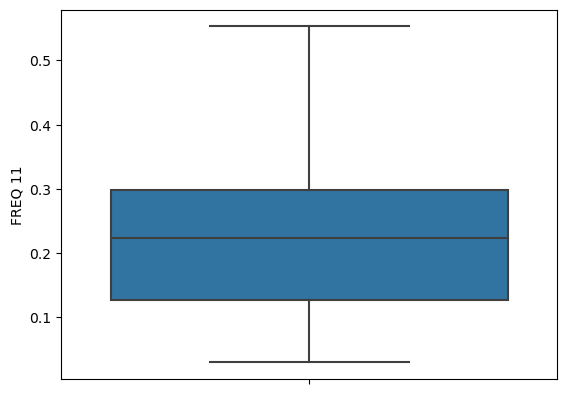

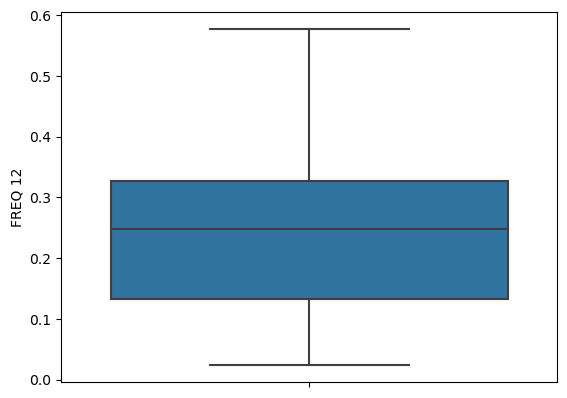

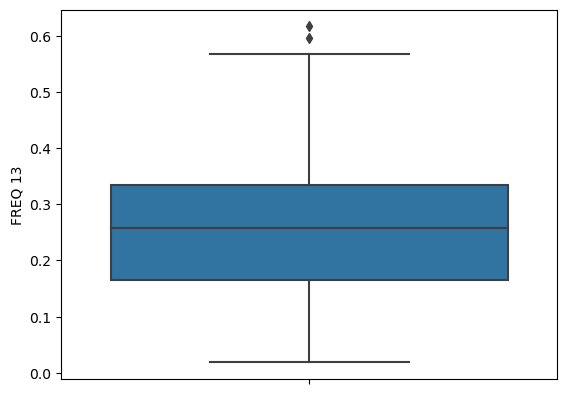

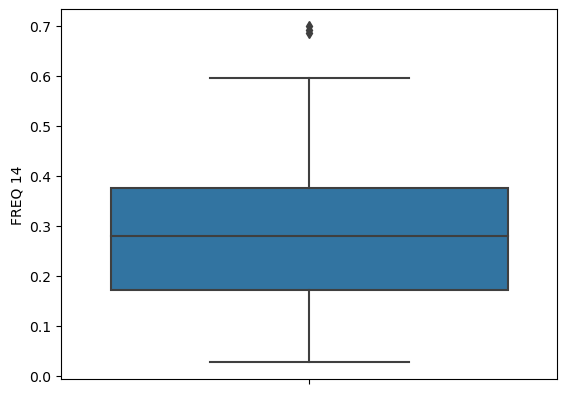

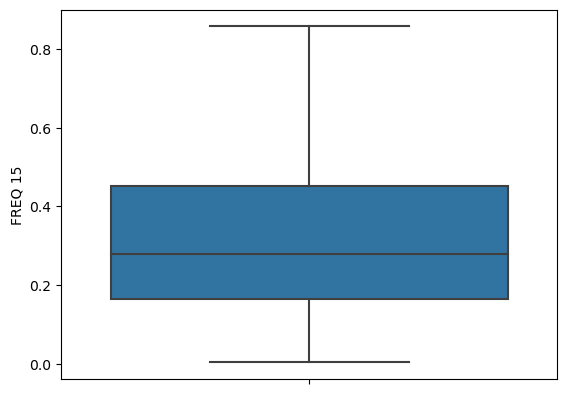

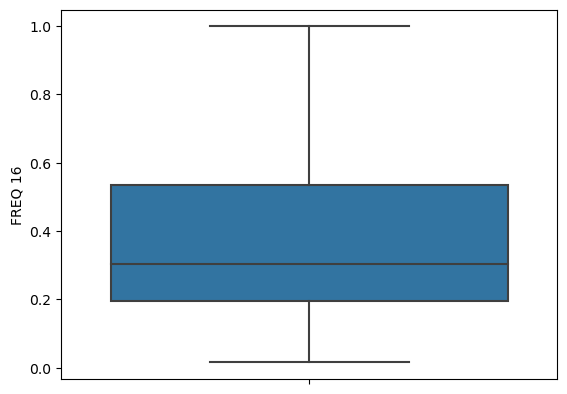

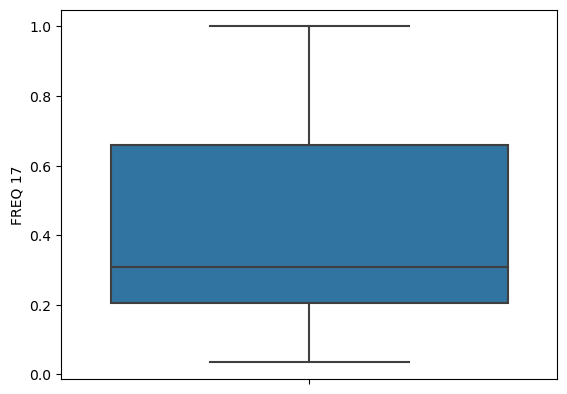

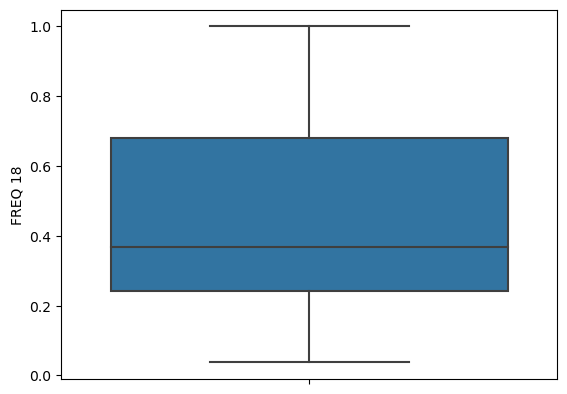

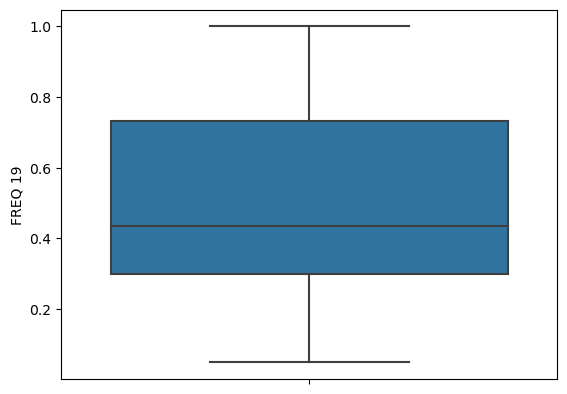

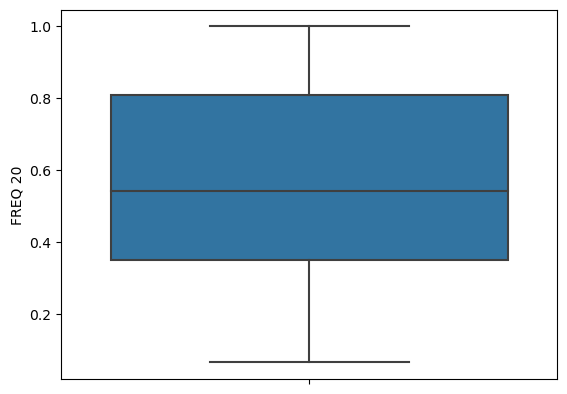

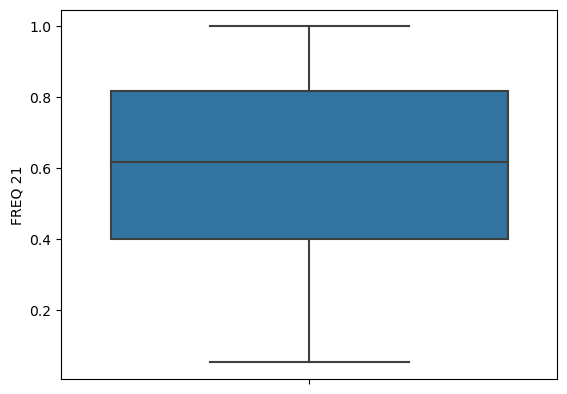

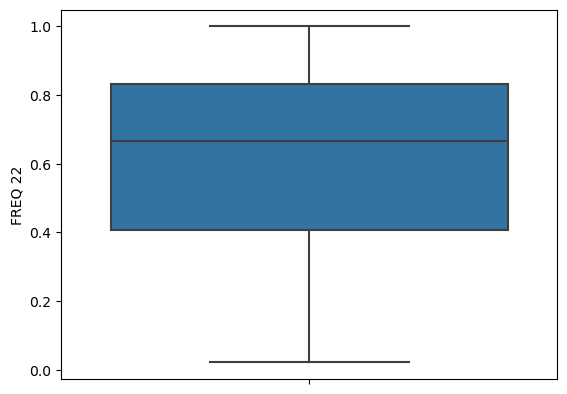

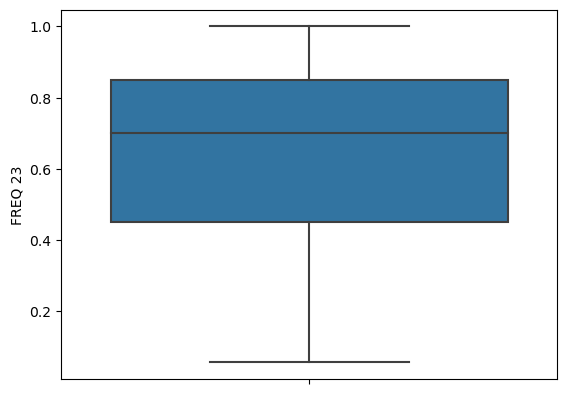

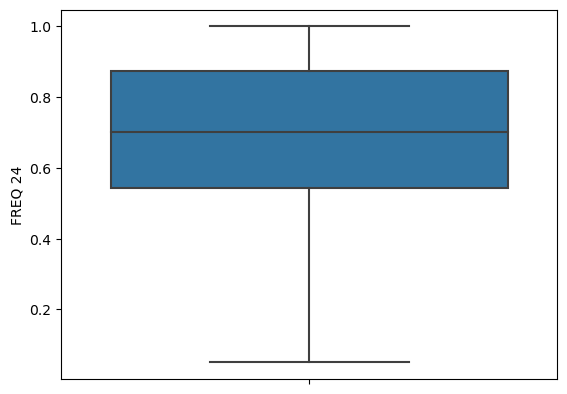

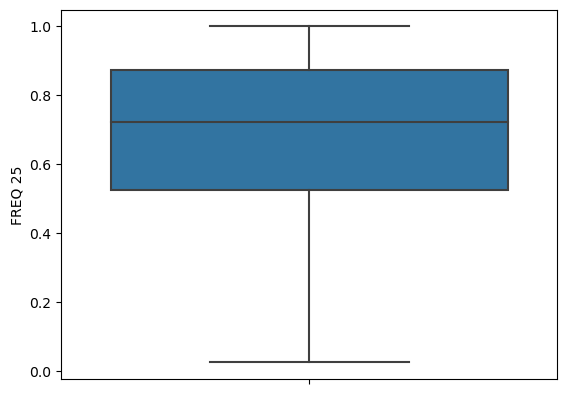

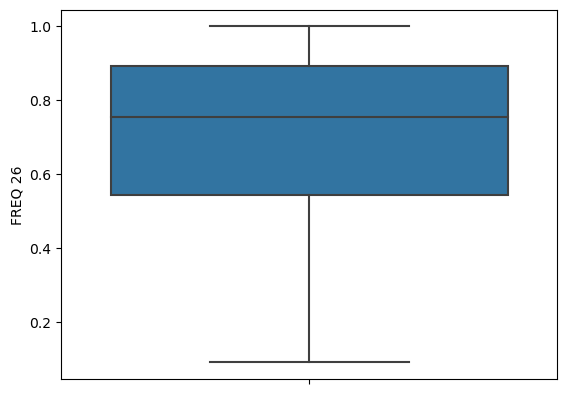

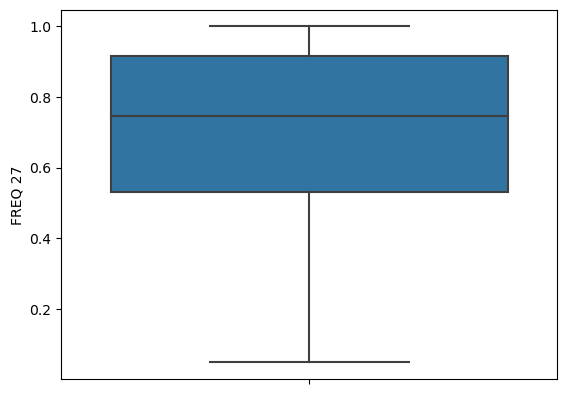

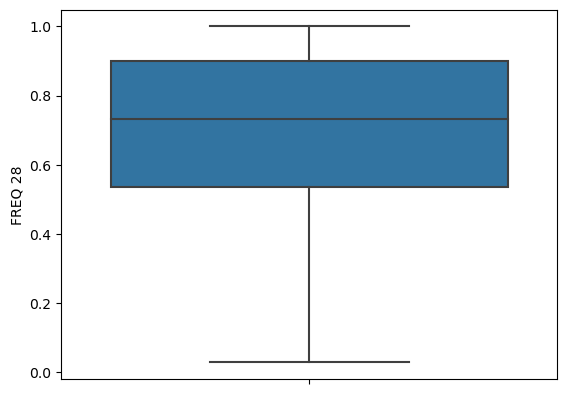

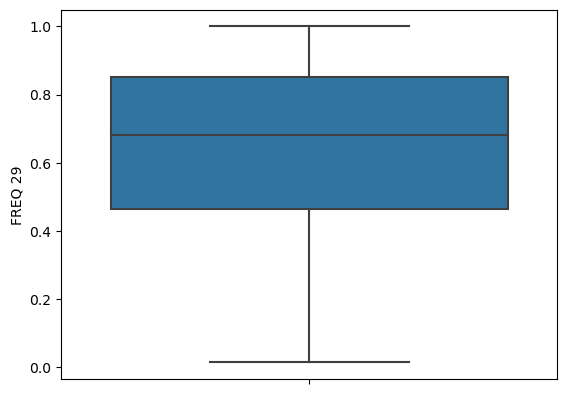

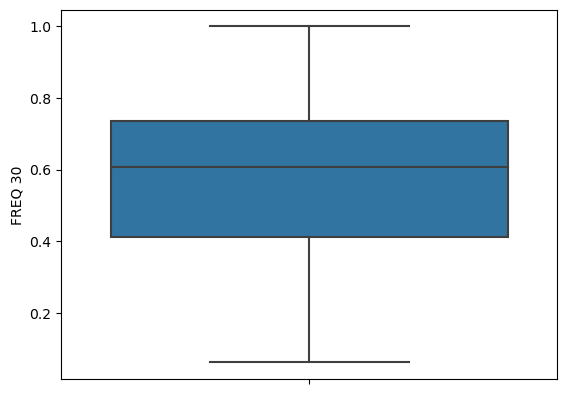

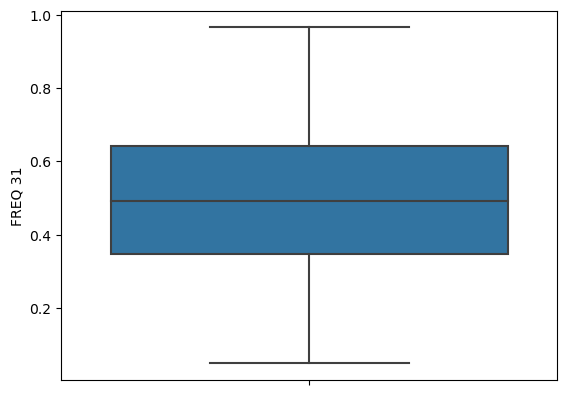

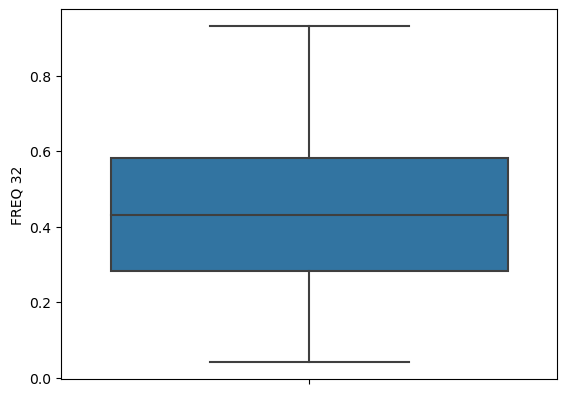

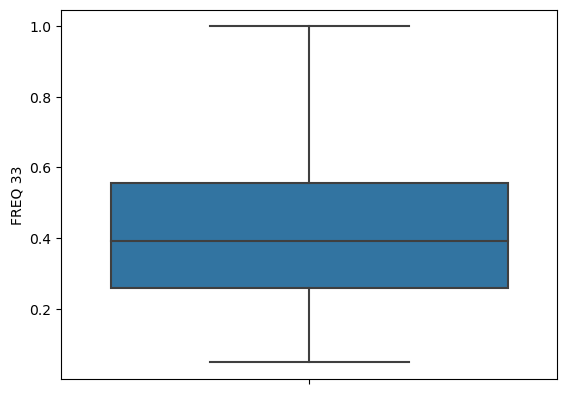

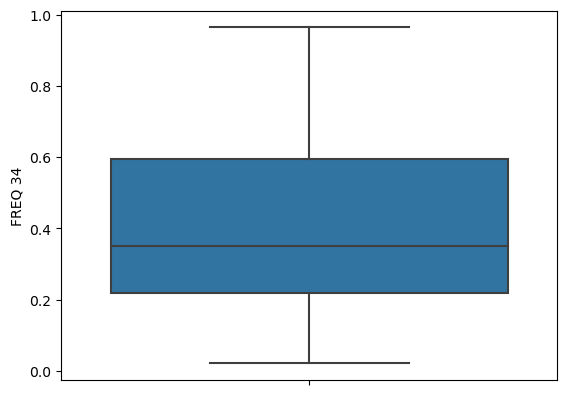

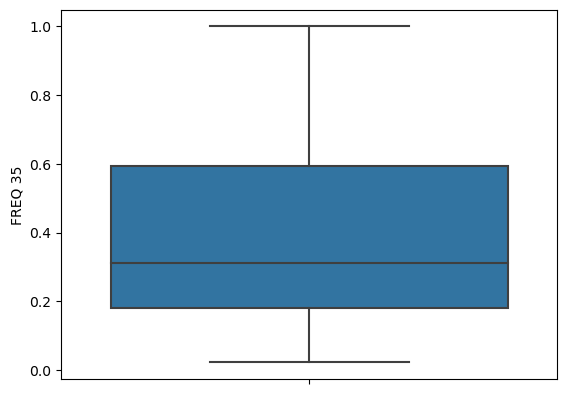

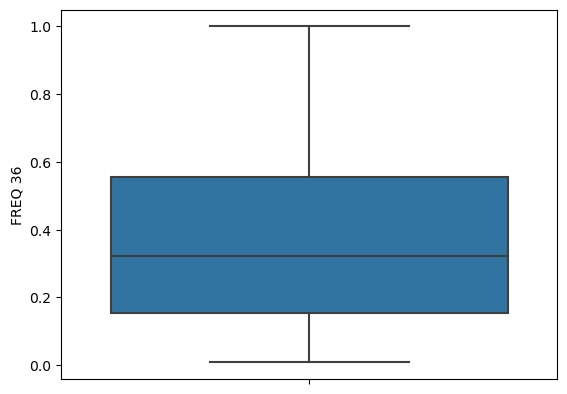

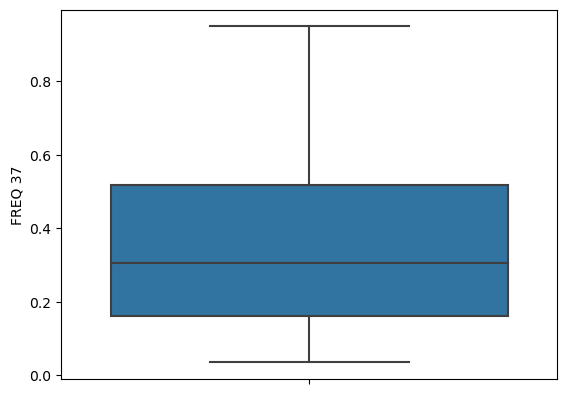

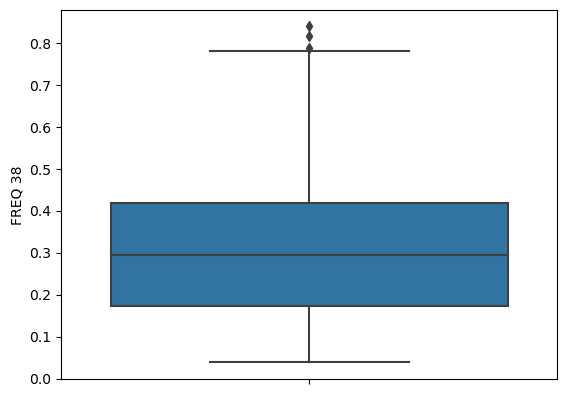

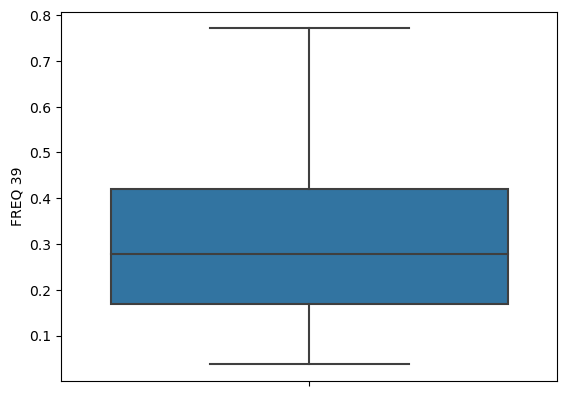

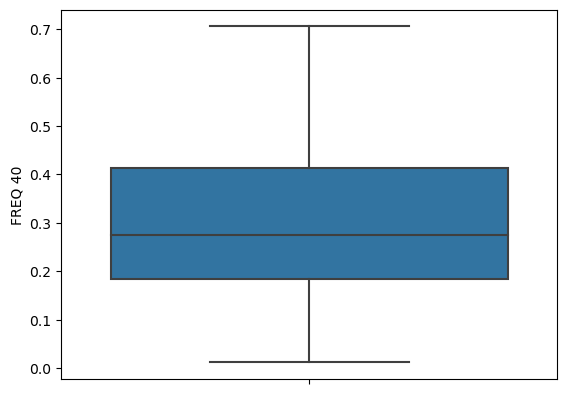

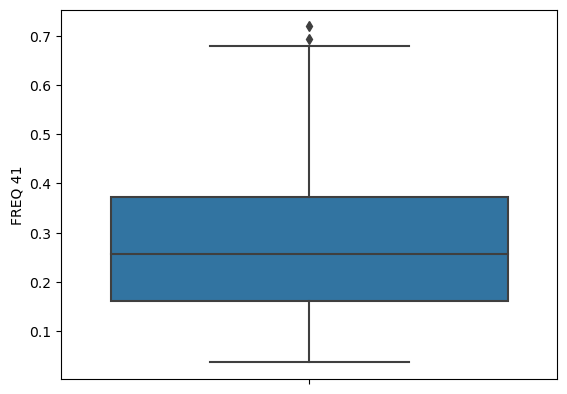

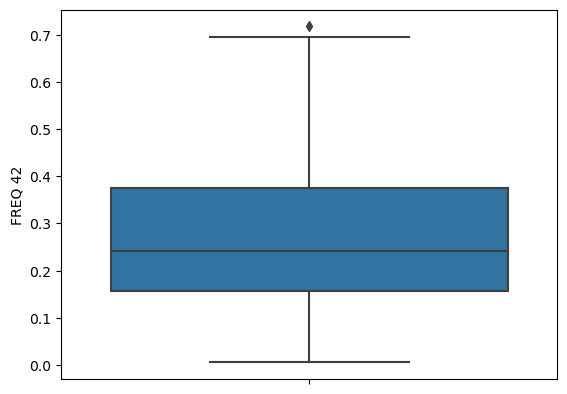

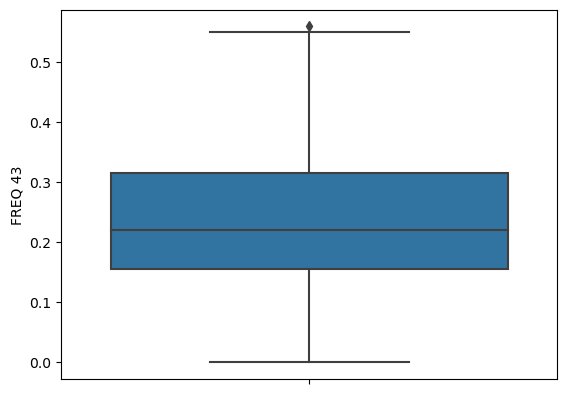

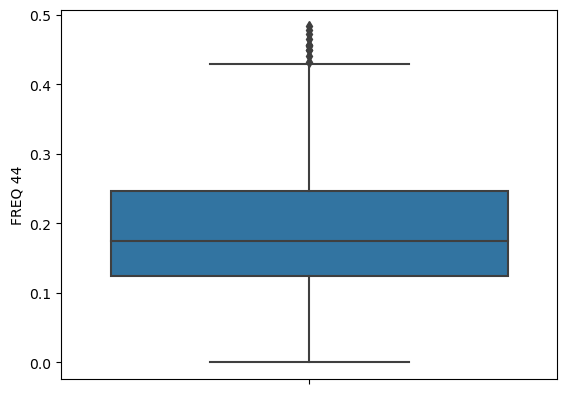

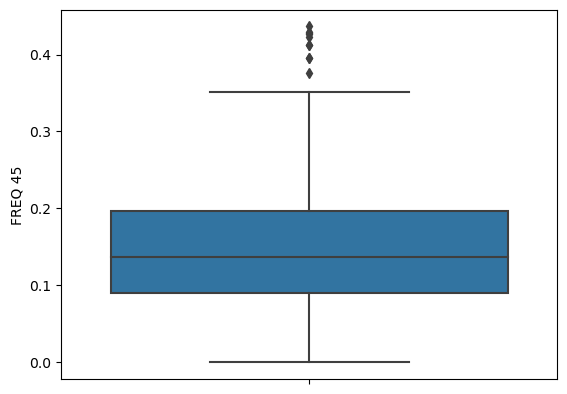

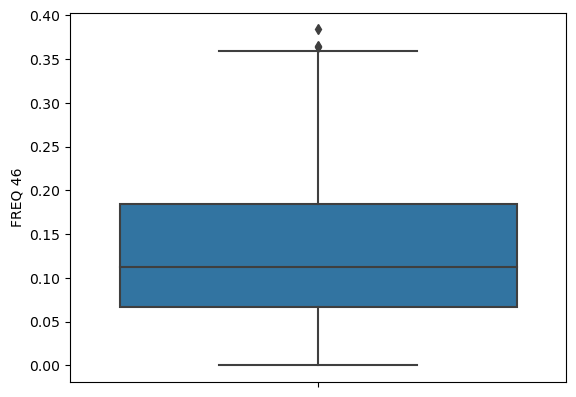

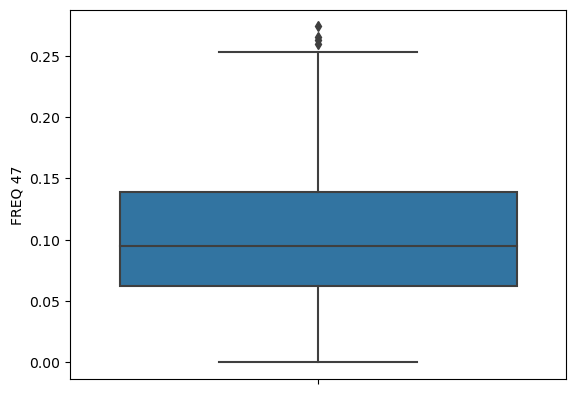

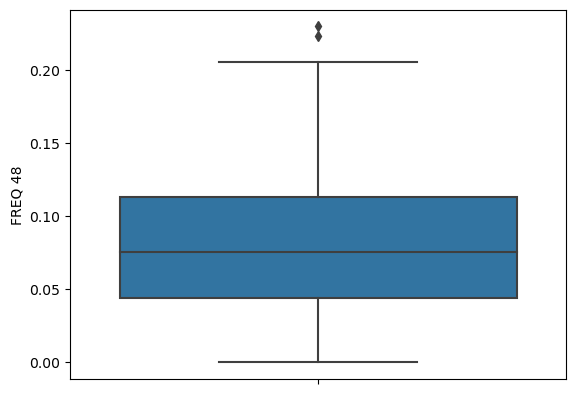

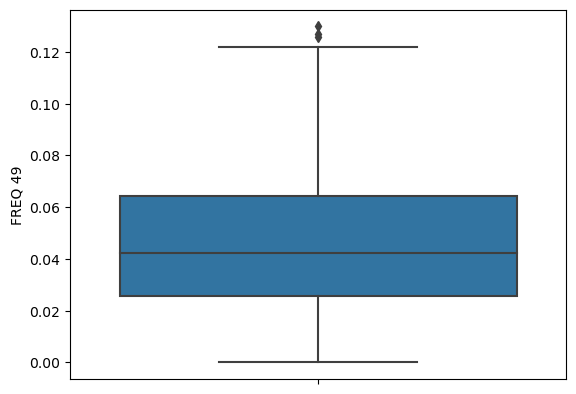

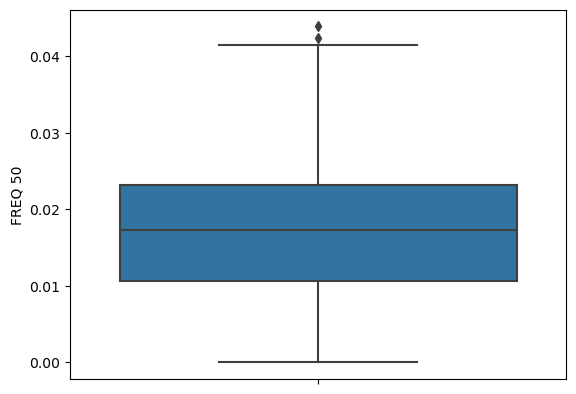

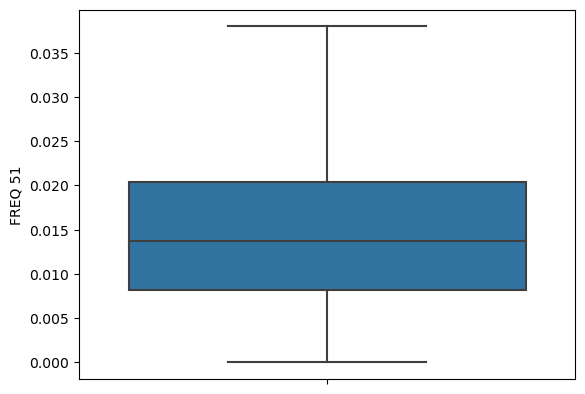

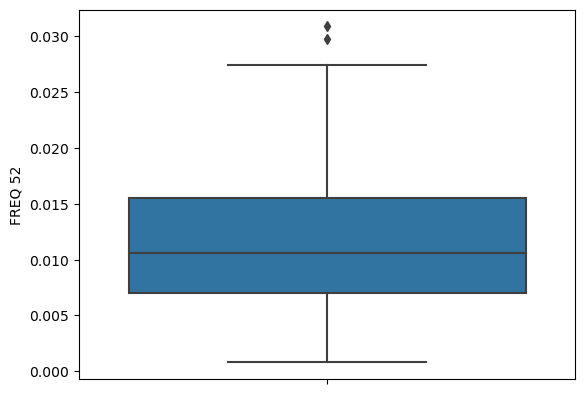

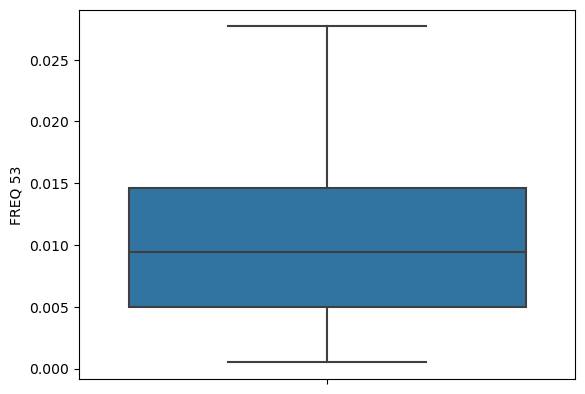

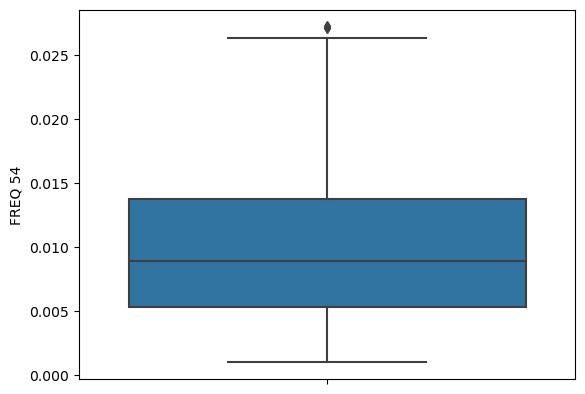

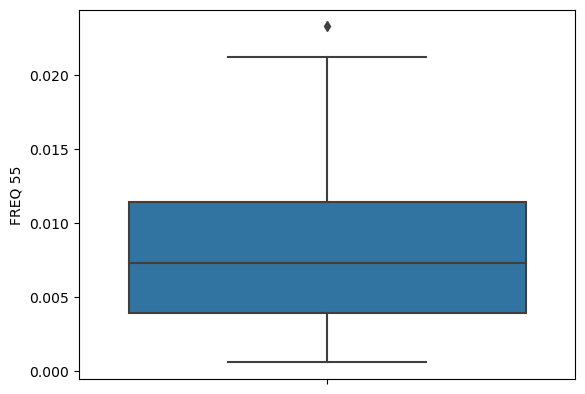

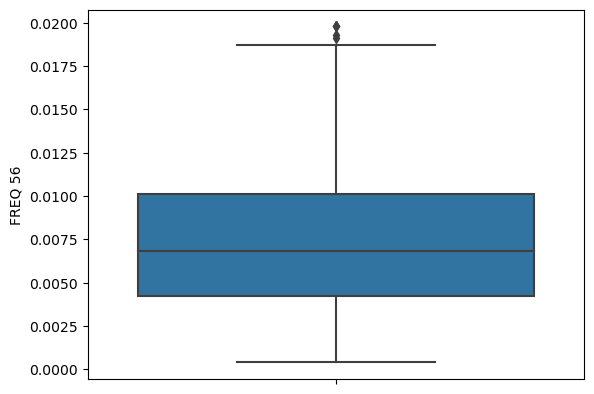

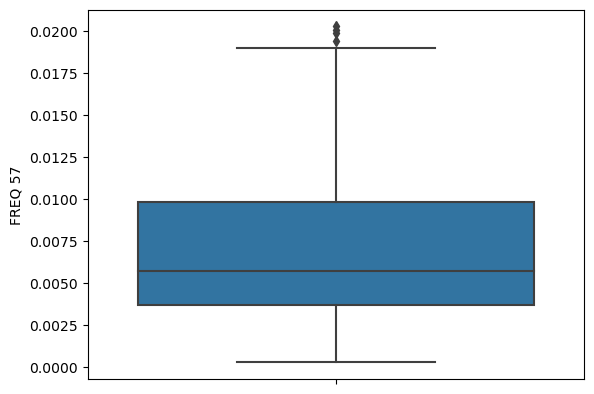

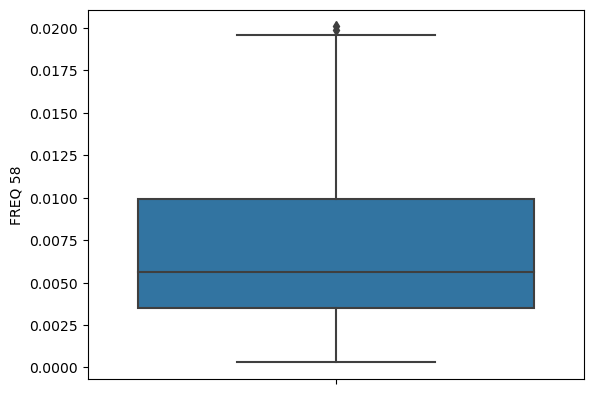

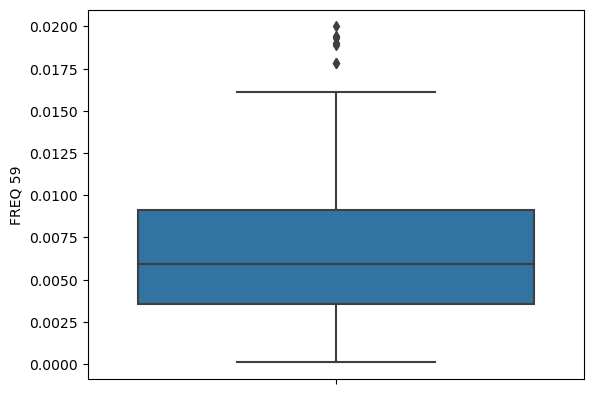

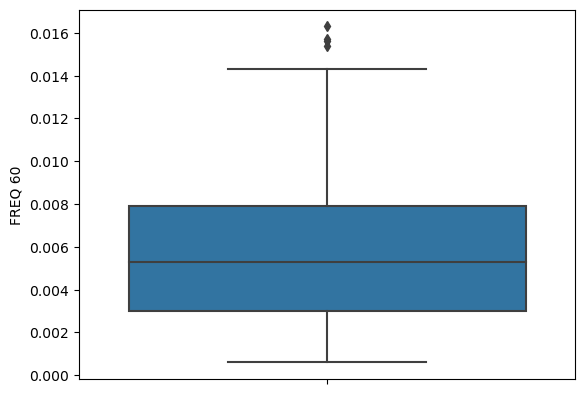

In [22]:
for i in df.columns:
    if df[i].dtypes != "object":
        sns.boxplot(y = df[i])
        plt.show();

In [23]:
for i in df.columns:
    if df[i].dtypes != "object":
        UL,LL = outlier_limit(df[i])
        df[i] = np.where((df[i]>UL)|(df[i]<LL),np.nan,df[i])

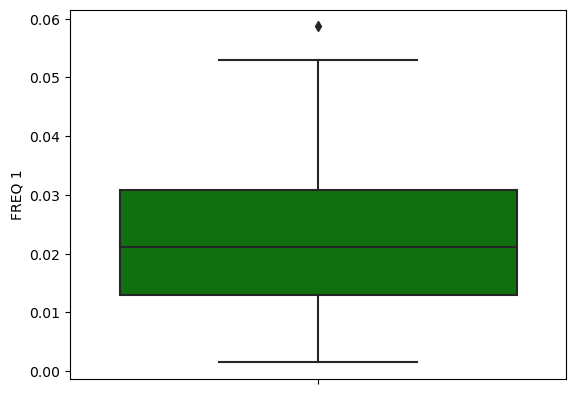

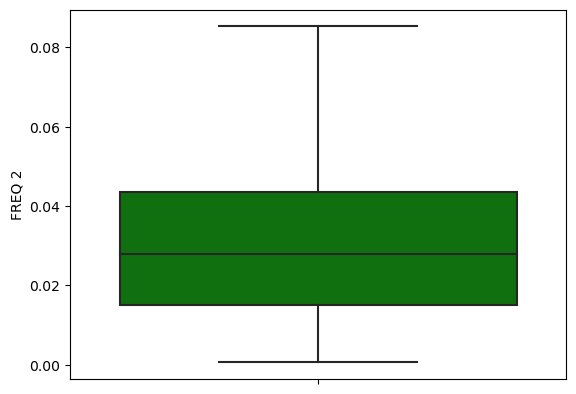

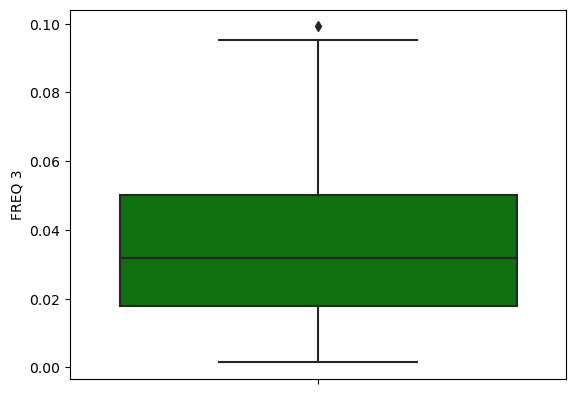

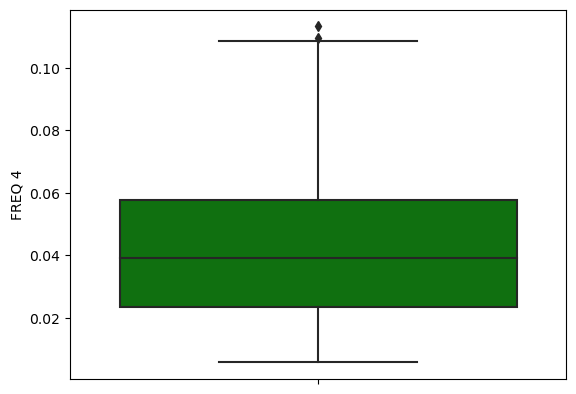

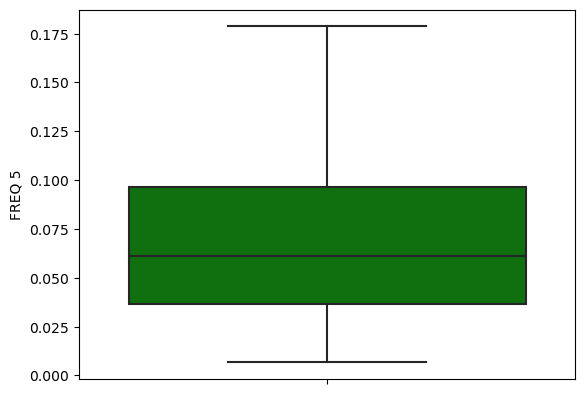

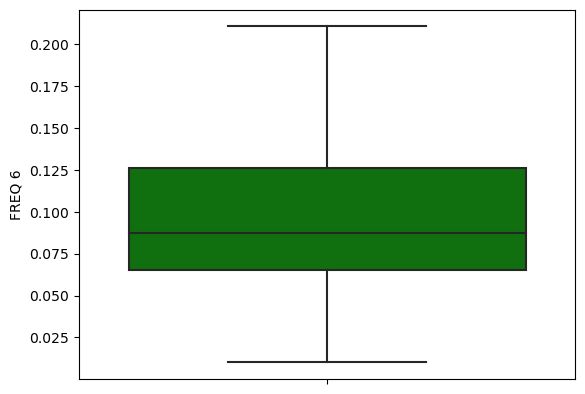

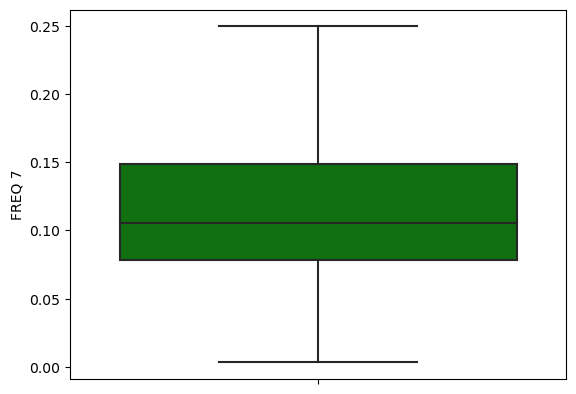

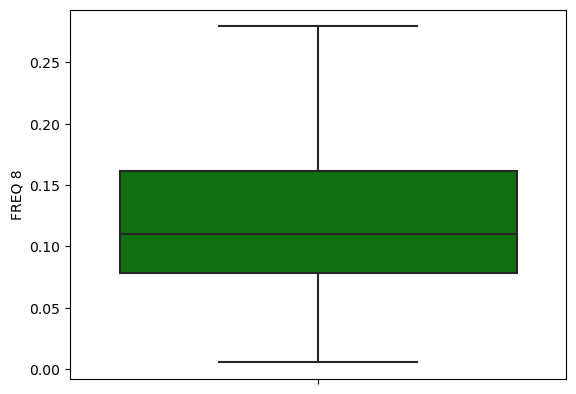

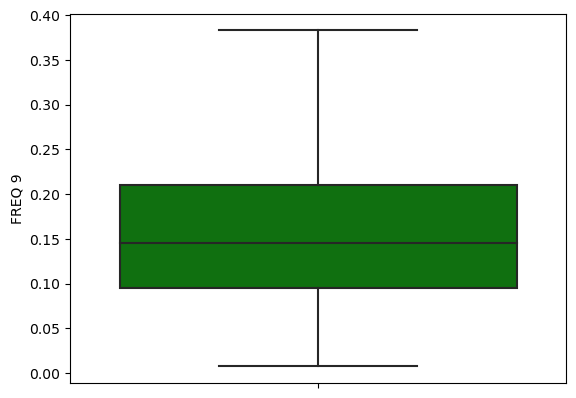

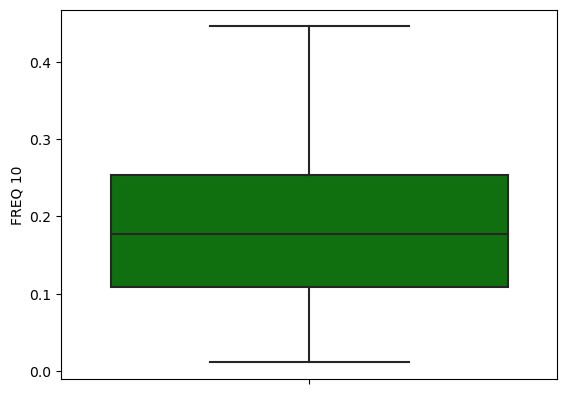

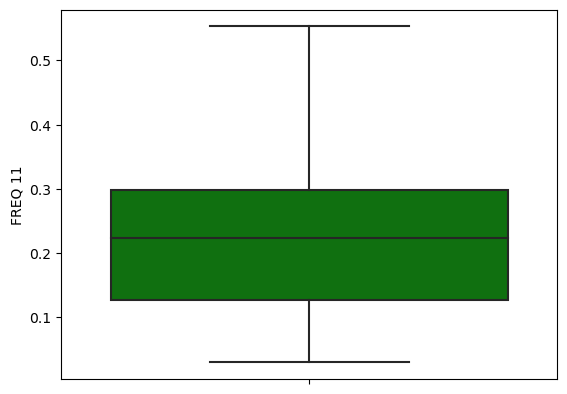

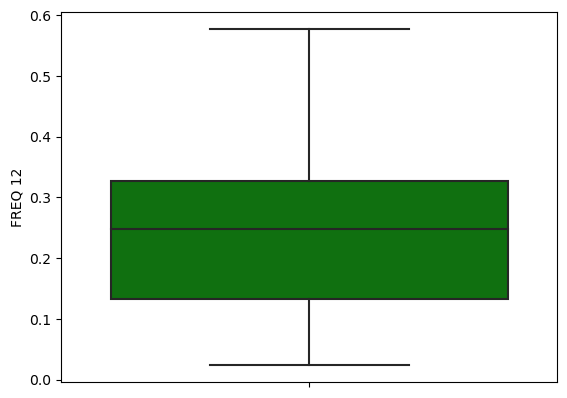

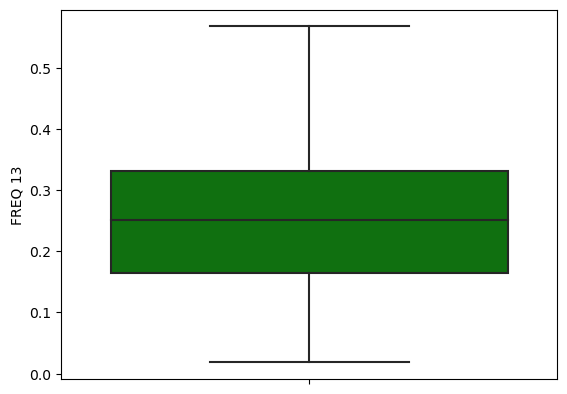

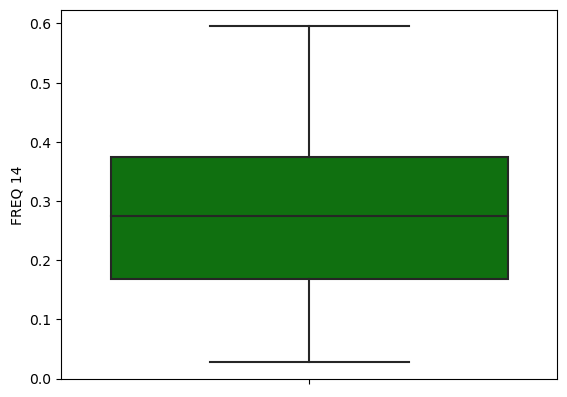

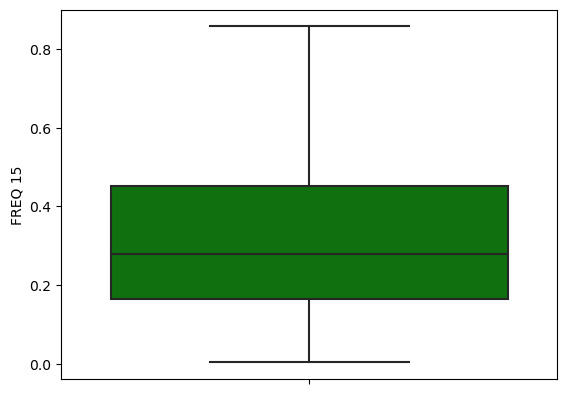

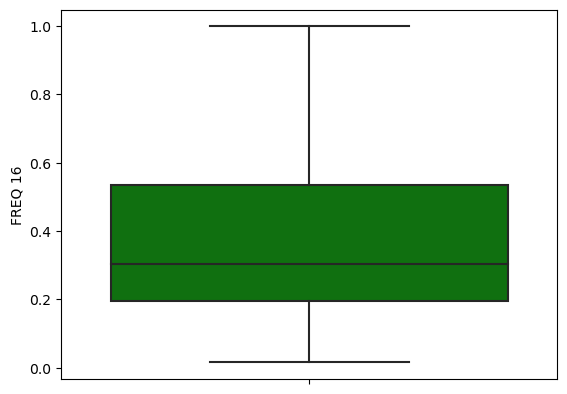

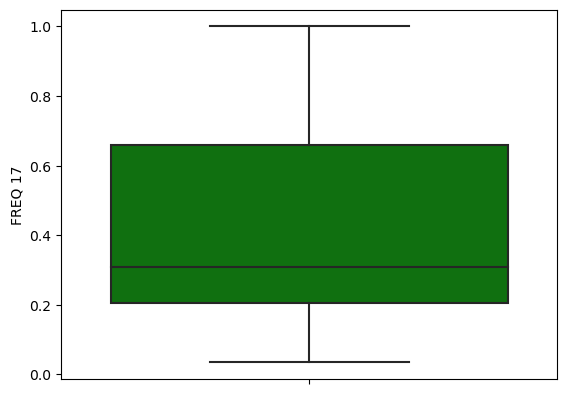

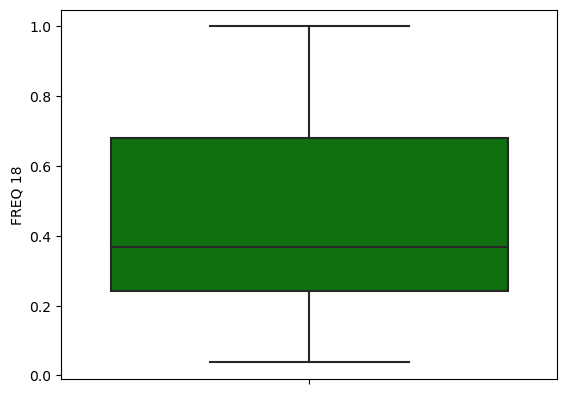

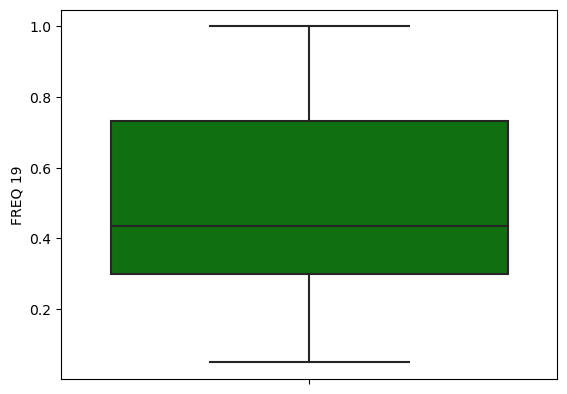

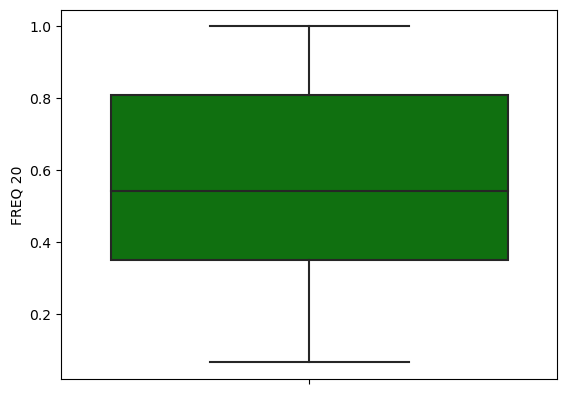

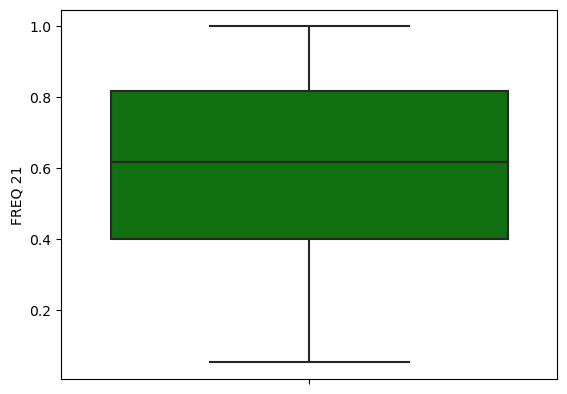

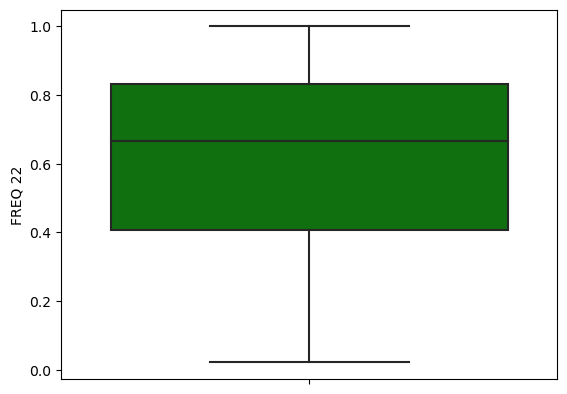

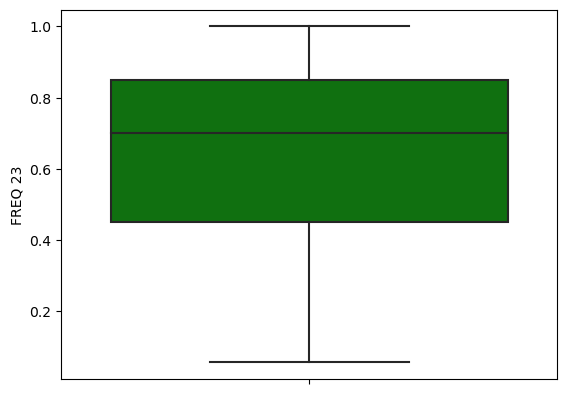

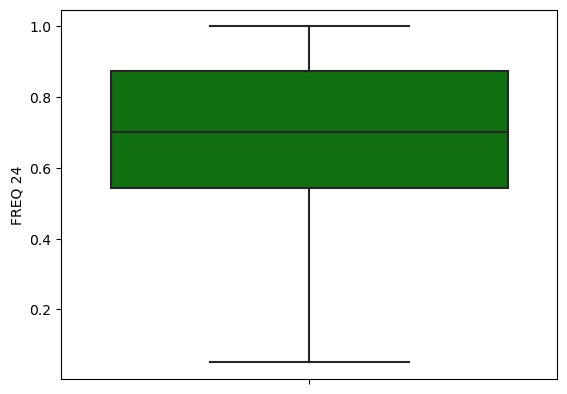

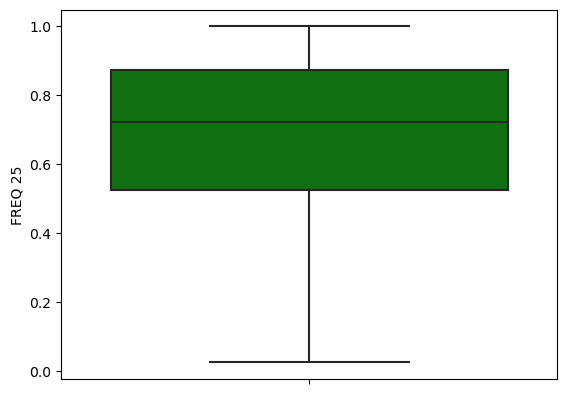

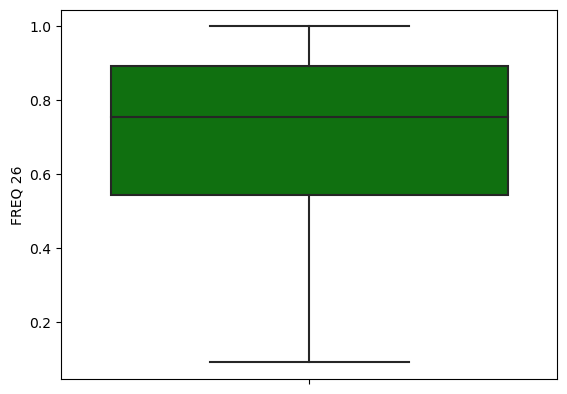

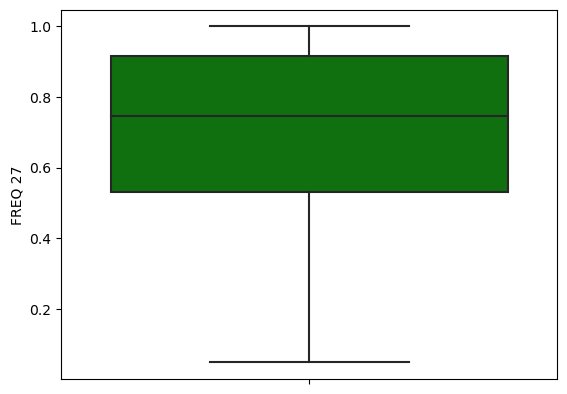

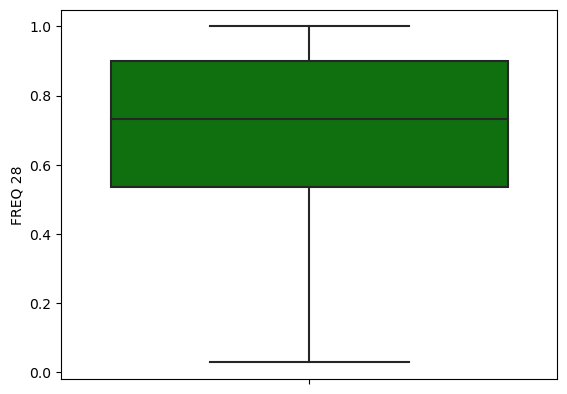

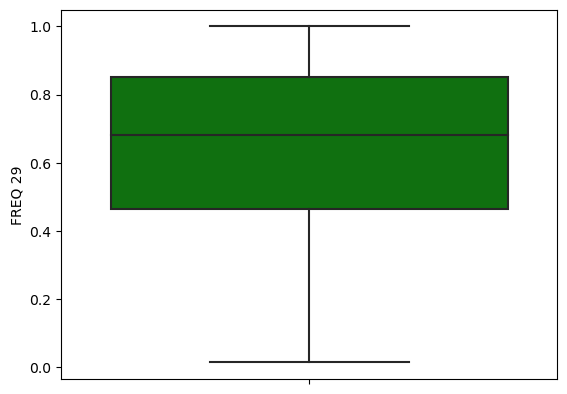

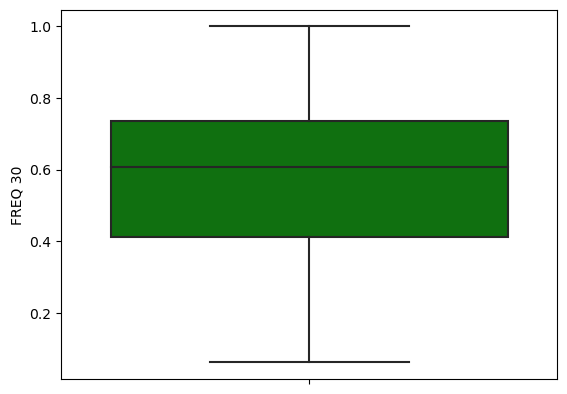

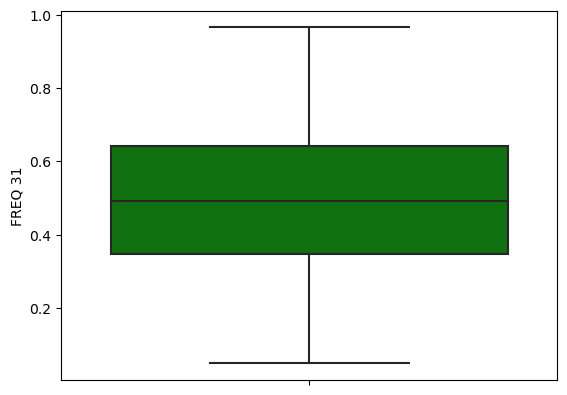

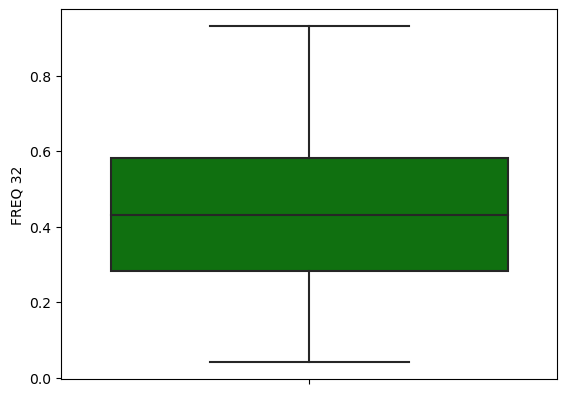

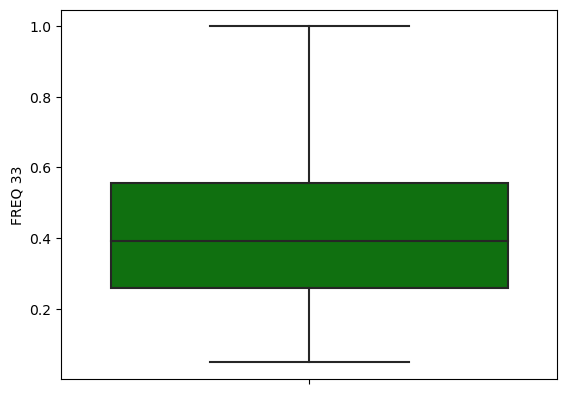

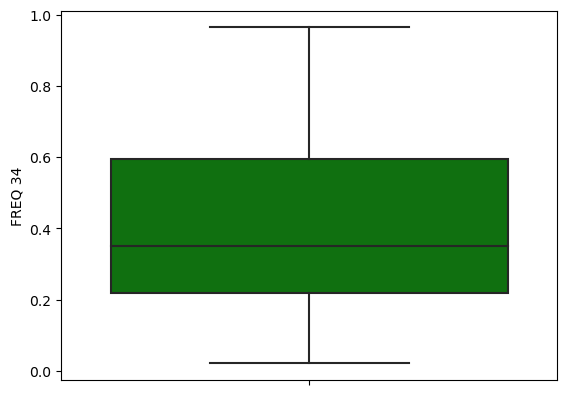

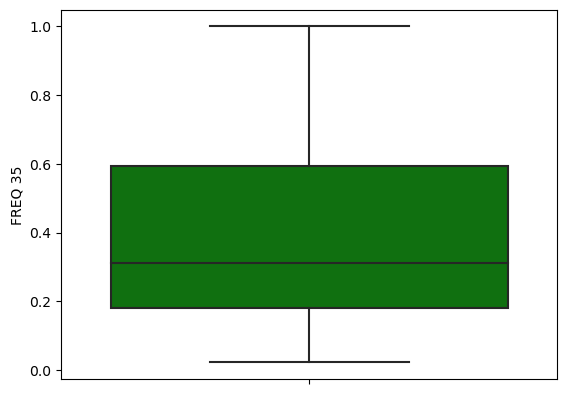

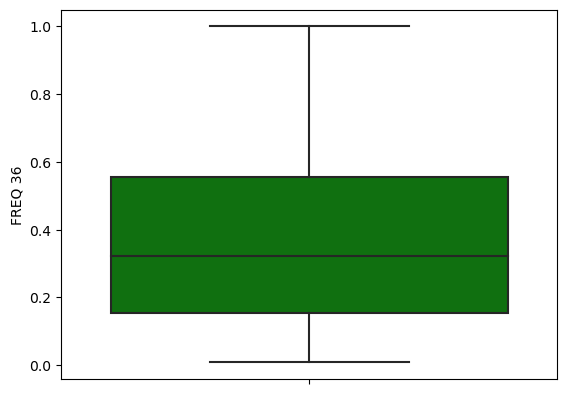

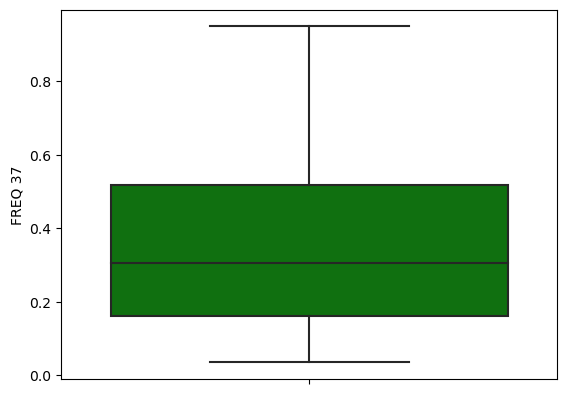

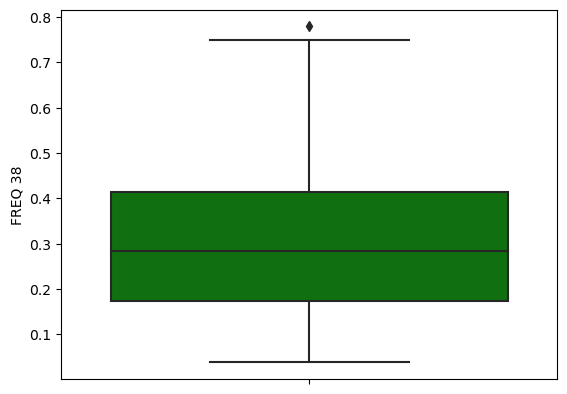

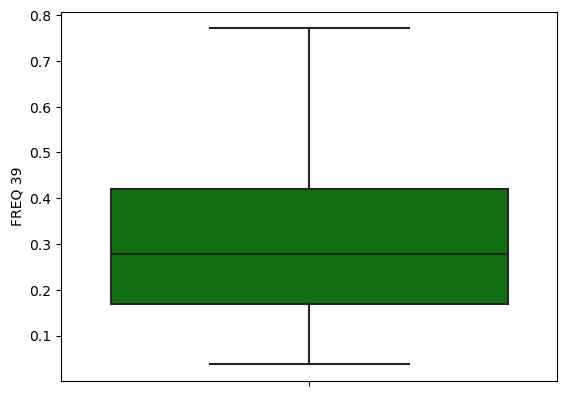

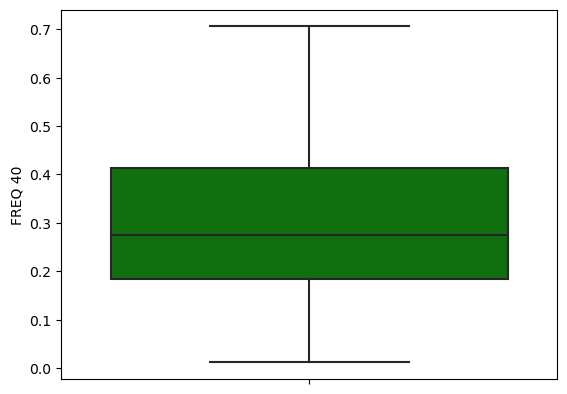

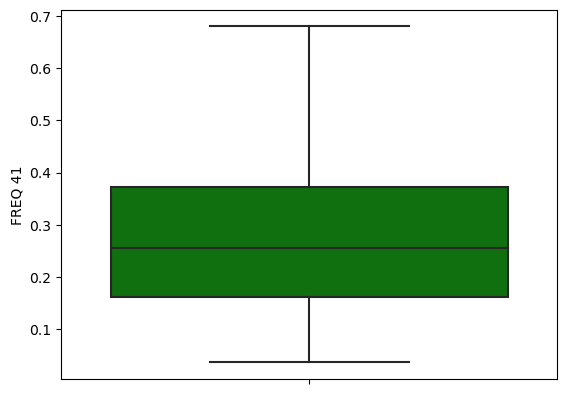

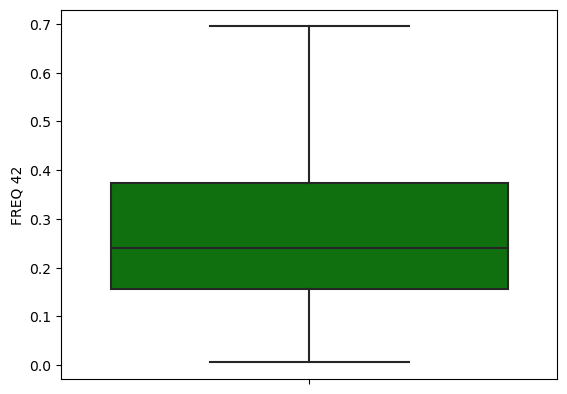

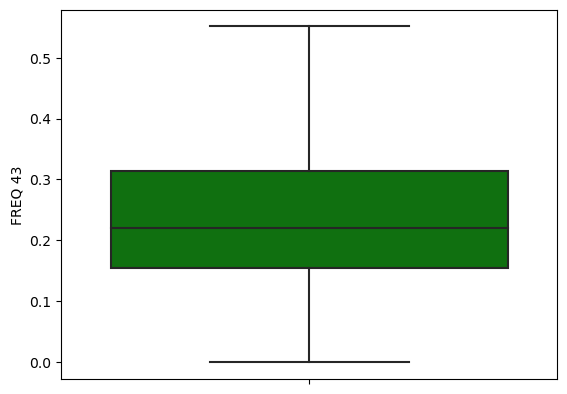

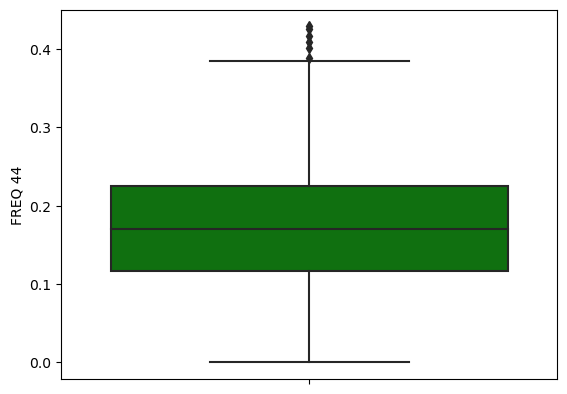

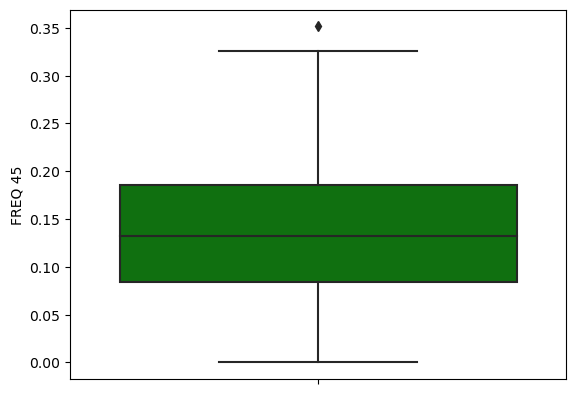

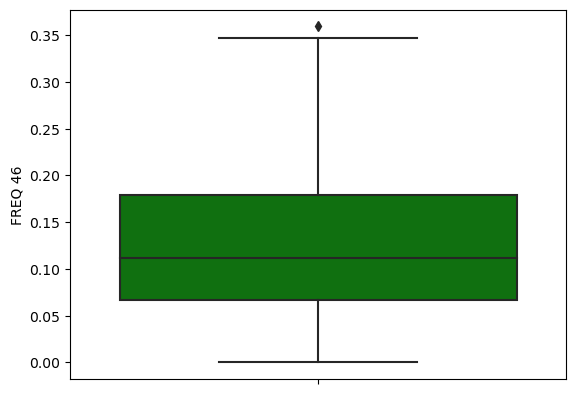

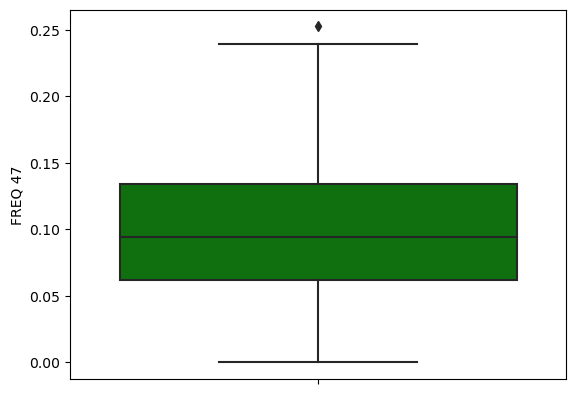

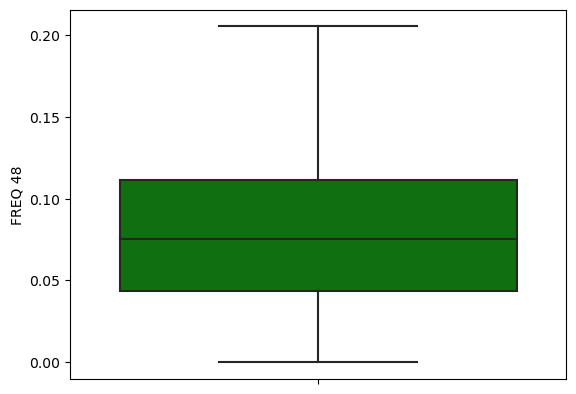

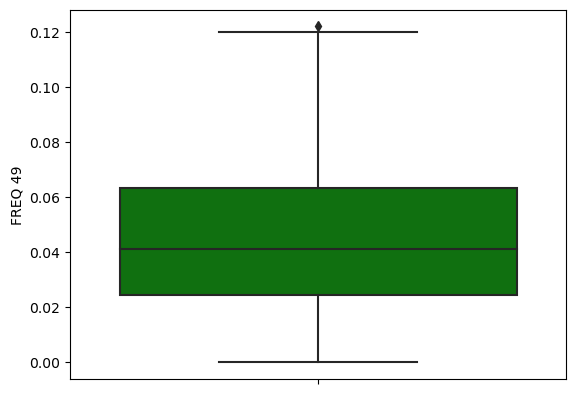

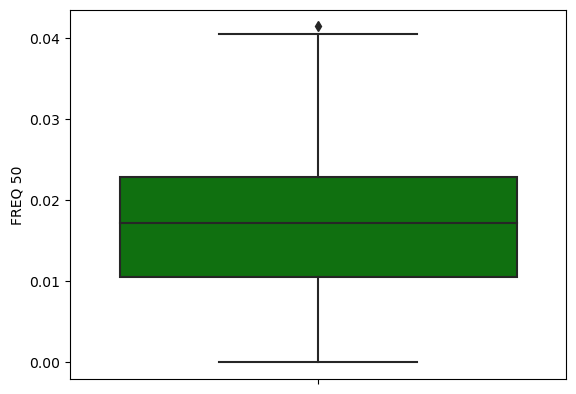

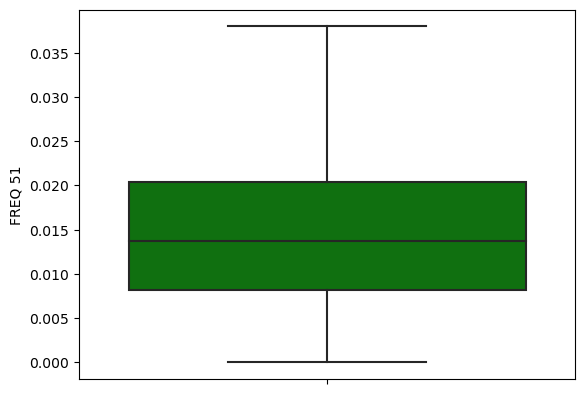

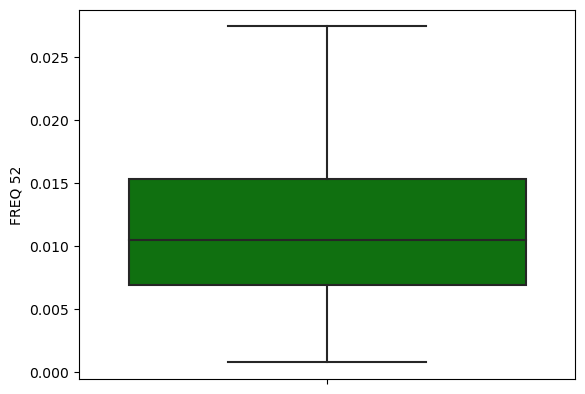

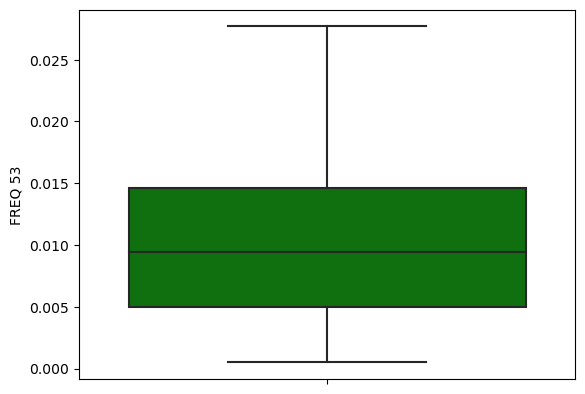

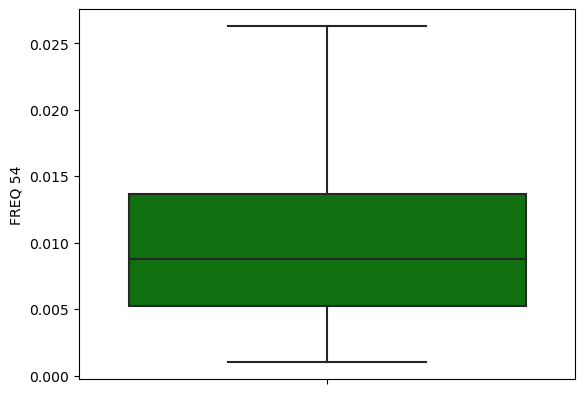

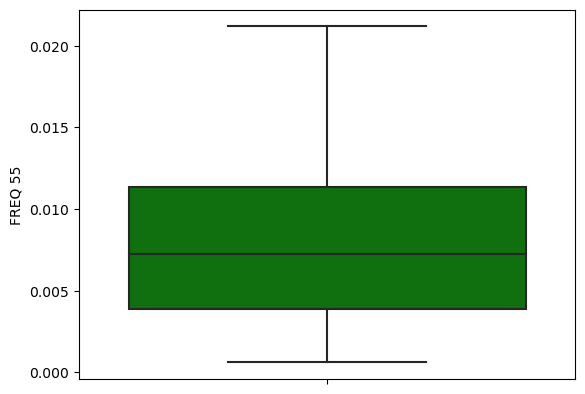

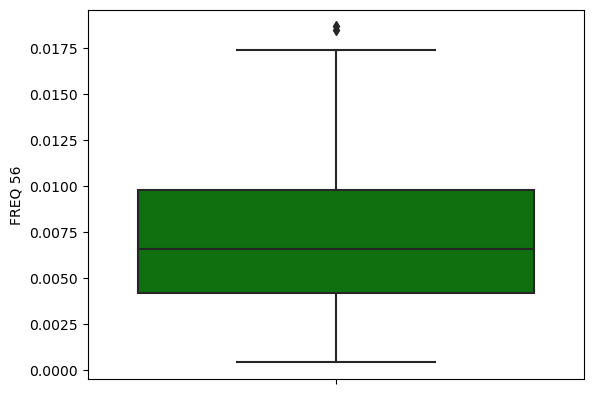

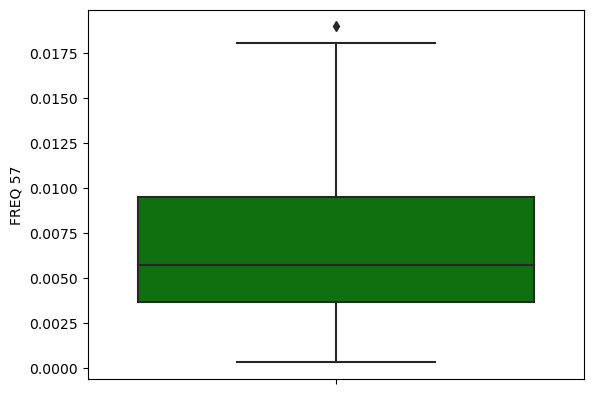

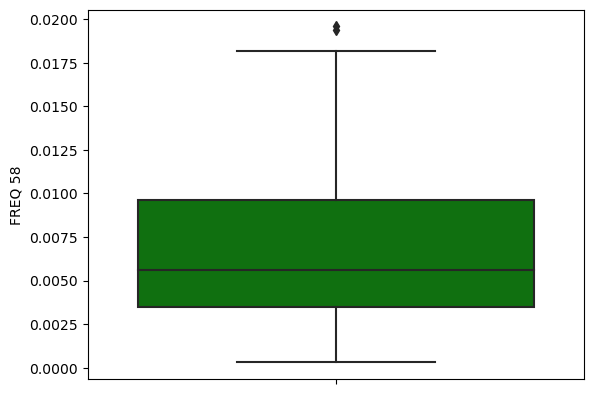

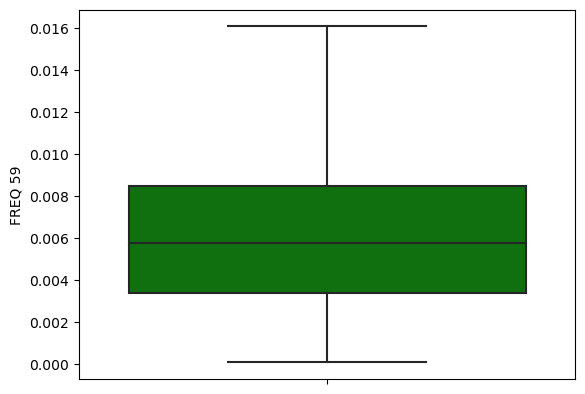

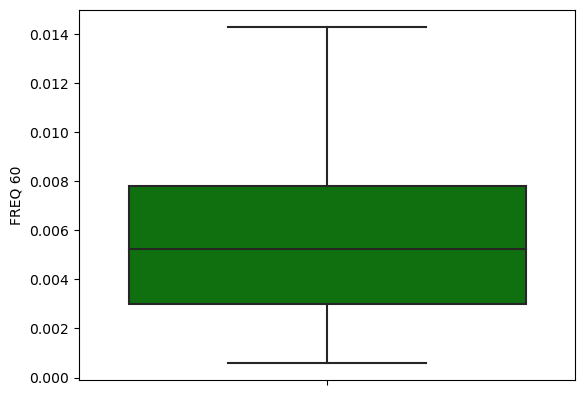

In [24]:
for i in df.columns:
    if df[i].dtypes != "object":
        sns.boxplot(y = df[i], color="green")
        plt.show()

In [25]:
df.isnull().sum()

FREQ 1     20
FREQ 2     17
FREQ 3     15
FREQ 4     18
FREQ 5      6
           ..
FREQ 57    12
FREQ 58    11
FREQ 59    19
FREQ 60    12
FREQ 61     0
Length: 61, dtype: int64

In [26]:
df.dropna(inplace=True)

In [27]:
df.isnull().sum()

FREQ 1     0
FREQ 2     0
FREQ 3     0
FREQ 4     0
FREQ 5     0
          ..
FREQ 57    0
FREQ 58    0
FREQ 59    0
FREQ 60    0
FREQ 61    0
Length: 61, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 207
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   FREQ 1   114 non-null    float64
 1   FREQ 2   114 non-null    float64
 2   FREQ 3   114 non-null    float64
 3   FREQ 4   114 non-null    float64
 4   FREQ 5   114 non-null    float64
 5   FREQ 6   114 non-null    float64
 6   FREQ 7   114 non-null    float64
 7   FREQ 8   114 non-null    float64
 8   FREQ 9   114 non-null    float64
 9   FREQ 10  114 non-null    float64
 10  FREQ 11  114 non-null    float64
 11  FREQ 12  114 non-null    float64
 12  FREQ 13  114 non-null    float64
 13  FREQ 14  114 non-null    float64
 14  FREQ 15  114 non-null    float64
 15  FREQ 16  114 non-null    float64
 16  FREQ 17  114 non-null    float64
 17  FREQ 18  114 non-null    float64
 18  FREQ 19  114 non-null    float64
 19  FREQ 20  114 non-null    float64
 20  FREQ 21  114 non-null    float64
 21  FREQ 22  114 non

In [29]:
le=LabelEncoder()

In [30]:
df['FREQ 61'] = le.fit_transform(df['FREQ 61'])

In [31]:
df

FREQ 1  FREQ 2  FREQ 3  FREQ 4  FREQ 5  FREQ 6  FREQ 7  FREQ 8  FREQ 9  \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
7    0.0519  0.0548  0.0842  0.0319  0.1158  0.0922  0.1027  0.0613  0.1465   
9    0.0164  0.0173  0.0347  0.0070  0.0187  0.0671  0.1056  0.0697  0.0962   
10   0.0039  0.0063  0.0152  0.0336  0.0310  0.0284  0.0396  0.0272  0.0323   
11   0.0123  0.0309  0.0169  0.0313  0.0358  0.0102  0.0182  0.0579  0.1122   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
202  0.0272  0.0378  0.0488  0.0848  0.1127  0.1103  0.1349  0.2337  0.3113   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

     FREQ 10  ...  FREQ 52  FREQ 53  FREQ 54  FREQ 55  FREQ 56  FREQ 57  \
0     0.2111  ...   0.0027   0.0065   0.0159   0.0072   0.0167   0.0180   
7     0.2838  ...   0.0081   0.0120   0.0045   0.0121   0.0097   0.0085   
9     0.0251  ...   0.0090   0.0223   0.0179   0.0084   0.0068   0.0032   
10    0.0452  ...   0.0062   0.0120   0.0052   0.0056   0.0093   0.0042   
11    0.0835  ...   0.0133   0.0265   0.0224   0.0074   0.0118   0.0026   
..       ...  ...      ...      ...      ...      ...      ...      ...   
202   0.3997  ...   0.0091   0.0045   0.0043   0.0043   0.0098   0.0054   
204   0.2154  ...   0.0061   0.0093   0.0135   0.0063   0.0063   0.0034   
205   0.2529  ...   0.0160   0.0029   0.0051   0.0062   0.0089   0.0140   
206   0.2354  ...   0.0086   0.0046   0.0126   0.0036   0.0035   0.0034   
207   0.2354  ...   0.0146   0.0129   0.0047   0.0039   0.0061   0.0040   

     FREQ 58  FREQ 59  FREQ 60  FREQ 61  
0     0.0084   0.0090   0.0032        1  
7     0.0047   0.0048   0.0053        1  
9     0.0035   0.0056   0.0040        1  
10    0.0003   0.0053   0.0036        1  
11    0.0092   0.0009   0.0044        1  
..       ...      ...      ...      ...  
202   0.0051   0.0065   0.0103        0  
204   0.0032   0.0062   0.0067        0  
205   0.0138   0.0077   0.0031        0  
206   0.0079   0.0036   0.0048        0  
207   0.0036   0.0061   0.0115        0  

[114 rows x 61 columns]

# Correlation heatmap

In [32]:

df.corr().style.background_gradient(cmap = 'rocket_r')

In [33]:
df.describe().T.style.background_gradient(cmap = 'rocket_r')

# Barchart by rock and mine

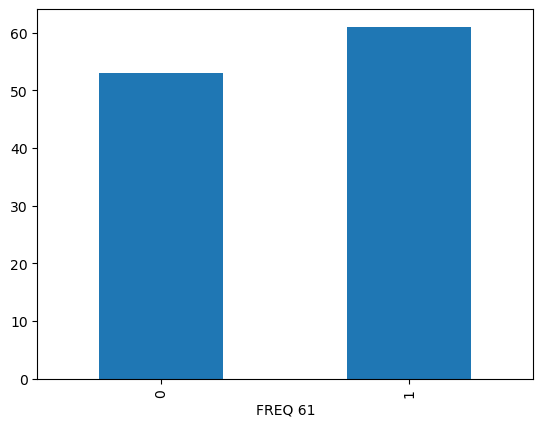

In [34]:
df.groupby("FREQ 61")["FREQ 61"].count().plot.bar();

In [35]:
df.columns

Index(['FREQ 1', 'FREQ 2', 'FREQ 3', 'FREQ 4', 'FREQ 5', 'FREQ 6', 'FREQ 7',
       'FREQ 8', 'FREQ 9', 'FREQ 10', 'FREQ 11', 'FREQ 12', 'FREQ 13',
       'FREQ 14', 'FREQ 15', 'FREQ 16', 'FREQ 17', 'FREQ 18', 'FREQ 19',
       'FREQ 20', 'FREQ 21', 'FREQ 22', 'FREQ 23', 'FREQ 24', 'FREQ 25',
       'FREQ 26', 'FREQ 27', 'FREQ 28', 'FREQ 29', 'FREQ 30', 'FREQ 31',
       'FREQ 32', 'FREQ 33', 'FREQ 34', 'FREQ 35', 'FREQ 36', 'FREQ 37',
       'FREQ 38', 'FREQ 39', 'FREQ 40', 'FREQ 41', 'FREQ 42', 'FREQ 43',
       'FREQ 44', 'FREQ 45', 'FREQ 46', 'FREQ 47', 'FREQ 48', 'FREQ 49',
       'FREQ 50', 'FREQ 51', 'FREQ 52', 'FREQ 53', 'FREQ 54', 'FREQ 55',
       'FREQ 56', 'FREQ 57', 'FREQ 58', 'FREQ 59', 'FREQ 60', 'FREQ 61'],
      dtype='object')

# <center>Display correlation with a target variable of interest

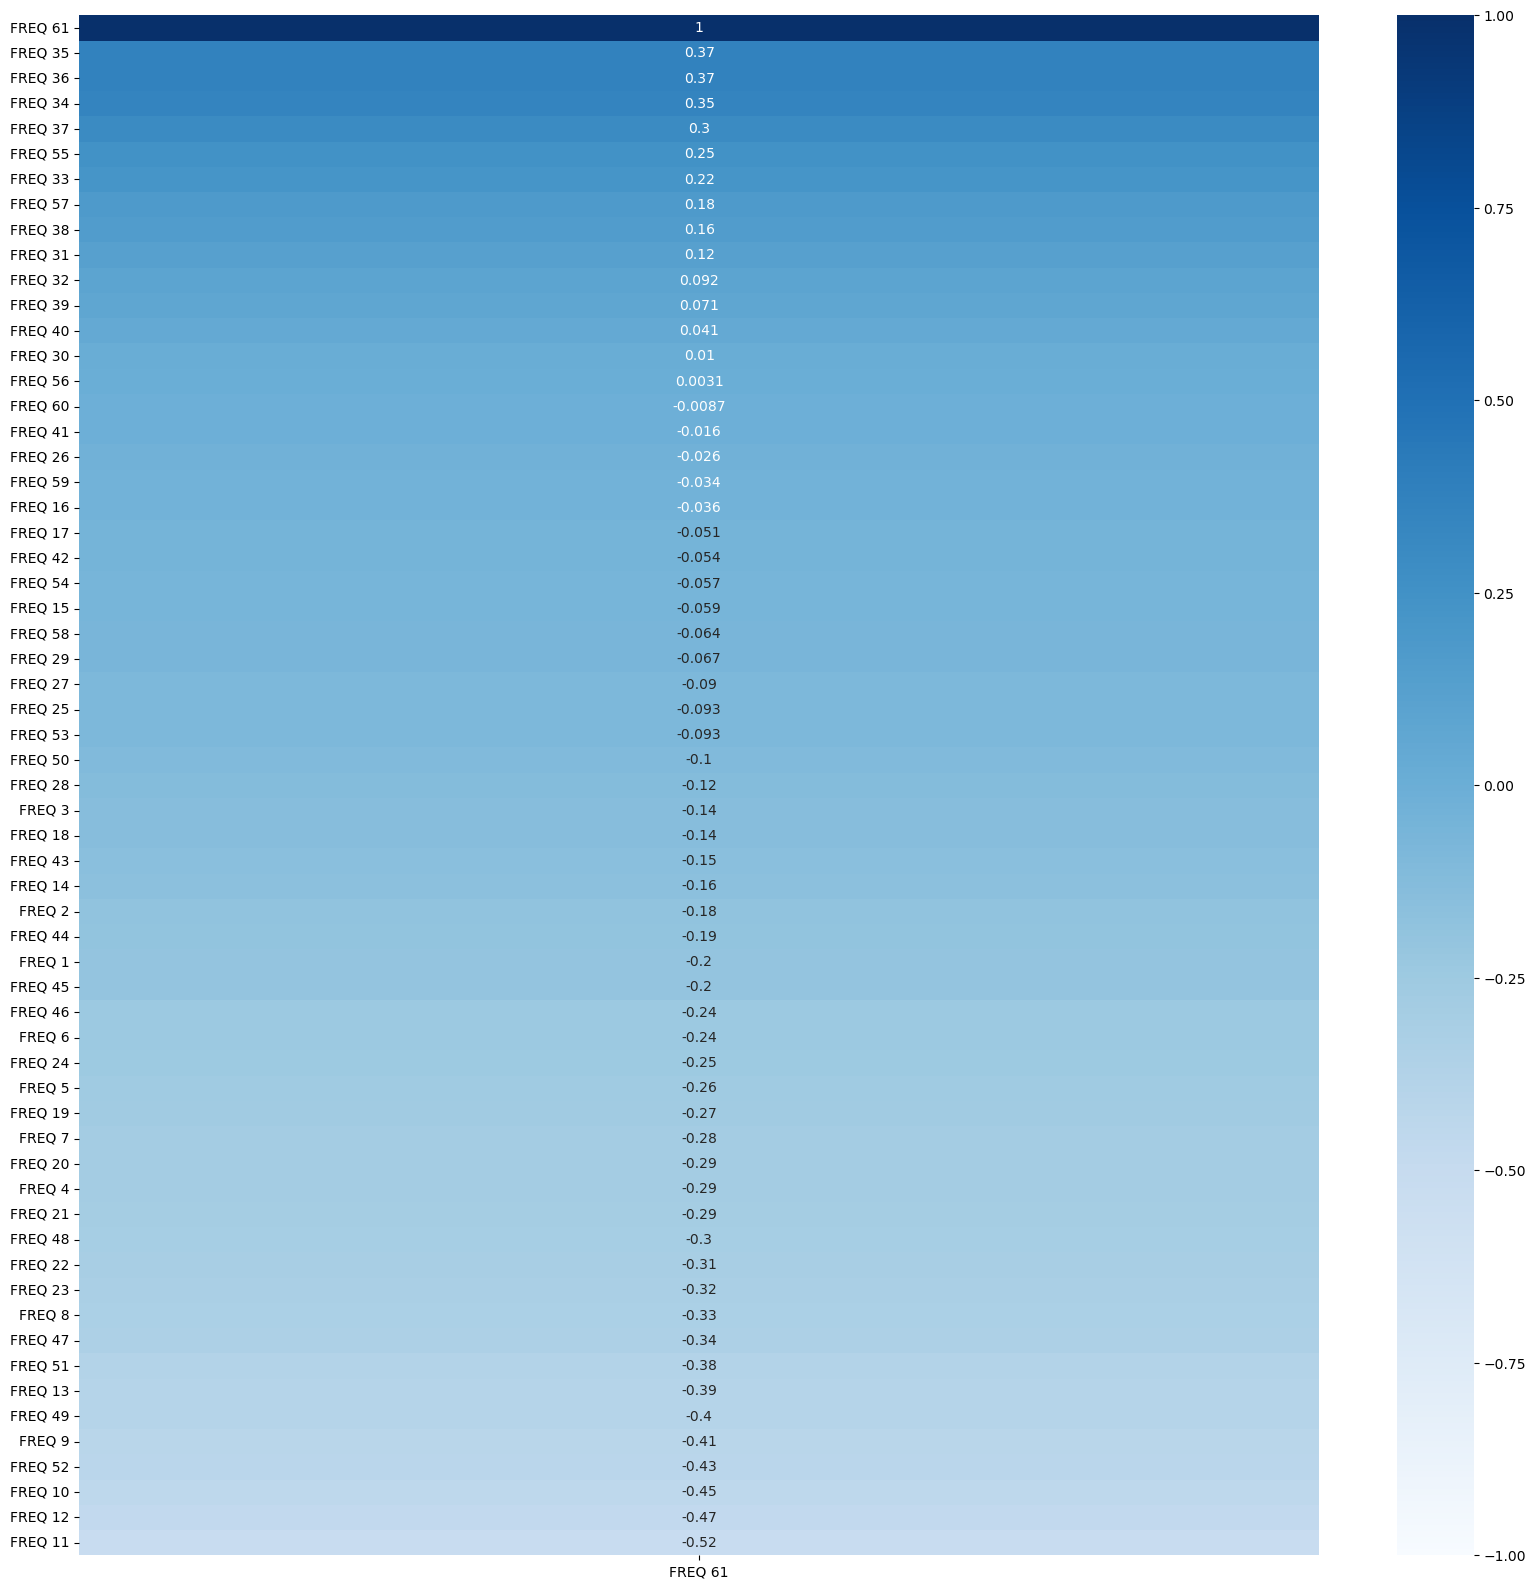

In [36]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr()[["FREQ 61"]].sort_values(by="FREQ 61", ascending=False), vmin=-1, vmax=1,annot=True, cmap="Blues");


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 207
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   FREQ 1   114 non-null    float64
 1   FREQ 2   114 non-null    float64
 2   FREQ 3   114 non-null    float64
 3   FREQ 4   114 non-null    float64
 4   FREQ 5   114 non-null    float64
 5   FREQ 6   114 non-null    float64
 6   FREQ 7   114 non-null    float64
 7   FREQ 8   114 non-null    float64
 8   FREQ 9   114 non-null    float64
 9   FREQ 10  114 non-null    float64
 10  FREQ 11  114 non-null    float64
 11  FREQ 12  114 non-null    float64
 12  FREQ 13  114 non-null    float64
 13  FREQ 14  114 non-null    float64
 14  FREQ 15  114 non-null    float64
 15  FREQ 16  114 non-null    float64
 16  FREQ 17  114 non-null    float64
 17  FREQ 18  114 non-null    float64
 18  FREQ 19  114 non-null    float64
 19  FREQ 20  114 non-null    float64
 20  FREQ 21  114 non-null    float64
 21  FREQ 22  114 non

### Lets take only the columns with good correlation with the target

In [85]:
x = df.iloc[:,:-1].values

In [86]:
x

array([[0.02  , 0.0371, 0.0428, ..., 0.0084, 0.009 , 0.0032],
       [0.0519, 0.0548, 0.0842, ..., 0.0047, 0.0048, 0.0053],
       [0.0164, 0.0173, 0.0347, ..., 0.0035, 0.0056, 0.004 ],
       ...,
       [0.0522, 0.0437, 0.018 , ..., 0.0138, 0.0077, 0.0031],
       [0.0303, 0.0353, 0.049 , ..., 0.0079, 0.0036, 0.0048],
       [0.026 , 0.0363, 0.0136, ..., 0.0036, 0.0061, 0.0115]])

In [87]:
y = df[['FREQ 61']].values

### Feature Scaling

In [88]:
rc = StandardScaler()

In [89]:
x = rc.fit_transform(x)

# Model Building

In [90]:
models = {
    "LinearRegression" : LinearRegression(),
    "Ridge" : Ridge(),
    "LinearSVR" : LinearSVR(),
    'Lasso' : Lasso(),
    'GradientBoostingRegressor' : GradientBoostingRegressor(),
    "DecisionTreeRegressor" : DecisionTreeRegressor(),
    "AdaBoostRegressor" : AdaBoostRegressor(),
    'RandomForestRegressor' : RandomForestRegressor()
}

In [92]:
for name, model in models.items():   
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  0.595788895094563
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  0.5092230017223198
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  0.5592711617918805
****************************************************************************************************
cross validation model : Lasso
AVERAGE RMSE:  0.5511143469827177
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  0.4209420641631148
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  0.49741983200679407
******************************************************

# Model fitting

In [93]:
rfr =GradientBoostingRegressor()

# splitting the data into training and testing set

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [95]:
rfr.fit(x_train, y_train)

GradientBoostingRegressor()

In [96]:
print("model trained with {}".format(rfr))
training_score = rfr.score(x_train, y_train)*100
testing_score = rfr.score(x_test, y_test)*100
score = r2_score(y_test, rfr.predict(x_test))*100
mae = mean_absolute_error(y_test, rfr.predict(x_test))
mse = mean_squared_error(y_test, rfr.predict(x_test))
rmse = np.sqrt(mse)
print("r2score: ",score)
print("training_score: ", training_score)
print("testing_score: ", testing_score)
print("mae: ", mae)
print("mse: ", mse)
print("rmse_test: ", rmse)

model trained with GradientBoostingRegressor()
r2score:  58.2993288640052
training_score:  99.9917539915659
testing_score:  58.2993288640052
mae:  0.21064423259319182
mse:  0.10405460472497756
rmse_test:  0.32257495985426016


In [97]:
y_pred = rfr .predict(x)

In [98]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL","PREDICTED"),dtype=float)
OUTPUT

ACTUAL  PREDICTED
0       1.0   0.996779
1       1.0   0.996998
2       1.0   0.946300
3       1.0   1.001110
4       1.0   0.995353
..      ...        ...
109     0.0  -0.002379
110     0.0  -0.000115
111     0.0  -0.001014
112     0.0   0.007915
113     0.0   0.029380

[114 rows x 2 columns]

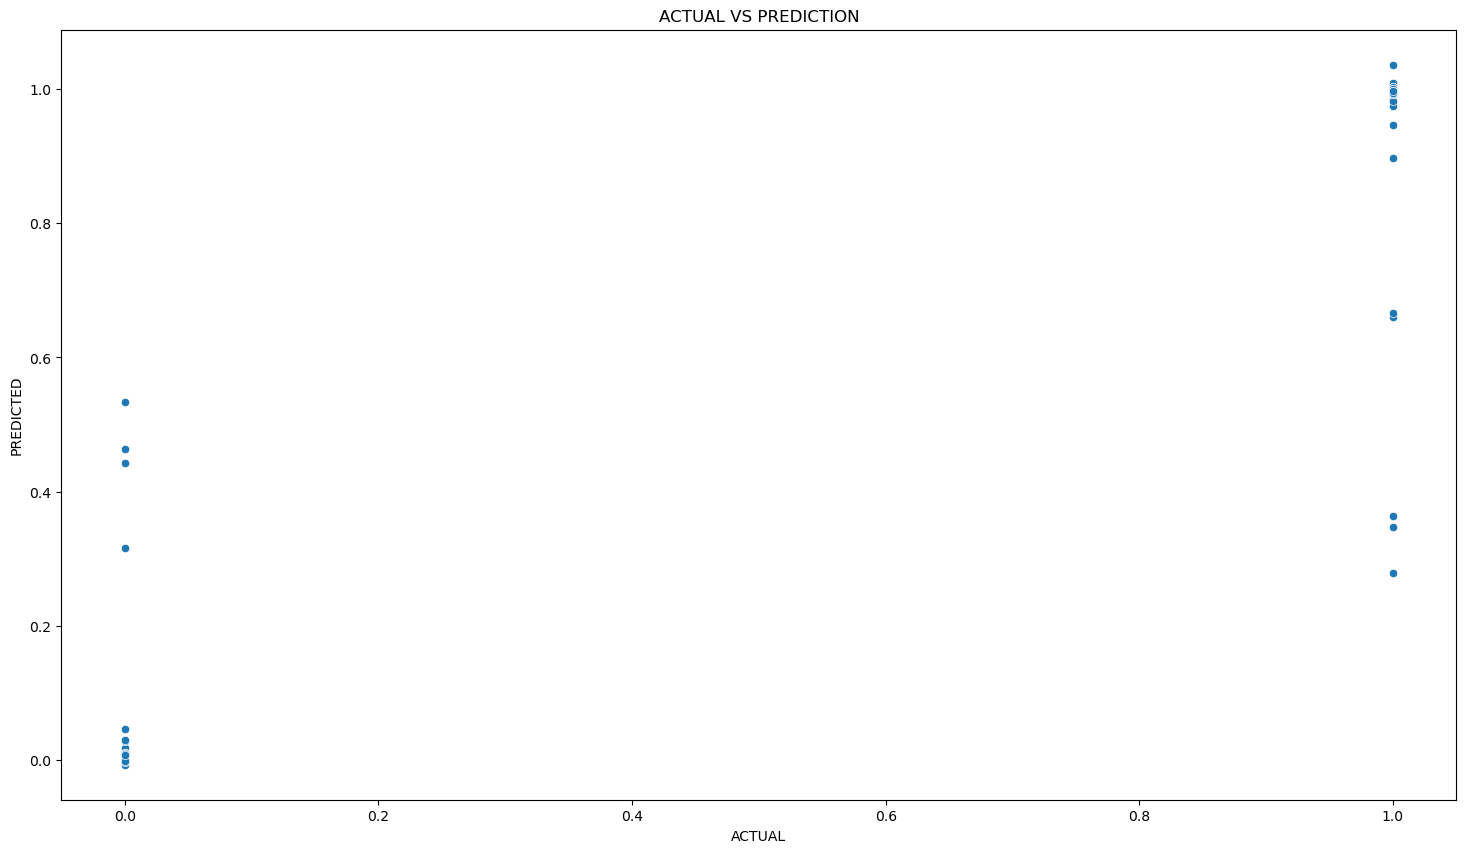

In [99]:
plt.figure(figsize=(18,10))
sns.scatterplot(x='ACTUAL', y='PREDICTED', data=OUTPUT)
plt.title("ACTUAL VS PREDICTION")
plt.show()

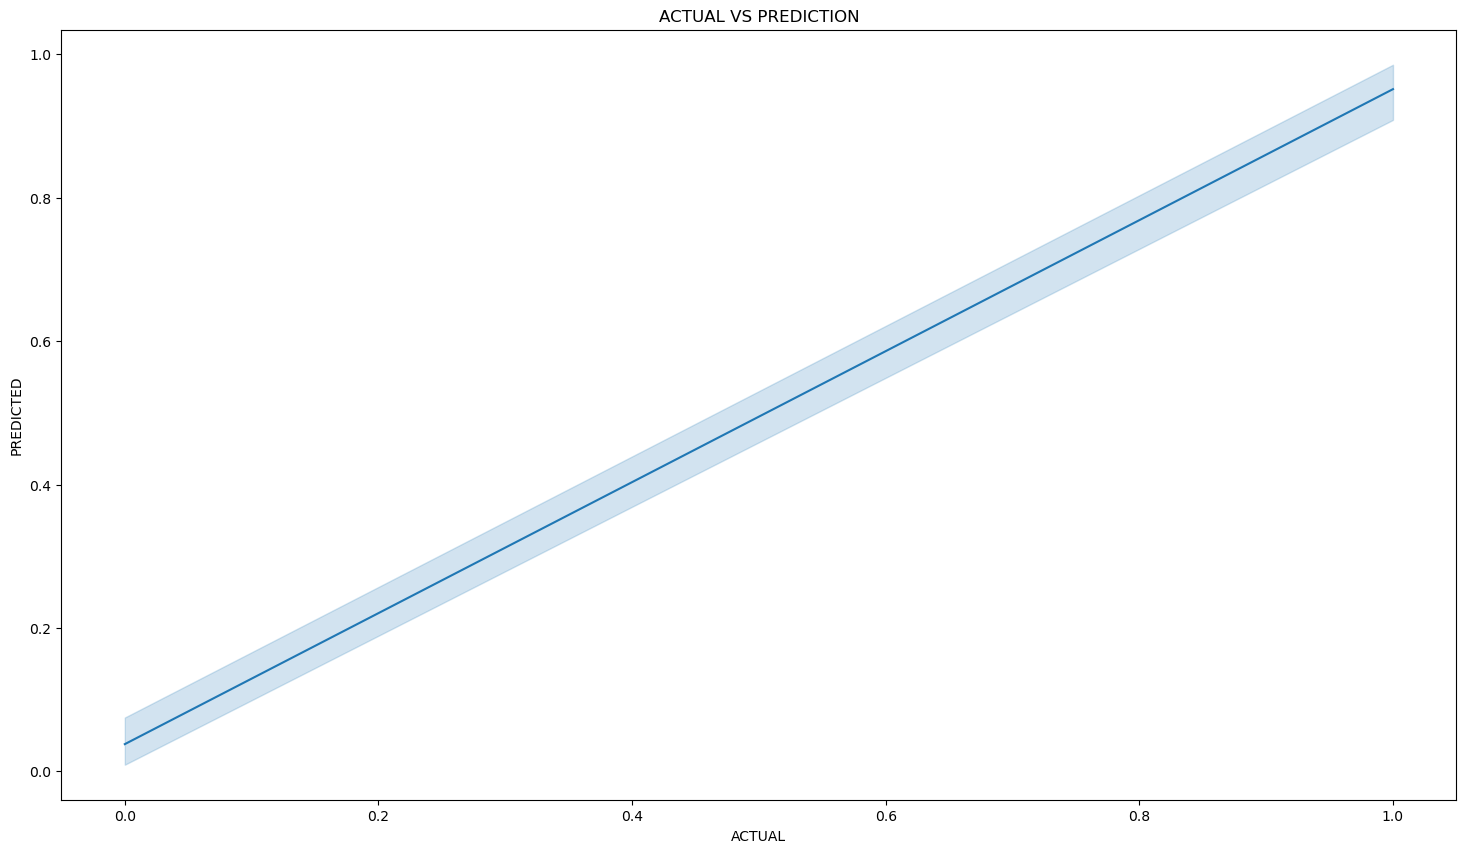

In [100]:
plt.figure(figsize=(18,10))
sns.lineplot(x='ACTUAL', y='PREDICTED', data=OUTPUT)
plt.title("ACTUAL VS PREDICTION")
plt.show()